# Imports

In [1]:
import numpy as np
import pandas as pd
import requests, json
import matplotlib.pyplot as plt
import chess
import seaborn as sns
import ndjson
import chess
import sys
import time
from IPython.display import clear_output
import random
import tensorflow as tf
####################################################################
# API DOCUMENTATION https://lichess.org/api#operation/apiGamesUser #
####################################################################

In [2]:
url = "https://lichess.org/api/games/user/pontiacboy"

r = requests.get(
    url,
    params={"moves":"true", "opening":"true","color":"true","rated":"true","perfType":"bullet,blitz,rapid"},
    headers={"Accept": "application/x-ndjson"}
)
items = r.json(cls=ndjson.Decoder)
items

[{'id': 'wUGdtDHc',
  'rated': True,
  'variant': 'standard',
  'speed': 'blitz',
  'perf': 'blitz',
  'createdAt': 1609436604002,
  'lastMoveAt': 1609436824668,
  'status': 'resign',
  'players': {'white': {'user': {'name': 'pontiacboy', 'id': 'pontiacboy'},
    'rating': 1336,
    'ratingDiff': -1},
   'black': {'user': {'name': 'PetrovPM', 'id': 'petrovpm'},
    'rating': 1779,
    'ratingDiff': 1}},
  'winner': 'black',
  'opening': {'eco': 'B10', 'name': 'Caro-Kann Defense', 'ply': 2},
  'moves': 'e4 c6 Nf3 d6 d4 Bg4 Be2 Bxf3 Bxf3 g6 O-O Bg7 Nc3 Qb6 Be3 Nd7 d5 c5 a4 Ne5 a5 Qc7 a6 b6 Nb5 Qd7 b3 Nxf3+ gxf3 Qxb5 Ra4 Nf6 Bg5 O-O Qd2 Rac8 Bh6 Qd7 Kg2 b5 Ra5 b4 Qe2 Bxh6 e5 Nxd5',
  'tournament': 'v0O6lNOH',
  'clock': {'initial': 300, 'increment': 0, 'totalTime': 300}},
 {'id': '5x9u5RkJ',
  'rated': True,
  'variant': 'standard',
  'speed': 'blitz',
  'perf': 'blitz',
  'createdAt': 1609436364253,
  'lastMoveAt': 1609436594531,
  'status': 'mate',
  'players': {'white': {'user': {'name

In [3]:
items[0]#['winner']

{'id': 'wUGdtDHc',
 'rated': True,
 'variant': 'standard',
 'speed': 'blitz',
 'perf': 'blitz',
 'createdAt': 1609436604002,
 'lastMoveAt': 1609436824668,
 'status': 'resign',
 'players': {'white': {'user': {'name': 'pontiacboy', 'id': 'pontiacboy'},
   'rating': 1336,
   'ratingDiff': -1},
  'black': {'user': {'name': 'PetrovPM', 'id': 'petrovpm'},
   'rating': 1779,
   'ratingDiff': 1}},
 'winner': 'black',
 'opening': {'eco': 'B10', 'name': 'Caro-Kann Defense', 'ply': 2},
 'moves': 'e4 c6 Nf3 d6 d4 Bg4 Be2 Bxf3 Bxf3 g6 O-O Bg7 Nc3 Qb6 Be3 Nd7 d5 c5 a4 Ne5 a5 Qc7 a6 b6 Nb5 Qd7 b3 Nxf3+ gxf3 Qxb5 Ra4 Nf6 Bg5 O-O Qd2 Rac8 Bh6 Qd7 Kg2 b5 Ra5 b4 Qe2 Bxh6 e5 Nxd5',
 'tournament': 'v0O6lNOH',
 'clock': {'initial': 300, 'increment': 0, 'totalTime': 300}}

In [4]:
len(items)

649

## Fix matches against AI

In [5]:
def get_values_from_list_dict(listtodecode):
    gameid = []
    moves = [] 
    gamelen = []
    color = []
    winner = []
    winorlose = []
    for item in listtodecode:
        try:
            if item['players']['white']['ailevel'] == True or item['players']['black']['ailevel'] == True:
                print('Ai match')
        except:
            
            gameid.append(item['id'])
            moves.append(item['moves'])
            try:
                winner.append(item['winner'])
                winnerofgame = item['winner']
            except:
                #print(item['status'])
                winner.append(item['status'])
                winnerofgame = item['status']
            gamelen.append(len(item['moves'].split()))
            try:
                if item['players']['white']['user']['name'] == 'pontiacboy':
                    color.append('white')
                    colorofgame = 'white'
                else:
                    color.append('black')
                    colorofgame = 'black'
            except:
                color.append('black')
            print(winnerofgame,colorofgame)
            if winnerofgame == 'draw' or winner == 'stalemate':
                winorlose.append('Draw')
            elif winnerofgame == colorofgame:
                winorlose.append('Won')
            else:
                winorlose.append('Lost')
        
        
    match = np.vstack((gameid, moves, gamelen,color,winner,winorlose)).T
    matchdf = pd.DataFrame(match,columns = ['ID','Moves','Amount of moves','Color','Winner','Player_result'])
    return matchdf
def orderarr(df,col):   
    arr = df[col].unique()
    arr= arr.tolist()
    arr.sort()
    return arr        


match = get_values_from_list_dict(items) 

black white
white black
white black
white white
white white
white black
white black
white white
black white
white black
white white
black white
black white
black white
white white
black black
white white
white black
white white
white black
white black
white white
white white
black white
white white
white black
black black
black white
black black
white black
black white
white white
black white
black black
white black
outoftime white
black black
white black
white white
white black
black black
black black
white white
white black
white white
white black
white white
white black
white black
black white
black black
black white
black black
black black
white white
black white
black black
outoftime white
white white
white black
white white
black white
white black
black black
black white
white black
white white
black black
black black
white white
white black
black black
white white
black white
black black
black white
white black
black black
draw white
black black
white white
white black
black whi

# EDA, on player.

In [6]:
match['Amount of moves']=pd.to_numeric(match['Amount of moves'])
match

ID                                              Moves  \
0    wUGdtDHc  e4 c6 Nf3 d6 d4 Bg4 Be2 Bxf3 Bxf3 g6 O-O Bg7 N...   
1    5x9u5RkJ  e4 c6 Nf3 d5 Nc3 Bg4 Be2 Nd7 h3 Bxf3 Bxf3 Ngf6...   
2    NkYhvdAh  e4 c6 Nf3 d5 exd5 cxd5 d4 Nf6 Nc3 Bg4 Be2 Nc6 ...   
3    8zQV53dK  e4 e5 Nf3 Nc6 Bb5 a6 Bxc6 dxc6 Nxe5 Qe7 d4 f6 ...   
4    BnyUUDmu  e4 d5 exd5 Qxd5 Nc3 Qe6+ Qe2 Qxe2+ Bxe2 Be6 Nf...   
..        ...                                                ...   
644  tUGP04f0  d4 Nf6 Nc3 g6 e3 Bg7 g3 d5 Bg2 e6 e4 dxe4 Nxe4...   
645  tu01llfW  e4 e5 Nf3 Nf6 Nc3 Nc6 d4 b6 dxe5 Nxe5 Nxe5 Bb7...   
646  Yc6U97gM  d4 d5 Nc3 Bf5 e3 e6 g4 Bg6 Nf3 Nc6 g5 Nf6 Bg2 ...   
647  ZfulT1Xp  d4 d5 c4 dxc4 Nc3 e6 e3 b6 Bxc4 c5 Nf3 cxd4 Nx...   
648  ARPJpv7S  d4 e6 Nc3 Nf6 e3 Be7 Nf3 O-O Bb5 a6 Bd2 axb5 b...   

     Amount of moves  Color Winner Player_result  
0                 46  white  black          Lost  
1                 51  black  white          Lost  
2                 65  black  white          Lost  
3                 71  white  white           Won  
4                 35  white  white           Won  
..               ...    ...    ...           ...  
644               67  white  white           Won  
645               29  black  white          Lost  
646               30  white  black          Lost  
647               31  black  white          Lost  
648               46  white  black          Lost  

[649 rows x 6 columns]

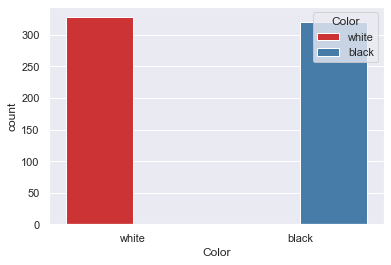

In [7]:
color = match.groupby('Winner')['ID'].nunique()
#sns.barplot(data = match['Winner'].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = 'Color', hue="Color",data = match,palette="Set1")

In [8]:
data = match.groupby('Player_result')['Amount of moves'].mean()
dftest = pd.DataFrame(data)
dftest

Amount of moves
Player_result                 
Draw                 99.800000
Lost                 52.343195
Won                  56.358804

In [9]:
data = match.groupby('Color')['Amount of moves'].mean()
dftest = pd.DataFrame(data)
dftest

Amount of moves
Color                 
black        56.348910
white        53.554878

In [10]:
match['Amount of moves'] = pd.to_numeric(match['Amount of moves'])

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Match result'),
 Text(0.5, 1.0, 'Match result by color')]

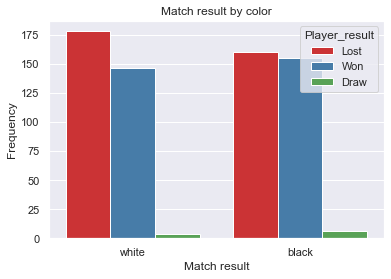

In [11]:
color = match.groupby('Winner')['ID'].nunique()
#sns.barplot(data = match['Winner'].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = 'Color', hue="Player_result",data = match,palette = "Set1")
ax.set(xlabel='Match result', ylabel='Frequency',title = "Match result by color")

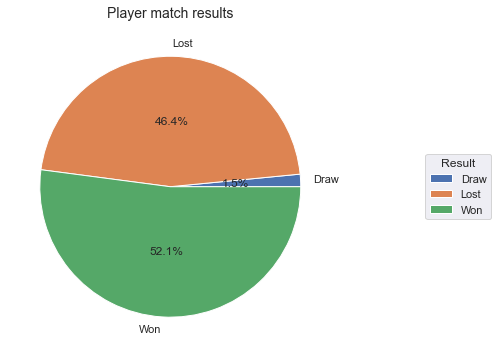

In [12]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=match['Player_result'].value_counts(ascending = True), autopct="%.1f%%", labels = orderarr(match,'Player_result'),pctdistance=0.5)
plt.legend( orderarr(match,'Player_result'),
          title="Result",
          loc="center right",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Player match results", fontsize=14)
plt.show()

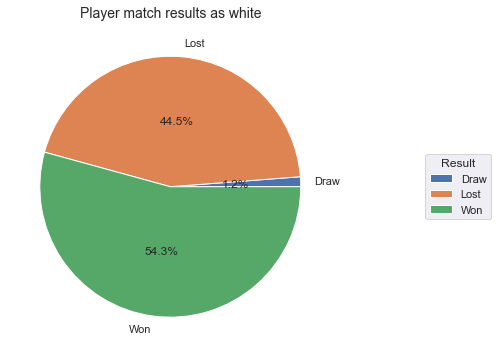

In [13]:
pie, ax = plt.subplots(figsize=[10,6])
whitedata = match[match.Color == 'white']
plt.pie(x=whitedata['Player_result'].value_counts(ascending = True), autopct="%.1f%%", labels = orderarr(whitedata,'Player_result'),pctdistance=0.5)
plt.legend( orderarr(match,'Player_result'),
          title="Result",
          loc="center right",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Player match results as white", fontsize=14)
plt.show()

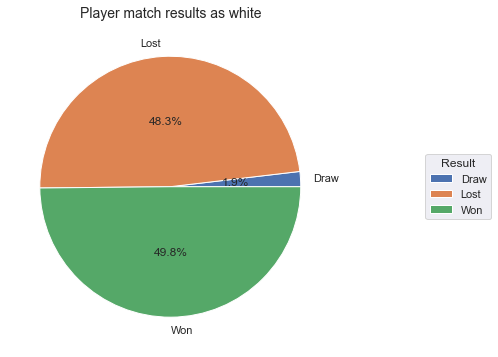

In [14]:
pie, ax = plt.subplots(figsize=[10,6])
blackdata = match[match.Color == 'black']
plt.pie(x=blackdata['Player_result'].value_counts(ascending = True), autopct="%.1f%%", labels = orderarr(blackdata,'Player_result'),pctdistance=0.5)
plt.legend( orderarr(match,'Player_result'),
          title="Result",
          loc="center right",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Player match results as white", fontsize=14)
plt.show()

# Setting up enviroment

In [15]:
board = chess.Board()

## Lets play with the enviroment
We will faminilrize ourselves with the library. The **Library** cant be used as an enviroment but we can use it as a guideline which allows us to decide wether or not the move the network would like to perform is legal or not


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


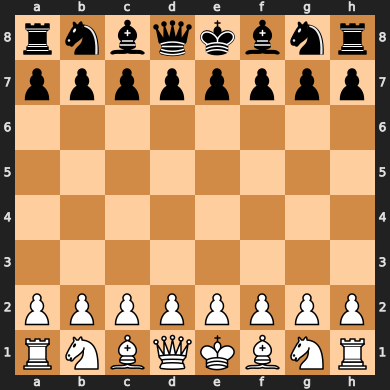

In [16]:
print(board)
board

In [17]:
# Lets get 1 match
testmatch = match['Moves'][0]
white_moves = []
black_moves = []
i = 0
for items in testmatch.split():
    if (i % 2) == 0:
        white_moves.append(items)
    else:
        black_moves.append(items)
    i = i + 1

In [18]:
board.legal_moves  

<LegalMoveGenerator at 0x254ec8e7888 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

In [19]:
white_moves[0]

'e4'

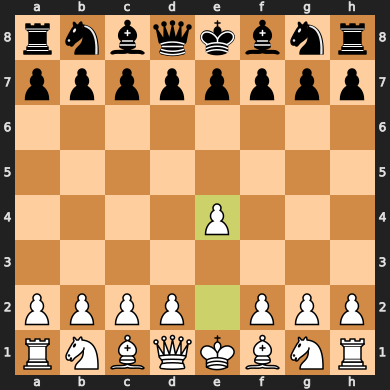

In [20]:
board.push_san(white_moves[0])
board

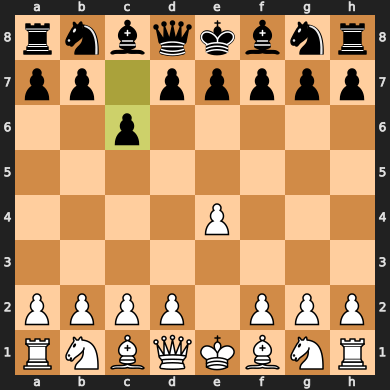

In [21]:
board.push_san(black_moves[0])
board

. . r . . r k .
p . . q p p . p
P . . p . . p b
R . p n P . . .
. p . . . . . .
. P . . . P . .
. . P . Q P K P
. . . . . R . .


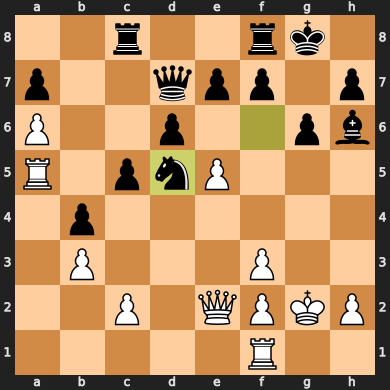

In [22]:
i = 0
board = chess.Board()
for items in testmatch.split():
    if (i % 2) == 0:
        board.push_san(items)
    else:
        board.push_san(items)
    print(board)
    time.sleep(.5)
    clear_output()
    i = i + 1
print(board)
board

In [23]:
##############################################################################################
# List of functions to be used for the network.                                              #
# board.legal_moves  Returns an array of all available legal moves.                          #
# board.is_stalemate() Detects when there is a stalemate                                     #
# board.is_insufficient_material() Detecs when there is insufficient material on the baord   #
# board.is_game_over() Detecs when game is over                                              #
# board.is_check() Detecs if check is present                                                #
##############################################################################################

Generate black and white pieces and give these pieces each a value

In [24]:
whiteP = ['P','P','P','P','P','P','P','P','R','R','B','B','N','N','Q','K']
blackP = ['p','p','p','p','p','p','p','p','r','r','b','b','n','n','q','k']

In [25]:
piecevalue = {
  "P": 1,
  "B": 3,
  "N": 3,
  "R": 5,
  "Q": 9,
  "K": 100,
  "p": -1,
  "b": -3,
  "n": -3,
  "r": -5,
  "q": -9,
  "k": -100,
}

In [26]:
for items in testmatch.split():
    if (i % 2) == 0:
        white_moves.append(items)
    else:
        black_moves.append(items)
    i = i + 1

In [27]:
import numpy as np

arr1 = np.array([1, 2, 3])

arr2 = np.array([4, 5, 6])

arr = np.vstack((arr1, arr2))

print(arr)

[[1 2 3]
 [4 5 6]]


In [28]:
# Get matches for both black and white, nan's will be dropped.
def get_games_for_color(df):
    blackmatches = df[['Moves']][df['Color'] == 'black']
    blackmatches[blackmatches['Moves'] != ""]
    blackgamearr = []
    for items in blackmatches['Moves']:
        i = 0
        blackgameBmoves = []
        blackgameWmoves = []
        for item in items.split():
            if (i % 2) == 0:
                blackgameWmoves.append(item)
                blackgameBmoves.append(".")
                i = i + 1
            else:
                blackgameBmoves.append(item)
                blackgameWmoves.append(".")
                i = i + 1
        matcharr =  np.vstack((blackgameWmoves, blackgameBmoves))    
        blackgamearr.append(matcharr)
    
    
    whitematches = df[['Moves']][df['Color'] == 'white']
    whitematches[whitematches['Moves'] != ""]
    whitegamearr = []
    for items in whitematches['Moves']:
        i = 0
        whitegameBmoves = []
        whitegameWmoves = []
        for item in items.split():
            if (i % 2) == 0:
                whitegameWmoves.append(item)
                whitegameBmoves.append(".")
                i = i + 1
            else:
                whitegameBmoves.append(item)
                whitegameWmoves.append(".")
                i = i + 1
        matcharr =  np.vstack((whitegameWmoves, whitegameBmoves))    
        whitegamearr.append(matcharr)
    
    return blackgamearr,whitegamearr

In [29]:
blackm,whitem = get_games_for_color(match)
print(len(whitem))
len(blackm)

328


321

# Lets analyse what moves the players plays most for both colors 
This helps when it come to understanding what moves the network should play first. We will look only at the first 3 moves, as these generally speaking cna define the opening best.

In [30]:
# Return of most played 3 moves per player, this gives an idea on how the player plays
def getmostplayed(matches,color):
    firstmovearrw = []
    secondmovearrw = []
    thirdmovearrw = []
    matchesplayed = []
    if color == 'w':
        for items in matches:
            try: 
                thirdmovearrw.append(items[0][4])
                firstmovearrw.append(items[0][0])
                secondmovearrw.append(items[0][2])
                matchesplayed.append(1)
            except:
                print('No value exists')
    else:
        for items in matches:
            try: 
                thirdmovearrw.append(items[1][5])
                firstmovearrw.append(items[1][1])
                secondmovearrw.append(items[1][3])
                matchesplayed.append(1)
            except:
                print('No value exists')

    whitemostmovesdf = pd.DataFrame(firstmovearrw,columns  = ['First_Move'])
    whitemostmovesdf['Second_Move'] = secondmovearrw
    whitemostmovesdf['Third_Move'] = thirdmovearrw
    whitemostmovesdf['Matches_played'] = matchesplayed

    mostwhiteopenings = whitemostmovesdf.groupby(['First_Move','Second_Move','Third_Move']).count()
    mostwhiteopenings = mostwhiteopenings.reset_index()
    mostwhiteopenings = mostwhiteopenings.sort_values(['Matches_played'], ascending = False)
    return mostwhiteopenings

In [31]:
getmostplayed(whitem,'w')

No value exists
No value exists
No value exists
No value exists


First_Move Second_Move Third_Move  Matches_played
12         e4         Bc4        Nf3             114
31         e4         Nf3        Nc3              31
26         e4         Nf3        Bb5              26
16         e4         Bc4       exd5              16
37         e4         Nf3         d3              15
19         e4         Nc3        Bb5              14
43         e4        exd5        Nc3              13
13         e4         Bc4        Qf3              12
20         e4         Nc3       Bb5+               8
35         e4         Nf3       Nxe5               7
50         e4          g3         f4               6
39         e4         Nf3         e5               5
40         e4         Nf3       exd5               5
3          d4         Nc3         e3               5
11         e4         Bc4        Nc3               3
28         e4         Nf3        Bc4               2
24         e4         Nc3        Nf3               2
21         e4         Nc3        Bc4               2
44         e4        exd5        Nf3               2
45         e4        exd5        Qf3               2
17         e4         Bc4       exf5               2
33         e4         Nf3        Ng1               2
4          d4         Nc3         g3               2
48         e4        exf5        Bc4               1
42         e4          e5        Bc4               1
38         e4         Nf3         d4               1
46         e4        exd5         a3               1
49         e4          g3         f3               1
36         e4         Nf3        Qe2               1
41         e4         Nf3       exf5               1
47         e4        exd5       dxc6               1
34         e4         Nf3        Ng5               1
0         Nc6         Be7         h6               1
32         e4         Nf3        Nd4               1
30         e4         Nf3        Ke2               1
2          d4         Bf4        Nc3               1
5          d4          c3         g3               1
6          d4          e3        Nc3               1
7          e3         Bc4        Nf3               1
8          e3         Nf3        Nc3               1
9          e3          e4        Bc4               1
10         e4         Bb5        Ba4               1
14         e4         Bc4        Qh5               1
15         e4         Bc4         a3               1
18         e4         Bc4         f4               1
22         e4         Nc3        Nb5               1
23         e4         Nc3       Nce2               1
1          d3          e4        Nc3               1
27         e4         Nf3       Bb5+               1
29         e4         Nf3        Bd3               1
25         e4         Nc3       exd5               1

In [32]:
getmostplayed(blackm,'b')

No value exists
No value exists
No value exists
No value exists
No value exists
No value exists


First_Move Second_Move Third_Move  Matches_played
80         g6         Bg7         d6              81
75         g6         Bg7        Nf6              63
26         e5         Nc6        Bb4              14
23         e5         Bc5        Nf6               7
78         g6         Bg7         c6               7
..        ...         ...        ...             ...
47         e5         Qf6        Bc5               1
48         e5         Qf6         d5               1
51         e5          f5       fxe4               1
52         e5          f6        Bc5               1
90         g6          f5       fxe4               1

[91 rows x 4 columns]

In [33]:
# Returns a board looking at the score of pieces present (doesnt look into the future)
def getscore(board):
    # Necesary values to determine the value of the board
    boardvalue = 0
    boardenviroment = boardenv(board)
    for items in boardenviroment:
        for item in items:
            #### FIND DICT VALUE
            if item == ".":
                empty = ''
            else:
                boardvalue = boardvalue + piecevalue[item]
    return boardvalue
    
# Returns the board in the form of an 8x8 dimentional array
def boardenv(board):
    boardnenv = str(board).split('\n')
    i = 0
    for items in boardnenv:
        print(items)
        boardnenv[i] = items.split()
        i = i + 1
    return boardnenv

# Returns an array of possible moves from the current position by color
def available_moves(board):
    availabe_moves = str(board.legal_moves)
    availabe_moves = availabe_moves.split('(')
    availabe_moves = availabe_moves[1]
    availabe_moves = availabe_moves.split(')')
    availabe_moves = availabe_moves[0]
    availabe_moves = availabe_moves.split(',')
    availabe_moves = [x.strip(' ') for x in availabe_moves]
    return availabe_moves

# Make a board move
def move(board):
    moves = movetotake(board)
    board.push_san(moves)
    print('Move taken ' + moves)
    print(getscore(board))
    return board

# Decision on what move to take
def movetotake(board):
    #Random move to take
    arr = available_moves(board)
    movetotake = random.choice(arr)
    return movetotake

In [34]:
getscore(board)

. . r . . r k .
p . . q p p . p
P . . p . . p b
R . p n P . . .
. p . . . . . .
. P . . . P . .
. . P . Q P K P
. . . . . R . .


-7

In [35]:
available_moves(board)

['Rxc5',
 'Rb5',
 'Ra4',
 'Ra3',
 'Ra2',
 'Raa1',
 'Kg3',
 'Kh1',
 'Kg1',
 'Qb5',
 'Qe4',
 'Qc4',
 'Qe3',
 'Qd3',
 'Qd2',
 'Qe1',
 'Qd1',
 'Rh1',
 'Rg1',
 'Re1',
 'Rd1',
 'Rc1',
 'Rb1',
 'Rfa1',
 'exd6',
 'e6',
 'f4',
 'h3',
 'c3',
 'h4',
 'c4']

Move taken Re1
. . r . . r k .
p . . q p p . p
P . . p . . p b
R . p n P . . .
. p . . . . . .
. P . . . P . .
. . P . Q P K P
. . . . R . . .
-7


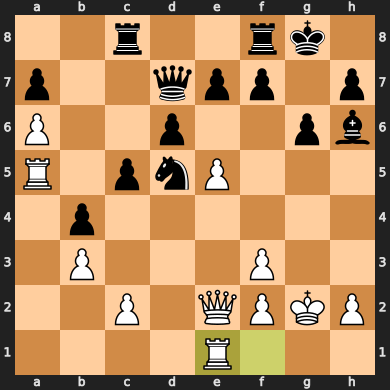

In [36]:
move(board)

## Creating a network with tensorflow
Creating a ntetwork with tensorflow is a technique that will be exlpored. As we want to create a model that generates moves depending on the board state. As opposed to reinforcement learning the model will not learn to play by brute force but will look at the positions given and make a best course of action depending on the board state.

### Network input:
An array of the board and the move taken depedning on the board state.

### Steps to take:
As opposed to the RL network we will need ot have a network that has an array of each move with the boardstate. In essence you are training the network per move taken loooking at the state. The difference with RL is that with RL you are training it while playing here the network only looks at the move taken.
1. We need to transform the data into array's of the boards state with the move taken
2. Train the network

In [37]:
whitem[0][1]

array(['.', 'c6', '.', 'd6', '.', 'Bg4', '.', 'Bxf3', '.', 'g6', '.',
       'Bg7', '.', 'Qb6', '.', 'Nd7', '.', 'c5', '.', 'Ne5', '.', 'Qc7',
       '.', 'b6', '.', 'Qd7', '.', 'Nxf3+', '.', 'Qxb5', '.', 'Nf6', '.',
       'O-O', '.', 'Rac8', '.', 'Qd7', '.', 'b5', '.', 'b4', '.', 'Bxh6',
       '.', 'Nxd5'], dtype='<U5')

In [38]:
test_board = chess.Board()

In [39]:
boardenv(test_board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


[['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r'],
 ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
 ['R', 'N', 'B', 'Q', 'K', 'B', 'N', 'R']]

In [40]:
test_board.push_san(whitem[0][0][0])

Move.from_uci('e2e4')

In [41]:
boardenv(test_board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


[['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r'],
 ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', 'P', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['P', 'P', 'P', 'P', '.', 'P', 'P', 'P'],
 ['R', 'N', 'B', 'Q', 'K', 'B', 'N', 'R']]

In [42]:
def generatedata(blackmatches,whitematches):
    whitearr = []
    #games as white
    for items in whitematches:
        print('newgame')
        i = 0
        board = chess.Board()
        whitearr.append(boardenv(board))
        for item in items[0]:
            try:
                if item != '.':
                    #print(item)
                    board.push_san(item)
                    a = boardenv(board)
                    a.append(item)                               
                    whitearr.append(a)
                    
                else:
                    #print(i)
                    #print(items[1][i])     
                    board.push_san(items[1][i])    
            except:
                print("Error")
            i = 1 + i
    return whitearr

In [43]:
def generatedata(blackmatches,whitematches):
    whitearr = []
    #games as white
    for items in whitematches:
        print('newgame')
        i = 0
        board = chess.Board()
        a = boardenv(board)
        for item in items[0]:
            try:
                if item != '.':
                    #print(item)
                    board.push_san(item)
                    a.append(item)                               
                    whitearr.append(a)
                    
                else:
                    #print(i)
                    #print(items[1][i])     
                    board.push_san(items[1][i])    
            except:
                print("Error")
            a = boardenv(board)
            i = 1 + i
    return whitearr

In [44]:
whitearray = generatedata(blackm,whitem)

newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p . p p p p p
. . p . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p . p p p p p
. . p . . . . .
. . . . . . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b n r
p p . . p p p p
. . p p . . . .
. . . . . . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b n r
p p . . p p p p
. . p p . . . .
. . . . . . . .
. . . P P . . .
. . . . . N . .
P P P . . P P P
R N B Q K B . R
r n . q k b n r
p p . . p p p p
. . p p . . . .
. . . . . . . .
. . . P P . b .
. . . . . N . .
P P P . . P P P
R N B Q K B . R
r n . q k b n r
p p . . p p p p
. . p p . . . .
. . . . . . . .
. . . P P . b .
. . . . . N . .


. . k . . b . .
. p p . . . . .
p . p . . . n .
. . . . . . . .
. . . . P . . .
. . N . . K . .
P P P . . . . .
. . . . . . . .
. . k . . b . .
. p p . . . . .
p . p . . . n .
. . . . . . . .
. . . . P . K .
. . N . . . . .
P P P . . . . .
. . . . . . . .
. . k . . b . .
. p p . . . . .
p . p . . . . .
. . . . n . . .
. . . . P . K .
. . N . . . . .
P P P . . . . .
. . . . . . . .
. . k . . b . .
. p p . . . . .
p . p . . . . .
. . . . n K . .
. . . . P . . .
. . N . . . . .
P P P . . . . .
. . . . . . . .
. . k . . . . .
. p p . . . . .
p . p b . . . .
. . . . n K . .
. . . . P . . .
. . N . . . . .
P P P . . . . .
. . . . . . . .
. . k . . . . .
. p p . . . . .
p . p b K . . .
. . . . n . . .
. . . . P . . .
. . N . . . . .
P P P . . . . .
. . . . . . . .
. . k . . . . .
. . p . . . . .
p . p b K . . .
. p . . n . . .
. . . . P . . .
. . N . . . . .
P P P . . . . .
. . . . . . . .
. . k . . . . .
. . p . . . . .
p . p b K . . .
. p . . n . . .
. . . . P . . .
P . N . . . . .
. P P . 

. . . . P Q . .
P P P P . P P P
R . B . K B . R
r . . q k . n r
p p p . . p p p
. . n p b . . .
. . b . . . N .
. . . . N . . .
. . . . P Q . .
P P P P . P P P
R . B . K B . R
r . . q k . n r
p p p . . p p p
. . n p N . . .
. . b . . . . .
. . . . N . . .
. . . . P Q . .
P P P P . P P P
R . B . K B . R
r . . q k . n r
p p p . . . p p
. . n p p . . .
. . b . . . . .
. . . . N . . .
. . . . P Q . .
P P P P . P P P
R . B . K B . R
r . . q k . n r
p p p . . . p p
. . n p p . . .
. . b . . . N .
. . . . . . . .
. . . . P Q . .
P P P P . P P P
R . B . K B . R
r . . q k . . r
p p p . . . p p
. . n p p n . .
. . b . . . N .
. . . . . . . .
. . . . P Q . .
P P P P . P P P
R . B . K B . R
r . . q k . . r
p p p . . . p p
. . n p p n . .
. . b . . . N .
. . . P . . . .
. . . . P Q . .
P P P . . P P P
R . B . K B . R
r . . q k . . r
p p p . . . p p
. . n p p n . .
. . . . . . N .
. b . P . . . .
. . . . P Q . .
P P P . . P P P
R . B . K B . R
r . . q k . . r
p p p . . . p p
. . n p p n . .
. . . . 

. . . . P P b .
. . N . K . . .
P P P . . P . P
R . . . . . . R
r . . . . . k .
. p p r . p p p
p . p . . . . .
. . . . P . . .
. . . . P P b .
. . N . K . . .
P P P . . P . P
R . . . . . . R
r . . . . . k .
. p p r . p p p
p . p . . . . .
. . . . P . . .
. . . . P P b .
. . N . K P . .
P P P . . . . P
R . . . . . . R
r . . . . . k .
. p p r . p p p
p . p . . . . .
. . . . P . . .
. . . . P P . .
. . N . K P . b
P P P . . . . P
R . . . . . . R
r . . . . . k .
. p p r . p p p
p . p . . . . .
. . . . P . . .
. . . . P P . .
. . N . K P . b
P P P . . . . P
R . . . . . R .
. . . r . . k .
. p p r . p p p
p . p . . . . .
. . . . P . . .
. . . . P P . .
. . N . K P . b
P P P . . . . P
R . . . . . R .
. . . r . . k .
. p p r . p p p
p . p . . . . .
. . . . P . . .
. . . . P P . .
. . . . K P . b
P P P . N . . P
R . . . . . R .
. . . r . . k .
. p p . . p p p
p . p . . . . .
. . . . P . . .
. . . . P P . .
. . . . K P . b
P P P r N . . P
R . . . . . R .
. . . r . . k .
. p p . . p p p
p . p . 

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . q . . . . .
. . . . . . . .
P K . . . . . .
. P . . . . k .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . q . . . . .
P . . . . . . .
. K . . . . . .
. P . . . . k .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . . . .
P . . . . . . .
. K . . . . . .
. P . . . . k .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . . . .
P . . . . . . .
K . . . . . . .
. P . . . . k .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . . . .
P . . . . . . .
K . . . . k . .
. P . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . . . .
P . . . . . . .
K P . . . k . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . . . .
P . . . k . . .
K P . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . . . .
P P . . k . . .
K . . . . . . .
. . . . 

. . . . . . . .
. . q . . . k .
K . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . . k .
K . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . . k .
. . . . . . . .
K . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . k . .
. . . . . . . .
K . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . k . .
K . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . k . . .
K . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . k . . .
. . . . . . . .
K . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. q . . . . . .
. . . . . . . .
. . . k . . . .
K . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . 

. . . P . . . .
. . . . . . . .
q . . . N P . .
P . P . Q . . P
. K . R . . . R
. . k r r . . .
. p p b . p . .
p . . . . . . p
. . . P . . . .
. . Q . . . . .
q . . . N P . .
P . P . . . . P
. K . R . . . R
. . k r r . . .
. p p b . p . .
p . . . . . . p
. . . P . . . .
. . Q . . . . .
. . . . q P . .
P . P . . . . P
. K . R . . . R
. . k r r . . .
. p p b . p . .
p . . P . . . p
. . . . . . . .
. . Q . . . . .
. . . . q P . .
P . P . . . . P
. K . R . . . R
. . k r r . . .
. p p b . p . .
p q . P . . . p
. . . . . . . .
. . Q . . . . .
. . . . . P . .
P . P . . . . P
. K . R . . . R
. . k r r . . .
. p p b . p . .
p q . P . . . p
. . . . . . . .
. . Q . . . . .
. . . . . P . .
P . P . . . . P
K . . R . . . R
. . k r r . . .
. p . b . p . .
p q p P . . . p
. . . . . . . .
. . Q . . . . .
. . . . . P . .
P . P . . . . P
K . . R . . . R
. . k r r . . .
. p . b . p . .
p q p P . . . p
. . . . . . . .
. . Q . . . . .
. . . . . P . .
P . P . . . . P
K . . R R . . .
. . k r . . . .
. p . b 

. p p . q p p p
p . p . . n . .
. . . . N . . .
. . . P P . . .
. . N . . . . .
P P P . . P P P
R . B Q K . . R
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . P . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b . k b n r
p p p . p p p p
. . . . . . . .
. . . q . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b . k b n r
p p p . p p p p
. . . . . . . .
. . . q . . . .
. . . . . . . .
. . N . . . . .
P P P P . P P P
R . B Q K B N R
r n b . k b n r
p p p q p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . N . . . . .
P P P P . P P P


. . n . p p . .
. . . . . . . p
P Q . . B . . P
. P P . . R P .
. . . . . . K .
q . . . . . . k
p . . R b . p .
. . . . . . r .
. . B . p p . .
. . . . . . . p
P Q . . . . . P
. P P . . R P .
. . . . . . K .
q . . . . . . k
p . . R . . p .
. . . . . . r .
. . b . p p . .
. . . . . . . p
P Q . . . . . P
. P P . . R P .
. . . . . . K .
q . . . . . . k
p . . . . . p .
. . . . . . r .
. . b . p p . .
. . . . . . . p
P Q . . . . . P
. P P R . R P .
. . . . . . K .
. . . . . . . k
p . . . . . p .
. . . . . . r .
. . b . p p . .
. . . . . . . p
P Q . . . . . P
. P P R . R q .
. . . . . . K .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r


r . . . k . . .
p . p . B p . p
. . p p . . . .
. . . . . b . .
. . . . . . . .
. . . . . . . .
P . . N . P P P
. . . . R . K .
. r . . k . . .
p . p . B p . p
. . p p . . . .
. . . . . b . .
. . . . . . . .
. . . . . . . .
P . . N . P P P
. . . . R . K .
. r . . k . . .
p . p . . p . p
. . p B . . . .
. . . . . b . .
. . . . . . . .
. . . . . . . .
P . . N . P P P
. . . . R . K .
. r . . . . . .
p . p k . p . p
. . p B . . . .
. . . . . b . .
. . . . . . . .
. . . . . . . .
P . . N . P P P
. . . . R . K .
. r . . . . . .
p . p k . p . p
. . p . . . . .
. . . . B b . .
. . . . . . . .
. . . . . . . .
P . . N . P P P
. . . . R . K .
. r . . . . . .
p . p k . p . p
. . . . . . . .
. . p . B b . .
. . . . . . . .
. . . . . . . .
P . . N . P P P
. . . . R . K .
. r . . . . . .
p . p k . p . p
. . . . . . . .
. . p . B b . .
. . N . . . . .
. . . . . . . .
P . . . . P P P
. . . . R . K .
. r . . . . . .
p . p k . p . p
. . . . . . . .
. . p . B . . .
. . N . b . . .
. . . . . . . .
P . . . 

. P . . . P P P
. . . . R . K .
. r . . . r . k
. . . p R B b p
p . b . . . p .
. . . . . p N .
p . . . . . . .
. . . . . . . .
. P . . . P P P
. . . . R . K .
. . . . . r . k
. . . p R B b p
p . b . . . p .
. . . . . p N .
p . . . . . . .
. . . . . . . .
. r . . . P P P
. . . . R . K .
. . . . . r . k
. . . p R B b p
p . b . . . p .
. . . . . p N .
p . . . . . . .
. . . . . . . P
. r . . . P P .
. . . . R . K .
. . . . . r . k
. . . p R B b p
p . b . . . p .
. . . . . p N .
p . . . . . . .
. . . . . . . P
r . . . . P P .
. . . . R . K .
. . . . . r . k
. . . p R . b p
p . b . . . p .
. . . . . p N .
p . . . . . . .
. . . . . . . P
B . . . . P P .
. . . . R . K .
. . . . . r . k
. . . p R . . p
p . b . . b p .
. . . . . p N .
p . . . . . . .
. . . . . . . P
B . . . . P P .
. . . . R . K .
. . . . . r . k
. . . p R N . p
p . b . . b p .
. . . . . p . .
p . . . . . . .
. . . . . . . P
B . . . . P P .
. . . . R . K .
. . . . . r k .
. . . p R N . p
p . b . . b p .
. . . . . p . .
p . . . 

. . . . . . P .
. . . . . . . .
. . . . . . k .
. p . r . n . p
. . . p . . p .
. P . P . p . .
P B P K . P . .
. . . . . . . P
. . . . . . P .
. . . . . . . .
. . . . . k . .
. p . r . n . p
. . . p . . p .
. P . P . p . .
P B P K . P . .
. . . . . . . P
. . . . . . P .
. . . . . . . .
. . . . . k . .
. p . r . n . p
. . . p . . p .
. P P P . p . .
P B . K . P . .
. . . . . . . P
. . . . . . P .
. . . . . . . .
. . . . . k . .
. p . r . n . p
. . . . . . p .
. P p P . p . .
P B . K . P . .
. . . . . . . P
. . . . . . P .
. . . . . . . .
. . . . . k . .
. p . r . n . p
. . . . . . p .
. P B P . p . .
P . . K . P . .
. . . . . . . P
. . . . . . P .
. . . . . . . .
. . . . k . . .
. p . r . n . p
. . . . . . p .
. P B P . p . .
P . . K . P . .
. . . . . . . P
. . . . . . P .
. . . . . . . .
. . . . k . . .
. p . r . n . p
. . . . . . p .
P P B P . p . .
. . . K . P . .
. . . . . . . P
. . . . . . P .
. . . . . . . .
. . . . k . . .
. p . r . . . p
. . . n . . p .
P P B P . p . .
. . . K 

. . . . . . . .
. . B P . . . .
. . . . . . . .
P P . . . P . P
. . K . . . . R
. . . . . . . r
. . r k . . b p
p . . . R n p .
. . . . . . . .
. . B P . . . .
. P . . . . . .
P . . . . P . P
. . K . . . . R
. . r . . . . .
. . r k . . b p
p . . . R n p .
. . . . . . . .
. . B P . . . .
. P . . . . . .
P . . . . P . P
. . K . . . . R
. . r . . . . .
. . r k . . b p
p . . . R n p .
. . . . . . . .
. . B P . . . .
. P . . . . . .
P . . . . P . P
. . K . R . . .
. . r . . . . .
. . r k . . b p
p . . . R . p .
. . . n . . . .
. . B P . . . .
. P . . . . . .
P . . . . P . P
. . K . R . . .
. . r . . . . .
. . r k . . b p
p . . . R . p .
. . . n . . . .
. . B P . . . .
. P . . . . . .
P K . . . P . P
. . . . R . . .
. . r . . . . .
. . r k . . b p
p . . . R . p .
. . . . . . . .
. . B P . n . .
. P . . . . . .
P K . . . P . P
. . . . R . . .
. . r . . . . .
. . r k R . b p
p . . . . . p .
. . . . . . . .
. . B P . n . .
. P . . . . . .
P K . . . P . P
. . . . R . . .
. . r . . . . .
. . r . 

. . . . P . . .
. . N . . B . .
P P P B . P P P
R . . K . . . R
. . k r . b n r
p p . . p p p p
. . p . . . . .
. . . . n . . .
. . . . P . . .
. . N . . B . .
P P P B . P P P
R . . K . . . R
. . k r . b n r
p p . . p p p p
. . p . . . . .
. . . . n . . .
. . . . P . . .
. . N . . B . .
P P P B K P P P
R . . . . . . R
. . k r . b n r
p p . . p p p p
. . p . . . . .
. . . . . . . .
. . . . P . . .
. . N . . n . .
P P P B K P P P
R . . . . . . R
. . k r . b n r
p p . . p p p p
. . p . . . . .
. . . . . . . .
. . . . P . . .
. . N . . P . .
P P P B K P . P
R . . . . . . R
. . k r . b n r
p p . . . p p p
. . p . . . . .
. . . . p . . .
. . . . P . . .
. . N . . P . .
P P P B K P . P
R . . . . . . R
. . k r . b n r
p p . . . p p p
. . p . . . . .
. . . . p . . .
. . . . P . . .
. . N . . P . .
P P P B K P . P
. . . R . . . R
. . k r . b n r
p p . . . . p p
. . p . . . . .
. . . . p p . .
. . . . P . . .
. . N . . P . .
P P P B K P . P
. . . R . . . R
. . k r . b n r
p p . . . . p p
. . p . 

. P . . . . p .
. . . . . . P .
. . . . . P K P
. . . . . . . .
. . . . . . . .
. b . . . . . .
p . p . . p . .
P p P p k . . p
. P . . . . p .
. . . . . P P .
. . . . . . K P
. . . . . . . .
. . . . . . . .
. b . . . . . .
p . p . . p . .
P p P p . . . p
. P . k . . p .
. . . . . P P .
. . . . . . K P
. . . . . . . .
. . . . . . . .
. b . . . . . .
p . p . . p . .
P p P p . . . p
. P . k . . P .
. . . . . . P .
. . . . . . K P
. . . . . . . .
. . . . . . . .
. b . . . . . .
p . p . . p . .
P p P p . . . p
. P k . . . P .
. . . . . . P .
. . . . . . K P
. . . . . . . .
. . . . . . . .
. b . . . . . .
p . p . . p . .
P p P p . . . P
. P k . . . . .
. . . . . . P .
. . . . . . K P
. . . . . . . .
. . . . . . . .
. b . . . . . .
p . p . . p . .
P p P . . . . P
. P k p . . . .
. . . . . . P .
. . . . . . K P
. . . . . . . .
. . . . . . . .
. b . . . . . .
p . p . . p . P
P p P . . . . .
. P k p . . . .
. . . . . . P .
. . . . . . K P
. . . . . . . .
. . . . . . . .
. b . . . . . .
p . p . 

. . . . p . p .
. P . . . . P .
P . . B . . . .
. . P P . P . P
R N B Q K . N R
Error
r n . q k b n r
p . p b p p . .
. p . . . . . p
. . . . p . p .
. P . . . . P .
P . . B . . . .
. . P P . P . P
R N B Q K . N R
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . N . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B . R
r . b q k 

R . . Q . R K .
r n b q . r k .
b . . . . p p .
p . . . . . . p
B p . p . . . .
. . . . . . n N
. . . P . . P .
. . P . . P . P
R . . Q . R K .
r n b q . r k .
. . . . . p p .
p b . . . . . p
B p . p . . . .
. . . . . . n N
. . . P . . P .
. . P . . P . P
R . . Q . R K .
r n b q . r k .
. . . . . p p .
p B . . . . . p
. p . p . . . .
. . . . . . n N
. . . P . . P .
. . P . . P . P
R . . Q . R K .
r n b . . r k .
. . . . . p p .
p q . . . . . p
. p . p . . . .
. . . . . . n N
. . . P . . P .
. . P . . P . P
R . . Q . R K .
r n b . . r k .
. . . . . p p .
p q . . . . . p
. p . p . . . .
. . . . . . Q N
. . . P . . P .
. . P . . P . P
R . . . . R K .
r n . . . r k .
. . . . . p p .
p q . . . . . p
. p . p . . . .
. . . . . . b N
. . . P . . P .
. . P . . P . P
R . . . . R K .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .


. . . . . . . .
. . . . . . . .
. . . P . b . .
P P P . . P P P
R N B . R K . .
. . k r . . n r
. p p . . p p p
p . p b . . . .
. . . . . . . .
. . . . . . . .
. . . P . P . .
P P P . . P . P
R N B . R K . .
. . k r . . n r
. p p . . p p p
p . p . . . . .
. . . . . . . .
. . . . . . . .
. . . P . P . .
P P P . . P . b
R N B . R K . .
. . k r . . n r
. p p . . p p p
p . p . . . . .
. . . . . . . .
. . . . . . . .
. . . P . P . .
P P P N . P . b
R . B . R K . .
. . k r . . n r
. p p . . p p p
p . p b . . . .
. . . . . . . .
. . . . . . . .
. . . P . P . .
P P P N . P . .
R . B . R K . .
. . k r . . n r
. p p . . p p p
p . p b . . . .
. . . . . . . .
. . . . N . . .
. . . P . P . .
P P P . . P . .
R . B . R K . .
. . k r . . n r
. p p . . p p p
p . p . . . . .
. . . . b . . .
. . . . N . . .
. . . P . P . .
P P P . . P . .
R . B . R K . .
. . k r . . n r
. p p . . p p p
p . p . . . . .
. . . . b . . .
. . . . N . . .
. . . P B P . .
P P P . . P . .
R . . . R K . .
. . k r . . n r
. p p . 

. . . . . r k .
. p . . . . p .
p . p . p . . p
. . . . Q . . .
. P P . n . . P
P . . . . . . .
. B . . . q P .
. . . R . . K .
. . . . . r k .
. p . . . . p .
p . p . p . . p
. . . . Q . . .
. P P . n . . P
P . . . . . . .
. B . . . q P K
. . . R . . . .
. . . . . r k .
. p . . . . p .
p . p . p . . p
. . . . Q . . .
. P P . n . . q
P . . . . . . .
. B . . . . P K
. . . R . . . .
. . . . . r k .
. p . . . . p .
p . p . p . . p
. . . . Q . . .
. P P . n . . q
P . . . . . . .
. B . . . . P .
. . . R . . K .
. . . . . r k .
. p . . . . p .
p . p . p . . p
. . . . Q . . .
. P P . n . . .
P . . . . . . .
. B . . . q P .
. . . R . . K .
. . . . . r k .
. p . . . . p .
p . p . p . . p
. . . . Q . . .
. P P . n . . .
P . . . . . . .
. B . . . q P K
. . . R . . . .
. . . . . r k .
. p . . . . p .
p . p . p . . p
. . . . Q . . .
. P P . n q . .
P . . . . . . .
. B . . . . P K
. . . R . . . .
. . . . . r k .
. p . . . . p .
p . p . p . . p
. . . . . . . .
. P P . n Q . .
P . . . . . . .
. B . . 

. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p p . p p p
. . n . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p p . p p p
. . n . . . . .
. B . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
p p p p . p p p
. . . . . . . .
. B . . p . . .
. . . n P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
B . . n P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
p . p p . p p p
. . . . . . . .
. p . . p . . .
B . . n P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
p . p p . p p p
. . . . . . . .
. p . . 

. . . . Q . . .
. . . . . . . .
. . N . . . . .
P P P . . P P P
R . . . . . K .
. r . . . . k .
. b p . . p p .
p . p . . . . p
. . . . r . . .
. . . . . . . .
. . N . . . . .
P P P . . P P P
R . . . . . K .
. r . . . . k .
. b p . . p p .
p . p . . . . p
. . . . r . . .
. . . . . . . .
. . N . . . . P
P P P . . P P .
R . . . . . K .
. . . . r . k .
. b p . . p p .
p . p . . . . p
. . . . r . . .
. . . . . . . .
. . N . . . . P
P P P . . P P .
R . . . . . K .
. . . . r . k .
. b p . . p p .
p . p . . . . p
. . . . r . . .
. . . . . . . .
. . N . . . . P
P P P . . P P .
. . . R . . K .
. . . . r . k .
. b p . . p p .
p . p . . . . p
. . . . . . . .
. . . . . . . .
. . N . . . . P
P P P . . P P .
. . . R r . K .
. . . . r . k .
. b p . . p p .
p . p . . . . p
. . . . . . . .
. . . . . . . .
. . N . . . . P
P P P . . P P .
. . . . R . K .
. . . . . . k .
. b p . . p p .
p . p . . . . p
. . . . . . . .
. . . . . . . .
. . N . . . . P
P P P . . P P .
. . . . r . K .
. . . . . . k .
. b p . 

r . b q k b . r
. . p p . p p p
p . p . . n . .
. . . . N . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b q k b . r
. . p p . p p p
p . p . . n . .
. . . . N . . .
. . . . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . . R
r . b q k . . r
. . p p . p p p
p . p . . n . .
. . . . N . . .
. b . . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . . R
r . b q k . . r
. . p p . p p p
p . p . . n . .
. . . . N . . .
. b . . P . . .
. . N . . Q . .
P P P P . P P P
R . B . K . . R
r . . q k . . r
. b p p . p p p
p . p . . n . .
. . . . N . . .
. b . . P . . .
. . N . . Q . .
P P P P . P P P
R . B . K . . R
r . . q k . . r
. b p p . p p p
p . p . . n . .
. . . . N . . .
. b . . P . . .
P . N . . Q . .
. P P P . P P P
R . B . K . . R
r . . q k . . r
. b p p . p p p
p . p . . n . .
. . . . N . . .
. . . . P . . .
P . b . . Q . .
. P P P . P P P
R . B . K . . R
r . . q k . . r
. b p p . p p p
p . p . . n . .
. . . . N . . .
. . . . P . . .
P . Q . . . . .
. P P P 

. . P . . P P P
R . . . K . . R
r n b . . . n .
. . . p k p r .
. . p . p . . p
. p . . P . p .
. . . P . . . .
P . . B . N . .
. . P . . P P P
R . . . K . . R
r n b . . . n .
. . . p k p r .
. . p . p . . p
. p . . P . p .
. . . P . . . .
P . . B . N . .
. . P . . P P P
R . . . . R K .
r n b . . . n .
. . . p k . r .
. . p . p . . p
. p . . P p p .
. . . P . . . .
P . . B . N . .
. . P . . P P P
R . . . . R K .
r n b . . . n .
. . . p k . r .
. . p . p . . p
. p . . P p p .
. . P P . . . .
P . . B . N . .
. . . . . P P P
R . . . . R K .
r n b . . . n .
. . . p k . r .
. . p . p . . p
. . . . P p p .
. . p P . . . .
P . . B . N . .
. . . . . P P P
R . . . . R K .
r n b . . . n .
. . . p k . r .
. . p . p . . p
. . . . P p p .
. . B P . . . .
P . . . . N . .
. . . . . P P P
R . . . . R K .
r n . . . . n .
. . . p k . r .
b . p . p . . p
. . . . P p p .
. . B P . . . .
P . . . . N . .
. . . . . P P P
R . . . . R K .
r n . . . . n .
. . . p k . r .
b . p . p . . p
. . . . P p p .
. . B P 

. . . . P . . .
. . N . . N . .
P P P . . P P P
R . B Q K . . R
r . . q k b . r
p p p b . p p p
. . . p . n . .
. . . P p . . .
. . . . P . . .
. . N . . N . .
P P P . . P P P
R . B Q . R K .
r . . q k . . r
p p p b b p p p
. . . p . n . .
. . . P p . . .
. . . . P . . .
. . N . . N . .
P P P . . P P P
R . B Q . R K .
r . . q k . . r
p p p b b p p p
. . . p . n . .
. . . P p . . .
P . . . P . . .
. . N . . N . .
. P P . . P P P
R . B Q . R K .
r . . q . r k .
p p p b b p p p
. . . p . n . .
. . . P p . . .
P . . . P . . .
. . N . . N . .
. P P . . P P P
R . B Q . R K .
r . . q . r k .
p p p b b p p p
. . . p . n . .
. . . P p . . .
P P . . P . . .
. . N . . N . .
. . P . . P P P
R . B Q . R K .
. . r q . r k .
p p p b b p p p
. . . p . n . .
. . . P p . . .
P P . . P . . .
. . N . . N . .
. . P . . P P P
R . B Q . R K .
. . r q . r k .
p p p b b p p p
. . . p . n . .
. P . P p . . .
P . . . P . . .
. . N . . N . .
. . P . . P P P
R . B Q . R K .
. . r q . r k .
. p p b b p p p
p . . p 

r . b q k b n r
p p . . p p p p
. . n p . . . .
. B p . . . . .
. . . . P . . .
. . N . . N . .
P P P P . P P P
R . B Q K . . R
r . b q k b n r
. p . . p p p p
p . n p . . . .
. B p . . . . .
. . . . P . . .
. . N . . N . .
P P P P . P P P
R . B Q K . . R
r . b q k b n r
. p . . p p p p
p . B p . . . .
. . p . . . . .
. . . . P . . .
. . N . . N . .
P P P P . P P P
R . B Q K . . R
r . b q k b n r
. . . . p p p p
p . p p . . . .
. . p . . . . .
. . . . P . . .
. . N . . N . .
P P P P . P P P
R . B Q K . . R
r . b q k b n r
. . . . p p p p
p . p p . . . .
. . p . . . . .
. . . P P . . .
. . N . . N . .
P P P . . P P P
R . B Q K . . R
r . b q k b n r
. . . . p p p p
p . p p . . . .
. . . . . . . .
. . . p P . . .
. . N . . N . .
P P P . . P P P
R . B Q K . . R
r . b q k b n r
. . . . p p p p
p . p p . . . .
. . . . . . . .
. . . N P . . .
. . N . . . . .
P P P . . P P P
R . B Q K . . R
r . . q k b n r
. b . . p p p p
p . p p . . . .
. . . . . . . .
. . . N P . . .
. . N . . . . .
P P P . 

r n . q k b . r
p p p . . . . .
. . . p . . . .
. . . . p p . p
. . . . P . N R
. . N P . . . .
P P P . Q P P .
R . B . K . . .
r n . q k b . r
p p p . . . . .
. . . p . . . .
. . . . p p . p
. . . . P . . R
. . N P N . . .
P P P . Q P P .
R . B . K . . .
r n . . k b . r
p p p . . . . .
. . . p . . . .
. . . . p p . p
. . . . P . . q
. . N P N . . .
P P P . Q P P .
R . B . K . . .
r n . . k b . r
p p p . . . . .
. . . p . . . .
. . . . p N . p
. . . . P . . q
. . N P . . . .
P P P . Q P P .
R . B . K . . .
r n . . k b . r
p p p . . . . .
. . . p . . . .
. . . . p N . p
. . . . P . . .
. . N P . . . .
P P P . Q P P .
R . B . K . . q
r n . . k b . r
p p p . . . . .
. . . p . . . .
. . . . p N . p
. . . . P . . .
. . N P . . . .
P P P . . P P .
R . B . K Q . q
r n . . k b . r
p p p . . . . .
. . . p . . . .
. . . . p N . p
. . . . P . . .
. . N P . . . .
P P P . . P P .
R . B . K q . .
r n . . k b . r
p p p . . . . .
. . . p . . . .
. . . . p N . p
. . . . P . . .
. . N P . . . .
P P P . 

. P . . . . . P
P . P B . P P .
b . . . . R K .
. r . . . r k .
p . p . . . p p
. . . p . . . .
. . . P . p B .
. . . . . . . .
. P . . . . . P
P . P . . P P .
b . . . . R K .
. r . . . r k .
p . p . . . p p
. . . p . b . .
. . . P . p B .
. . . . . . . .
. P . . . . . P
P . P . . P P .
. . . . . R K .
. r . . . r k .
p . p . . . p p
. . . p . B . .
. . . P . p . .
. . . . . . . .
. P . . . . . P
P . P . . P P .
. . . . . R K .
. r . . . r k .
p . p . . . . p
. . . p . p . .
. . . P . p . .
. . . . . . . .
. P . . . . . P
P . P . . P P .
. . . . . R K .
. r . . . r k .
p . p . . . . p
. . . p . p . .
. . . P . p . .
. . . . . . . .
. P . . . . . P
P . P . . P P .
. . . . R . K .
. r . . r . k .
p . p . . . . p
. . . p . p . .
. . . P . p . .
. . . . . . . .
. P . . . . . P
P . P . . P P .
. . . . R . K .
. r . . r . k .
p . p . . . . p
. . . p R p . .
. . . P . p . .
. . . . . . . .
. P . . . . . P
P . P . . P P .
. . . . . . K .
. r . . . . k .
p . p . . . . p
. . . p r p . .
. . . P 

. n . K . . . .
. . . R . . . .
. . . . . . . .
. . . . . p p .
P k . p . . p .
. P . . p . . .
. . P . P . . .
. . . . . r . .
. n . K . . . .
R . . . . . . .
. . . . . . . .
. . . . . p p .
P k . p . . p .
. P . . p . . .
. . P . P . . .
. . . r . . . .
. n . K . . . .
R . . . . . . .
. . . . . . . .
. . . . . p p .
P k . p . . p .
. P . . p . . .
. . P . P . . .
. . . r . . . .
. n K . . . . .
R . . . . . . .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p p . p p p
. . n . . . . .
. . . . p . . .


. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b n r
p p . . p p p p
. . p . . . . .
. . . p . . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b n r
p p . . p p p p
. . p . . . . .
. . . P . . . .
. . . . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b n r
p p . . p p p p
. . . . . . . .
. . . p . . . .
. . . . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b n r
p p . . p p p p
. . . . . . . .
. . . p . . . .
. . . . . . . .
. . N . . N . .
P P P P . P P P
R . B Q K B . R
r n b q k b . r
p p . . p p p p
. . . . . n . .
. . . p . . . .
. . . . . . . .
. . N . . N . .
P P P P . P P P
R . B Q K B . R
r n b q k b . r
p p . . p p p p
. . . . . n . .
. . . p . . . .
. . . P . . . .
. . N . . N . .
P P P . . P P P
R . B Q K B . R
r n . q k b . r
p p . . p p p p
. . . . . n . .
. . . p . b . .
. . . P . . . .
. . N . . N . .
P P P . . P P P
R . B Q K B . R
r n . q k b . r
p p . . p p p p
. . . . . n . .
. . . p 

. . . . . . . .
. . p . . p B .
. . . . . . . .
. . P P . . P .
P . P . . P . P
R . . . K . . R
r n . . . r k .
p p p . . p . p
. . . . . B . .
. . p . . p . .
. . . . . . . .
. . P P . . P .
P . P . . P . P
R . . . K . . R
r . . . . r k .
p p p . . p . p
. . n . . B . .
. . p . . p . .
. . . . . . . .
. . P P . . P .
P . P . . P . P
R . . . K . . R
r . . . . r k .
p p p . . p . p
. . n . . B . .
. . p . . p . .
. . . . . . . .
. . P P . . P .
P . P . . P . P
R . . . . R K .
. . . . r r k .
p p p . . p . p
. . n . . B . .
. . p . . p . .
. . . . . . . .
. . P P . . P .
P . P . . P . P
R . . . . R K .
. . . . r r k .
p p p . . p . p
. . n . . B . .
. . p . . p . .
. . . . . . . .
. . P P . . P .
P . P . . P . P
. . . . R R K .
. . . . . r k .
p p p . . p . p
. . n . . B . .
. . p . . p . .
. . . . . . . .
. . P P . . P .
P . P . . P . P
. . . . r R K .
. . . . . r k .
p p p . . p . p
. . n . . B . .
. . p . . p . .
. . . . . . . .
. . P P . . P .
P . P . . P . P
. . . . R . K .
. . . . 

. . N . . . P .
P P P . . . P .
. . K b . B . R
r n . . k . . r
. p p . . p b .
p . . p . . . p
. . . P p . . .
. . . . P . . .
. . . . . . P .
P P P . . . P .
. . K N . B . R
r . . . k . . r
. p p n . p b .
p . . p . . . p
. . . P p . . .
. . . . P . . .
. . . . . . P .
P P P . . . P .
. . K N . B . R
r . . . k . . r
. p p n . p b .
p . . p . . . p
. . . P p . . .
. . . . P . . .
. . . . N . P .
P P P . . . P .
. . K . . B . R
r . . . k . . r
. p p . . p b .
p . . p . . . p
. . n P p . . .
. . . . P . . .
. . . . N . P .
P P P . . . P .
. . K . . B . R
r . . . k . . r
. p p . . p b .
p . . p . . . p
. . n P p N . .
. . . . P . . .
. . . . . . P .
P P P . . . P .
. . K . . B . R
r . . . k b . r
. p p . . p . .
p . . p . . . p
. . n P p N . .
. . . . P . . .
. . . . . . P .
P P P . . . P .
. . K . . B . R
r . . . k b . r
. p p . . p . .
p . . p . . . p
. . n P p N . .
. . B . P . . .
. . . . . . P .
P P P . . . P .
. . K . . . . R
r . . . k b . r
. p p . . p . .
p . . p . . . p
. . . P 

. . N . K P . .
P P . . . . r P
. . . . . . . .
. . . k . . . .
. . R . . . . .
p . . . p . . p
. p N . B b . n
. . . . . . . .
. . N . K P . .
P P . . . . r P
. . . . . . . .
. . . k . . . .
. . . R . . . .
p . . . p . . p
. p N . B b . n
. . . . . . . .
. . N . K P . .
P P . . . . r P
. . . . . . . .
. . . . k . . .
. . . R . . . .
p . . . p . . p
. p N . B b . n
. . . . . . . .
. . N . K P . .
P P . . . . r P
. . . . . . . .
. . . . k . . .
R . . . . . . .
p . . . p . . p
. p N . B b . n
. . . . . . . .
. . N . K P . .
P P . . . . r P
. . . . . . . .
. . . . k . . .
R . . . . . . .
p . . . p . . p
. p N . B b . n
. . . . . . . .
. . N . K P . .
P r . . . . . P
. . . . . . . .
. . . . k . . .
R . . . . . . .
p . . . p . . p
. p N . B b . n
. . . . N . . .
. . . . K P . .
P r . . . . . P
. . . . . . . .
. . . . k . . .
R . . . . . . .
p . . . p . . p
. p N . B b . n
. . . . N . . .
. . . . K P . .
r . . . . . . P
. . . . . . . .
. . . . k . . .
R . . . . . . .
p . . . p N . p
. p N . 

. . . P . . . .
. P . . . . R P
P . P . . P . P
q . K R . . . .
. . . . r k . .
. . p . . . . p
p b p p . . . .
. . . . . . . .
. . . P . . . .
. P . . . . R P
P . P K . P . P
q . . R . . . .
. . . . r k . .
. . p . . . . p
p b p p . . . .
. . . . . . . .
. . . P . . . .
. P . . . . R P
P q P K . P . P
. . . R . . . .
. . . . r k . .
. . p . . . . p
p b p p . . . .
. . . . . . . .
. . . P . . . .
. P . . . R . P
P q P K . P . P
. . . R . . . .
. . . . r . . .
. . p . k . . p
p b p p . . . .
. . . . . . . .
. . . P . . . .
. P . . . R . P
P q P K . P . P
. . . R . . . .
. . . . r . . .
. . p . k . . p
p b p p . . . .
. . . . . . . .
. . . P . . . .
. P . . . R . P
P q P K . P . P
. . . . . . R .
. . . . r . . .
. . p . k . . p
p b p p . . . .
. . . . . . . .
. . . P . . . .
. P . . . R . P
q . P K . P . P
. . . . . . R .
. . . . r . . .
. . p . k . R p
p b p p . . . .
. . . . . . . .
. . . P . . . .
. P . . . R . P
q . P K . P . P
. . . . . . . .
. . . k r . . .
. . p . . . R p
p b p p 

p p p p . p p p
. b . . . n . .
. . . . p . . .
. P . P P . . .
P . N . . N . .
. . P . . P P P
R . B Q K B . R
r n b q k . . r
p p p p . p p p
. b . . . n . .
. . . . P . . .
. P . . P . . .
P . N . . N . .
. . P . . P P P
R . B Q K B . R
r n b q k . . r
p p p p . p p p
. b . . . . . .
. . . . P . . .
. P . . P . n .
P . N . . N . .
. . P . . P P P
R . B Q K B . R
r n b q k . . r
p p p p . p p p
. b . . . . . .
. . . . P . . .
. P . N P . n .
P . N . . . . .
. . P . . P P P
R . B Q K B . R
r n b q k . . r
p p p p . p p p
. . . . . . . .
. . . . P . . .
. P . b P . n .
P . N . . . . .
. . P . . P P P
R . B Q K B . R
r n b q k . . r
p p p p . p p p
. . . . . . . .
. . . . P . . .
. P . Q P . n .
P . N . . . . .
. . P . . P P P
R . B . K B . R
r n b q k . . r
p p p . . p p p
. . . . . . . .
. . . p P . . .
. P . Q P . n .
P . N . . . . .
. . P . . P P P
R . B . K B . R
r n b q k . . r
p p p . . p p p
. . . P . . . .
. . . . . . . .
. P . Q P . n .
P . N . . . . .
. . P . . P P P
R . B . 

P P P . r . . .
. . . . . r . .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b n r
p p p . . p p p
. . . p . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b n r
p p p . . p p p
. . . p . . . .
. . . . p . . .
. . . . P . . .
. . N . . N . .
P P P P . P P P
R . B Q K B . R
r n b q k b . r
p p p . . p p p
. . . p . n . .
. . . . p . . .
. . . . P . . .
. . N . . N . .
P P P P . P P P
R . B Q K B . R
r n b q k b . r
p p p . . p p p
. . . p . n . .
. . . . p . . .


. . . R . . K .
. . . . . r k .
. . . . . p p p
p . . . . q . .
. p . . p . . .
. . p . . . . .
. . . . . . . .
P P P . Q P P P
. . . R . . K .
. . . . . r k .
. . . . . p p p
p . . . . q . .
. p . . p . . .
. . p . . . . .
. P . . . . . .
P . P . Q P P P
. . . R . . K .
. . . . r . k .
. . . . . p p p
p . . . . q . .
. p . . p . . .
. . p . . . . .
. P . . . . . .
P . P . Q P P P
. . . R . . K .
. . . . r . k .
. . . . . p p p
p . . . . q . .
. p . . p . . .
. . P . . . . .
. . . . . . . .
P . P . Q P P P
. . . R . . K .
. . . . r . k .
. . . . . p p p
p . . . . q . .
. . . . p . . .
. . p . . . . .
. . . . . . . .
P . P . Q P P P
. . . R . . K .
. . . . r . k .
. . . . . p p p
p . . . . q . .
. . . . p . . .
. . Q . . . . .
. . . . . . . .
P . P . . P P P
. . . R . . K .
. . . . r . k .
. . . . . p p .
p . . . . q . p
. . . . p . . .
. . Q . . . . .
. . . . . . . .
P . P . . P P P
. . . R . . K .
. . . . r . k .
. . . . . p p .
p . . . . q . p
. . . . p . . .
. . Q . . . . .
. . . . 

. . . . . . . P
P . . . . K P .
. . . . . . . .
. . . . . . . .
. . . . . . . .
p p . . . . . .
. . . . . k . .
. P . . . p . .
. . . . . K . P
P . . . . . P .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. p . . . . . .
p . . . . k . .
. P . . . p . .
. . . . . K . P
P . . . . . P .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. p . . . . . .
P . . . . k . .
. . . . . p . .
. . . . . K . P
P . . . . . P .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
p . . . . k . .
. . . . . p . .
. . . . . K . P
P . . . . . P .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
p . . . . k . .
. . . . . p . P
. . . . . K . .
P . . . . . P .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . k . .
p . . . . p . P
. . . . . K . .
P . . . . . P .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . k . P
p . . . . p . .
. . . . . K . .
P . . . . . P .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . 

r . . q k . . r
p . p . b p p .
. . p p . n b p
. . . . p . . .
. . . . P . P .
. . N P . . . P
P P P . . P . N
R . B Q . R K .
r . . q k . . r
p . p . b p p .
. . p p . n b p
. . . . p . . .
. . . . P . P .
. . N P . P . P
P P P . . . . N
R . B Q . R K .
r . . q . r k .
p . p . b p p .
. . p p . n b p
. . . . p . . .
. . . . P . P .
. . N P . P . P
P P P . . . . N
R . B Q . R K .
r . . q . r k .
p . p . b p p .
. . p p . n b p
. . . . p . . .
. . . . P . P .
. . N P B P . P
P P P . . . . N
R . . Q . R K .
r . . q . r k .
p . p n b p p .
. . p p . . b p
. . . . p . . .
. . . . P . P .
. . N P B P . P
P P P . . . . N
R . . Q . R K .
r . . q . r k .
p . p n b p p .
. . p p . . b p
. . . . p . . .
. . . . P . P .
. . N P . P . P
P P P . . B . N
R . . Q . R K .
r . . q . r k .
p . p n . p p .
. . p p . . b p
. . . . p . . .
. . . . P . P b
. . N P . P . P
P P P . . B . N
R . . Q . R K .
r . . q . r k .
p . p n . p p .
. . p p . . b p
. . . . p . . .
. . . . P . P B
. . N P . P . P
P P P . 

P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p p . p p p
. . n . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p p . p p p
. . n . . . . .
. B . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
. p p p . p p p
p . n . . . . .
. B . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
. p p p . p p p
p . B . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
. p p . . p p p
p . p . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
. p p . . p p p
p . p . . . . .
. . . . p . . .
. . . . 

. . . . . N . P
. . . . . P P .
. . . . . . K .
. R . Q . . . .
k . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . p . .
. . . . . N . P
. . . . . P P .
. . . . . . K .
. R . Q . . . .
. . . . . . . .
k . . . . . . .
. . . . . . . .
. . . . . p . .
. . . . . N . P
. . . . . P P .
. . . . . . K .
. R . . . . . .
. . . . . . . .
k Q . . . . . .
. . . . . . . .
. . . . . p . .
. . . . . N . P
. . . . . P P .
. . . . . . K .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b . r
p p p p . p p p
. . . . . n . .


. . . P . . . P
P P P . . P P B
R . . Q K . . R
r n q . . r k .
p p . . . p b p
. . . . p . p .
. . p n P . . .
. . N p . . . N
. . . P . . . P
P P P . . P P B
R . . Q K . . R
r n q . . r k .
p p . . . p b p
. . . . p . p .
. . p n P . . .
. . N p . . . N
. . P P . . . P
P P . . . P P B
R . . Q K . . R
r n . q . r k .
p p . . . p b p
. . . . p . p .
. . p n P . . .
. . N p . . . N
. . P P . . . P
P P . . . P P B
R . . Q K . . R
r n . q . r k .
p p . . . p b p
. . . . p . p .
. . p n P . . .
. . N P . . . N
. . . P . . . P
P P . . . P P B
R . . Q K . . R
r n . q . r k .
p p . . . p b p
. . . . p . p .
. . . n P . . .
. . N p . . . N
. . . P . . . P
P P . . . P P B
R . . Q K . . R
r n . q . r k .
p p . . . p b p
. . . . p . p .
. . . n P . . .
. . N p . . . N
. . . P . . . P
P P . Q . P P B
R . . . K . . R
r n . . . r k .
p p . . . p b p
. . . . p . p .
. . . n P . . .
. . N p . . . q
. . . P . . . P
P P . Q . P P B
R . . . K . . R
r n . . . r k .
p p . . . p b p
. . . . p . p .
. . . n 

. B P . . Q . P
P . P . . P P .
R . B . R . K .
r . . . r . k .
p . p b q p p p
. . p p . . . .
. . . . . . . .
. . . . n . . .
. B P . . Q . P
P . P . . P P .
R . B . R . K .
r . . . r . k .
p . p b q p p p
. . p p . . . .
. . . . . . . .
. . . . R . . .
. B P . . Q . P
P . P . . P P .
R . B . . . K .
r . . . r . k .
p . p b . p p p
. . p p . . . .
. . . . . . . .
. . . . q . . .
. B P . . Q . P
P . P . . P P .
R . B . . . K .
r . . . r . k .
p . p b . B p p
. . p p . . . .
. . . . . . . .
. . . . q . . .
. . P . . Q . P
P . P . . P P .
R . B . . . K .
r . . . r . . k
p . p b . B p p
. . p p . . . .
. . . . . . . .
. . . . q . . .
. . P . . Q . P
P . P . . P P .
R . B . . . K .
r . . . B . . k
p . p b . . p p
. . p p . . . .
. . . . . . . .
. . . . q . . .
. . P . . Q . P
P . P . . P P .
R . B . . . K .
r . . . B . . k
p . p b . . p p
. . p p . . . .
. . . . . . . .
. . . . . . . .
. . P . . q . P
P . P . . P P .
R . B . . . K .
r . . . B . . k
p . p b . . p p
. . p p . . . .
. . . . 

. . p . . K . .
. . . . . . . .
. . B . . . . .
. . . . . . . .
. . p . . . p .
. . . p . . . .
. . . . . k . .
. . . . . . . .
. . p . K . . .
. . . . . . . .
. . B . . . . .
. . . . . . . .
. . p . . . . .
. . . p . . . .
. . . . . k p .
. . . . . . . .
. . p . K . . .
. . . . . . . .
. . B . . . . .
. . . . . . . .
. . p . . . . .
. . . p . . . .
. . . . . k p .
. . . K . . . .
. . p . . . . .
. . . . . . . .
. . B . . . . .
. . . . . . . .
. . p . . . . .
. . . p . . . .
. . . . . k . .
. . . K . . p .
. . p . . . . .
. . . . . . . .
. . B . . . . .
. . . . . . . .
. . p . . . . .
. . . p . . . .
. . . . . k . .
. . . . . . p .
. . K . . . . .
. . . . . . . .
. . B . . . . .
. . . . . . . .
. . p . . . . .
. . . p . . . .
. . . . . . . .
. . . . k . p .
. . K . . . . .
. . . . . . . .
. . B . . . . .
. . . . . . . .
. . p . . . . .
. . . p . . . .
. . . . . . . .
. . K . k . p .
. . . . . . . .
. . . . . . . .
. . B . . . . .
. . . . . . . .
. . p . . . . .
. . . p . . . .
. . . . 

P . . . . P P .
. R R . . . . .
. . . . . . . Q
. k . . . . . .
. . . . . . . .
p P . . B K . .
. . . . P . . .
. . . . . . . .
P . . . . P P .
. R R . . . . .
. . . . . . . Q
. . . . . . . .
. k . . . . . .
p P . . B K . .
. . . . P . . .
. . . . . . . .
P . . . . P P .
. R R . . . . .
. . Q . . . . .
. . . . . . . .
. k . . . . . .
p P . . B K . .
. . . . P . . .
. . . . . . . .
P . . . . P P .
. R R . . . . .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p p . p p p
. . n . . . . .
. . . . p . . .


. . . N . . . .
. . P . . . . .
. . . . . P P P
. . . R . . K .
. . . r . . . .
. k p . . . . p
. p . . . . . .
p P . . . . . .
. . . N . . . .
q . P . . . . .
. . . . . P P P
. . . R . . K .
. . . r . . . .
. k p . . . . p
. p . . . . . .
p P . . . . . .
. . . . . . . .
q . P . . . . .
. . N . . P P P
. . . R . . K .
. . . r . . . .
. k p . . . . p
. p . . . . . .
p P . . . . . .
. . . . . . . .
. . q . . . . .
. . N . . P P P
. . . R . . K .
. . . R . . . .
. k p . . . . p
. p . . . . . .
p P . . . . . .
. . . . . . . .
. . q . . . . .
. . N . . P P P
. . . . . . K .
. . . R . . . .
. k p . . . . p
. p . . . . . .
p P . . . . . .
. . . . . . . .
. . . . . . . .
. . q . . P P P
. . . . . . K .
. . . . . . . R
. k p . . . . p
. p . . . . . .
p P . . . . . .
. . . . . . . .
. . . . . . . .
. . q . . P P P
. . . . . . K .
. . . . . . . R
. k p . . . . p
. p . . . . . .
p P . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . P P P
. . . q . . K .
newgame
r n b q k b n r
p p p p p p p p


. . N B P . . .
P P P . . . P P
R . . Q K R . .
r n b . k . . r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . . . P . n q
. . N B P . . .
P P P . . . P P
R . . Q K R . .
r n b . k . . r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . . . P . n q
. . N B P . . .
P P P . . R P P
R . . Q K . . .
r n b . k . . r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . . . P . n .
. . N B P . . .
P P P . . q P P
R . . Q K . . .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p p . p p p
. . n . . . . .


R . B Q K B . R
r . . q k b n r
. p . b . p p p
p . n . p . . .
. . p p P . . .
. . . P . . . .
. . N . . N . .
P P P . . P P P
R . B Q K B . R
r . . q k b n r
. p . b . p p p
p . n . p . . .
. . p p P . . .
. . . P . . . .
. . N Q . N . .
P P P . . P P P
R . B . K B . R
r . . q k b . r
. p . b . p p p
p . n . p . . n
. . p p P . . .
. . . P . . . .
. . N Q . N . .
P P P . . P P P
R . B . K B . R
r . . q k b . r
. p . b . p p p
p . n . p . . n
. . p p P . B .
. . . P . . . .
. . N Q . N . .
P P P . . P P P
R . . . K B . R
r . . q k . . r
. p . b b p p p
p . n . p . . n
. . p p P . B .
. . . P . . . .
. . N Q . N . .
P P P . . P P P
R . . . K B . R
r . . q k . . r
. p . b B p p p
p . n . p . . n
. . p p P . . .
. . . P . . . .
. . N Q . N . .
P P P . . P P P
R . . . K B . R
r . . q . . . r
. p . b k p p p
p . n . p . . n
. . p p P . . .
. . . P . . . .
. . N Q . N . .
P P P . . P P P
R . . . K B . R
r . . q . . . r
. p . b k p p p
p . n . p . . n
. . p p P . . .
. . . P . . . .
. . N Q 

P . N P . Q . .
. P P . . . B P
. . . . . R K .
. . k r . . . .
. . p . r p . p
. p n . . n p .
p . . . . b . .
. . . . . B . .
P . N P . Q . .
. P P . . . B P
. . . . . R K .
. . k r . . . .
. . p . r p . p
. p n . . n p .
p . . . . b . .
. . . . . B . .
P . N P . . Q .
. P P . . . B P
. . . . . R K .
. . k r . . . .
. . p . r p . .
. p n . . n p .
p . . . . b . p
. . . . . B . .
P . N P . . Q .
. P P . . . B P
. . . . . R K .
. . k r . . . .
. . B . r p . .
. p n . . n p .
p . . . . b . p
. . . . . . . .
P . N P . . Q .
. P P . . . B P
. . . . . R K .
. . k . . . . .
. . B r r p . .
. p n . . n p .
p . . . . b . p
. . . . . . . .
P . N P . . Q .
. P P . . . B P
. . . . . R K .
. . k . . . . .
. . . r r p . .
. B n . . n p .
p . . . . b . p
. . . . . . . .
P . N P . . Q .
. P P . . . B P
. . . . . R K .
. . k . n . . .
. . . r r p . .
. B n . . . p .
p . . . . b . p
. . . . . . . .
P . N P . . Q .
. P P . . . B P
. . . . . R K .
. . k . n . . .
. . . r r p . .
. B B . . . p .
p . . . 

. . . . P . . .
. . P . . . . P
b . P . . P P .
. . . R . . K .
. . r B . . . .
p p p . . p k p
. . p . . . . .
. . . . n . . .
. . . . P . . .
. . P . . . . P
b . P . . P P K
. . . R . . . .
. . r B . . . .
p p p . . p k p
. . p . . . . .
. . . . . . . .
. . n . P . . .
. . P . . . . P
b . P . . P P K
. . . R . . . .
. . r B . . . .
p p p R . p k p
. . p . . . . .
. . . . . . . .
. . n . P . . .
. . P . . . . P
b . P . . P P K
. . . . . . . .
. . r B . . . .
p p p R . p k p
. . p n . . . .
. . . . . . . .
. . . . P . . .
. . P . . . . P
b . P . . P P K
. . . . . . . .
. . r . . . . .
p p B R . p k p
. . p n . . . .
. . . . . . . .
. . . . P . . .
. . P . . . . P
b . P . . P P K
. . . . . . . .
. . r . . . . .
p p B R . p k p
. . p . . . . .
. . . . . . . .
. . . . n . . .
. . P . . . . P
b . P . . P P K
. . . . . . . .
. . r . . . . .
p p . R . p k p
. . p . . . . .
. . . . B . . .
. . . . n . . .
. . P . . . . P
b . P . . P P K
. . . . . . . .
. . r . . . . .
p p . R . p . p
. . p . 

. . . N . . . .
. . N . . . . .
P P P . B P P P
R . B . K . . R
r n . . k b . r
p p p . . p p p
. . . . . n . .
. . . p . . . .
. . . N . . b .
. . N . . . . .
P P P . B P P P
R . B . K . . R
r n . . k b . r
p p p . . p p p
. . . . . n . .
. . . p . . . .
. . . N . . b .
. . N . . P . .
P P P . B . P P
R . B . K . . R
r n . . k b . r
p p p . . p p p
. . . . . n . .
. . . p . b . .
. . . N . . . .
. . N . . P . .
P P P . B . P P
R . B . K . . R
r n . . k b . r
p p p . . p p p
. . . . . n . .
. . . p . b . .
. . . N . . . .
. . N . . P . .
P P P . B . P P
R . B . . R K .
r n . . k . . r
p p p . . p p p
. . . . . n . .
. . b p . b . .
. . . N . . . .
. . N . . P . .
P P P . B . P P
R . B . . R K .
r n . . k . . r
p p p . . p p p
. . . . . n . .
. . b p . b . .
. . . N . . . .
. . N . B P . .
P P P . B . P P
R . . . . R K .
r n . . k . . r
p p p . . p p p
. . . . . n . .
. . . p . b . .
. . . b . . . .
. . N . B P . .
P P P . B . P P
R . . . . R K .
r n . . k . . r
p p p . . p p p
. . . . 

. . . r r . k .
p R N . b p p .
. . . . . n . .
q . p . R . p .
. . . . . . . .
. . . . . . . .
P . P . . P P P
. . . Q . . K .
. . . r r . k .
p R N . b p p .
. . . . . n . .
q . p . R . p .
. . . . . . . .
. . . . . . . .
P . P . . P P P
. . . . Q . K .
. . . r r . k .
p R N . . p p .
. . . b . n . .
q . p . R . p .
. . . . . . . .
. . . . . . . .
P . P . . P P P
. . . . Q . K .
. . . r r . k .
p R N . . p p .
. . . b . n . .
Q . p . R . p .
. . . . . . . .
. . . . . . . .
P . P . . P P P
. . . . . . K .
. . . r . . k .
p R N . . p p .
. . . b . n . .
Q . p . r . p .
. . . . . . . .
. . . . . . . .
P . P . . P P P
. . . . . . K .
. . . r . . k .
R . N . . p p .
. . . b . n . .
Q . p . r . p .
. . . . . . . .
. . . . . . . .
P . P . . P P P
. . . . . . K .
. . . r . . k .
R . b . . p p .
. . . . . n . .
Q . p . r . p .
. . . . . . . .
. . . . . . . .
P . P . . P P P
. . . . . . K .
. . . r . . k .
. . R . . p p .
. . . . . n . .
Q . p . r . p .
. . . . . . . .
. . . . . . . .
P . P . 

. . . . b p . p
P . p . . . . .
. . P . . . . P
. P . B . P P .
. . . . . K . .
. . . . . . . .
R . . . . . p .
p . . . r k . .
. . . . b p . p
P . p . . . . .
. . P . . . . P
. P . B K P P .
. . . . . . . .
. . . . . . . .
R . . . . . . .
p . . . r k . .
. . . . b p p p
P . p . . . . .
. . P . . . . P
. P . B K P P .
. . . . . . . .
. . . . . . . .
R . . . . . . .
p . . . r k . .
. . . . b p p p
P . p . . . . .
. . P . K . . P
. P . B . P P .
. . . . . . . .
. . . . . . . .
R . . . . . . .
p . . . r k . .
. . . . b . p p
P . p . . p . .
. . P . K . . P
. P . B . P P .
. . . . . . . .
. . . . . . . .
R . . . . . . .
p . . . r k . .
. . . . b . p p
P . p . . p . .
. . P . . K . P
. P . B . P P .
. . . . . . . .
. . . . . . . .
R . . . . . . .
p . . . r . . .
. . . . b k p p
P . p . . p . .
. . P . . K . P
. P . B . P P .
. . . . . . . .
. . . . . . . .
R . . . . . . .
p . . . r . . .
. . . . b k p p
P . p . . p P .
. . P . . K . P
. P . B . P . .
. . . . . . . .
. . . . . . . .
R . . . 

. K . . p . . .
. . . . . r . P
. . . . . . . .
. . . R . . . .
. . . . . . . p
. . . . . . p .
P . . . . p . .
. . . . k . . .
. K . . p . . .
. . . r . . . P
. . . . . . . .
. . . . R . . .
. . . . . . . p
. . . . . . p .
P . . . . p . .
. . . . k . . .
. K . . p . . .
. . . r . . . P
. . . . . . . .
. . . . R . . .
. . . . . . . p
. . . . . . p .
P . . . . p . .
. . . . . . . .
. K . k p . . .
. . . r . . . P
. . . . . . . .
. . . R . . . .
. . . . . . . p
. . . . . . p .
P . . . . p . .
. . . . . . . .
. K . k p . . .
. . . r . . . P
. . . . . . . .
. . . R . . . .
. . . . . . . p
. . . . . . p .
P . . . . p . .
. . . . k . . .
. K . . p . . .
. . . r . . . P
. . . . . . . .
. . . . R . . .
. . . . . . . p
. . . . . . p .
P . . . . p . .
. . . . k . . .
. K . . p . . .
. . . r . . . P
. . . . . . . .
. . . . R . . .
. . . . . . . p
. . . . . . p .
P . . . . p . .
. . . . . . . .
. K . . p k . .
. . . r . . . P
. . . . . . . .
. . . . R . . .
. . . . . . . p
P . . . . . p .
. . . . 

. . . . . . . .
. . . . P . . .
. . . . . N . .
P P P . . P P P
R N B q K B . R
r n b . k b n r
p p . . p p p p
. . p . . . . .
. . . . . . . .
. . . . P . . .
. . . . . N . .
P P P . . P P P
R N B K . B . R
r n . . k b n r
p p . . p p p p
. . p . . . . .
. . . . . . . .
. . . . P . b .
. . . . . N . .
P P P . . P P P
R N B K . B . R
r n . . k b n r
p p . . p p p p
. . p . . . . .
. . . . . . . .
. . . . P . b .
. . . . . N . .
P P P . B P P P
R N B K . . . R
r n . . k b n r
p p . . p p p .
. . p . . . . .
. . . . . . . p
. . . . P . b .
. . . . . N . .
P P P . B P P P
R N B K . . . R
r n . . k b n r
p p . . p p p .
. . p . . . . .
. . . . . . . p
. . . . P . b .
. . . . . N . P
P P P . B P P .
R N B K . . . R
r n . . k b n r
p p . . p p p .
. . p . b . . .
. . . . . . . p
. . . . P . . .
. . . . . N . P
P P P . B P P .
R N B K . . . R
r n . . k b n r
p p . . p p p .
. . p . b . . .
. . . . . . . p
. . . . P B . .
. . . . . N . P
P P P . B P P .
R N . K . . . R
r n . . k b n r
p p . . 

. . n . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p p . p p p
. . n . . . . .
. B . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
. p p p . p p p
p . n . . . . .
. B . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
. p p p . p p p
p . B . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
. p p . . p p p
p . p . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
. p p . . p p p
p . p . . . . .
. . . . p . . .
. . . . P . . .
. . N . . N . .
P P P P . P P P
R . B Q K . . R
r . b q k . n r
. p p . . p p p
p . p . . . . .
. . . . p . . .
. b . . P . . .
. . N . . N . .
P P P P . P P P
R . B Q K . . R
r . b q k . n r
. p p . . p p p
p . p . . . . .
. . . . p . . .
. b . . P . . .
. . N . . N . .
P P P P . P P P
R . B Q . R K .
r . b q 

R . B . . R K .
r . b q . r k .
p . p . b p p p
. . . p . n . .
. . p . . . . .
Q . . . P . . .
. P N . . N . .
P . P . . P P P
R . B . . R K .
r . . q . r k .
p . p b b p p p
. . . p . n . .
. . p . . . . .
Q . . . P . . .
. P N . . N . .
P . P . . P P P
R . B . . R K .
r . . q . r k .
p . p b b p p p
Q . . p . n . .
. . p . . . . .
. . . . P . . .
. P N . . N . .
P . P . . P P P
R . B . . R K .
r q . . . r k .
p . p b b p p p
Q . . p . n . .
. . p . . . . .
. . . . P . . .
. P N . . N . .
P . P . . P P P
R . B . . R K .
r q . . . r k .
p . p b b p p p
Q . . p . n . .
. . p . . . . .
. . . . P . . .
. P N . . N . .
P B P . . P P P
R . . . . R K .
r q . . r . k .
p . p b b p p p
Q . . p . n . .
. . p . . . . .
. . . . P . . .
. P N . . N . .
P B P . . P P P
R . . . . R K .
r q . . r . k .
p . p b b p p p
Q . . p . n . .
. . p . . . . .
. . . . P . . .
. P N . . N . .
P B P . . P P P
. . . . R R K .
r q . . r . k .
p . p . b p p p
Q . . p . n . .
. . p . . . . .
. . . . P . b .
. P N . 

. . . P p . . .
. . b . P . . .
. P . . . N . .
P . . . . P P P
R . B Q R . K .
r . . q . r k .
. p . . . p p p
p . p p . b . .
. . . P p . . .
. . P . P . . .
. . . . . N . .
P . . . . P P P
R . B Q R . K .
r . . q . r k .
. p . . . p p p
p . . p . b . .
. . . p p . . .
. . P . P . . .
. . . . . N . .
P . . . . P P P
R . B Q R . K .
r . . q . r k .
. p . . . p p p
p . . p . b . .
. . . P p . . .
. . . . P . . .
. . . . . N . .
P . . . . P P P
R . B Q R . K .
r . . . . r k .
. p . . . p p p
p q . p . b . .
. . . P p . . .
. . . . P . . .
. . . . . N . .
P . . . . P P P
R . B Q R . K .
r . . . . r k .
. p . . . p p p
p q . p . b . .
. . . P p . . .
. . . . P . . .
. . . . B N . .
P . . . . P P P
R . . Q R . K .
r . . . . r k .
. p . . . p p p
p . . p . b . .
. . . P p . . .
. . . . P . . .
. . . . B N . .
P q . . . P P P
R . . Q R . K .
r . . . . r k .
. p . . . p p p
p . . p . b . .
. . . P p . . .
. . . . P . . .
. . . . B N . .
P q . . R P P P
R . . Q . . K .
r . . . . r k .
. p . . 

. . . k . . P .
. . . . . . . r
. . . . R K . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. R . . . . . .
. p . . . P n .
. . . . . . P .
. . . k . . . r
. . . . R K . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. R . . . P n .
. . . . . . P .
. . . k . . . r
. . . . R K . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. R . . . P . .
. . . . n . P .
. . . k . . . r
. . . . R K . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. R . . . P . .
. . . . n . P .
. . . k . . . r
. . . . R . K .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. R . . . P . .
. . . . n . P .
. . . k . . r .
. . . . R . K .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. R . . . P . .
. . . . n . P .
. . . k . . r .
. . . . R . . K
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. R . . . P . .
. . . . n . P .
. . . . . . r .
. . . . k . . K
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . 

R . . . . R K .
r n b q . r . .
p p p p . p k p
. . . b . n p .
. . . . . . B .
. . B p P . . .
. . . . Q . . .
P P P N N P P P
R . . . . R K .
r n b . q r . .
p p p p . p k p
. . . b . n p .
. . . . . . B .
. . B p P . . .
. . . . Q . . .
P P P N N P P P
R . . . . R K .
r n b . q r . .
p p p p . p k p
. . . b . n p .
. . . . . . B .
. . B Q P . . .
. . . . . . . .
P P P N N P P P
R . . . . R K .
r n b . q r . .
p p p p b p k p
. . . . . n p .
. . . . . . B .
. . B Q P . . .
. . . . . . . .
P P P N N P P P
R . . . . R K .
r n b . q r . .
p p p p b p k p
. . . . . n p B
. . . . . . . .
. . B Q P . . .
. . . . . . . .
P P P N N P P P
R . . . . R K .
r n b . q r k .
p p p p b p . p
. . . . . n p B
. . . . . . . .
. . B Q P . . .
. . . . . . . .
P P P N N P P P
R . . . . R K .
r n b . q B k .
p p p p b p . p
. . . . . n p .
. . . . . . . .
. . B Q P . . .
. . . . . . . .
P P P N N P P P
R . . . . R K .
r n b . . q k .
p p p p b p . p
. . . . . n p .
. . . . . . . .
. . B Q P . . .
. . . . 

. . n . . n . .
. . p . . . . .
. . B . . . . .
. . N . . . . .
P P P P . P P P
R . B . K . N R
r . . q . . . r
p p k . b . Q p
. . n . . n . .
. . p . . . . .
. . B . . . . .
. . N . . N . .
P P P P . P P P
R . B . K . . R
. . r q . . . r
p p k . b . Q p
. . n . . n . .
. . p . . . . .
. . B . . . . .
. . N . . N . .
P P P P . P P P
R . B . K . . R
. . r q . . . r
p p k . b . Q p
. . n . . n . .
. . p . . . . .
. . B . . . . .
. . N . . N . .
P P P P . P P P
R . B . . R K .
. k r q . . . r
p p . . b . Q p
. . n . . n . .
. . p . . . . .
. . B . . . . .
. . N . . N . .
P P P P . P P P
R . B . . R K .
. k r q . . . r
p p . . b . Q p
. . n . . n . .
. . p . . . . .
. . B . . . . .
. . N . . N . .
P P P P . P P P
R . B . R . K .
. k r q . . . r
p p . . . . Q p
. . n b . n . .
. . p . . . . .
. . B . . . . .
. . N . . N . .
P P P P . P P P
R . B . R . K .
. k r q . . . r
p p . . . . Q p
. . n b . n . .
. . p . . . N .
. . B . . . . .
. . N . . . . .
P P P P . P P P
R . B . R . K .
. k r q 

. . . . . N P .
P P P P . . B P
R N B Q K . . R
r . b q k . . r
p p p . . p p p
. . n . . . . .
. . b p p P . .
. . . . n . . .
. . . P . N P .
P P P . . . B P
R N B Q K . . R
r . b q k . . r
p p p . . p p p
. . n . . . . .
. . b p p P . .
. . . . . . . .
. . . P . N P .
P P P . . n B P
R N B Q K . . R
r . b q k . . r
p p p . . p p p
. . n . . . . .
. . b p p P . .
. . . . . . . .
. . . P . N P .
P P P . Q n B P
R N B . K . . R
r . b q . r k .
p p p . . p p p
. . n . . . . .
. . b p p P . .
. . . . . . . .
. . . P . N P .
P P P . Q n B P
R N B . K . . R
r . b q . r k .
p p p . . p p p
. . n . . . . .
. . b p p P . .
. . . . . . . .
. . . P . N P .
P P P . Q n B P
R N B . K R . .
r . b q . r k .
p p p . . p p p
. . n . . . . .
. . b p p P . .
. . . . . . n .
. . . P . N P .
P P P . Q . B P
R N B . K R . .
r . b q . r k .
p p p . . p p p
. . n . . . . .
. . b p p P . .
. . . . . . n .
. . . P . N P P
P P P . Q . B .
R N B . K R . .
r . b q . r k .
p p p . . p p p
. . n . . . . .
. . b p 

P . . . . R . P
. . R . . . K .
. . k r . r . .
Q . p p . p . .
. p b . . . . p
. . . q p B p .
. . . . . . . .
. . . . . . P .
P . R . . . . P
. . R . . . K .
. . k r . r . .
Q . p p . p . .
. p b . . . . p
. . . . p B p .
. . . . . . . .
. . . . . . P .
P . R . . . . P
. . R . . . K q
. . k r . r . .
Q . p p . p . .
. p b . . . . p
. . . . p B p .
. . . . . . . .
. . . . . . P .
P . R . . K . P
. . R . . . . q
. . k r . r . .
Q . p p . p . .
. p b . . . . p
. . . . p B p .
. . . . . . . .
. . . . . . P .
P . R . . K q P
. . R . . . . .
. . k r . r . .
Q . p p . p . .
. p b . . . . p
. . . . p B p .
. . . . . . . .
. . . . . . P .
P . R . . . q P
. . R . K . . .
. . k r . r . .
Q . p p . p . .
. p b . . . . p
. . . . p B p .
. . . . . . . .
. . . . . . P .
P . R . . . . P
. . R . K . q .
. . k r . r . .
Q . p p . p . .
. p b . . . . p
. . . . p B p .
. . . . . . . .
. . . . . . P .
P . R K . . . P
. . R . . . q .
. . k r . r . .
Q . p p . p . .
. p b . . . . p
. . . . p B p .
. . . q 

. . . . . . . P
. . . . . . . .
r . . . . . . k
. . . . . . p p
. . . . . . . .
. . K p . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . P
. . . . . . . .
r . . . . . . k
. . . . . . p p
. . . . . . . .
. . K . . . . .
. . . p . . . .
. . . . . . . .
. . . . . . . P
. . . . . . . .
r . . . . . . k
. . . . . . p p
. . . . . . . .
. . . . . . . .
. . . K . . . .
. . . . . . . .
. . . . . . . P
. . . . . . . .
r . . . . . . k
. . . . . . p .
. . . . . . . .
. . . . . . . p
. . . K . . . .
. . . . . . . .
. . . . . . . P
. . . . . . . .
r . . . . . . k
. . . . . . p .
. . . . . . . .
. . . . . . . p
. . . . . . . .
. . . . K . . .
. . . . . . . P
. . . . . . . .
r . . . . . . .
. . . . . . p k
. . . . . . . .
. . . . . . . p
. . . . . . . .
. . . . K . . .
. . . . . . . P
. . . . . . . .
r . . . . . . .
. . . . . . p k
. . . . . . . .
. . . . . . . p
. . . . . . . .
. . . . . K . .
. . . . . . . P
. . . . . . . .
. . . . . . . .
. . . . . . p k
. . . . . . . .
. . . . . . . p
r . . . 

R . B r . . N K
. r . . . . . .
. . . . . . k n
p p . . Q b . p
. . . . p P B .
. . . . q . P .
. . . . . . . .
P P . . . . R .
R . . r . . N K
. r . . . . . .
. . . . . . k .
p p . . Q b . p
. . . . p P n .
. . . . q . P .
. . . . . . . .
P P . . . . R .
R . . r . . N K
. r . . . . . .
. . . . . . k .
p p . . Q b . p
. . . . p P n .
. . . . q . P .
. . . . . . . .
P P . . . . R .
. . . R . . N K
. r . . . . . .
. . . . . . k .
p p . . n b . p
. . . . p P . .
. . . . q . P .
. . . . . . . .
P P . . . . R .
. . . R . . N K
. r . . . . . .
. . . R . . k .
p p . . n b . p
. . . . p P . .
. . . . q . P .
. . . . . . . .
P P . . . . R .
. . . . . . N K
. r . . . . . k
. . . R . . . .
p p . . n b . p
. . . . p P . .
. . . . q . P .
. . . . . . . .
P P . . . . R .
. . . . . . N K
. r . . . . . k
. . . . . R . .
p p . . n b . p
. . . . p P . .
. . . . q . P .
. . . . . . . .
P P . . . . R .
. . . . . . N K
. r . . . . . k
. . . . . R . .
p p . . . b . p
. . . . p P n .
. . . . q . P .
. . . . 

R N B . K . N R
r n . q k b . r
p b p p p p p p
. p . . . n . .
. . . . . . . .
. . B . P . . .
. . N . . Q . .
P P P P . P P P
R . B . K . N R
r n . q k b . r
p b p . p p p p
. p . p . n . .
. . . . . . . .
. . B . P . . .
. . N . . Q . .
P P P P . P P P
R . B . K . N R
r n . q k b . r
p b p . p B p p
. p . p . n . .
. . . . . . . .
. . . . P . . .
. . N . . Q . .
P P P P . P P P
R . B . K . N R
r n . q . b . r
p b p . p k p p
. p . p . n . .
. . . . . . . .
. . . . P . . .
. . N . . Q . .
P P P P . P P P
R . B . K . N R
r n . q . b . r
p b p . p k p p
. p . p . n . .
. . . N . . . .
. . . . P . . .
. . . . . Q . .
P P P P . P P P
R . B . K . N R
r n . q . b . r
p b p . p k . p
. p . p . n p .
. . . N . . . .
. . . . P . . .
. . . . . Q . .
P P P P . P P P
R . B . K . N R
r n . q . b . r
p b p . p k . p
. p . p . n p .
. . . N . . . .
. . . . P . . .
. P . . . Q . .
P . P P . P P P
R . B . K . N R
r n . q . . . r
p b p . p k b p
. p . p . n p .
. . . N . . . .
. . . . P . . .
. P . . 

r . b q k b . r
p p . p . p p p
. . . . p n . .
. . . . . . . .
. . B p P . . .
. . P P . . . .
P P . . . P P P
R N B Q . R K .
r . b q k b . r
p p . p . p p p
. . . . p n . .
. . . . . . . .
. . B . P . . .
. . p P . . . .
P P . . . P P P
R N B Q . R K .
r . b q k b . r
p p . p . p p p
. . . . p n . .
. . . . . . . .
. . B . P . . .
. . N P . . . .
P P . . . P P P
R . B Q . R K .
r . b q k . . r
p p . p . p p p
. . . . p n . .
. . . . . . . .
. b B . P . . .
. . N P . . . .
P P . . . P P P
R . B Q . R K .
r . b q k . . r
p p . p . p p p
. . . . p n . .
. . . . . . B .
. b B . P . . .
. . N P . . . .
P P . . . P P P
R . . Q . R K .
r . b q . r k .
p p . p . p p p
. . . . p n . .
. . . . . . B .
. b B . P . . .
. . N P . . . .
P P . . . P P P
R . . Q . R K .
r . b q . r k .
p p . p . p p p
. . . . p n . .
. . . . . . B .
. b B . P . . .
P . N P . . . .
. P . . . P P P
R . . Q . R K .
r . b q . r k .
p p . p b p p p
. . . . p n . .
. . . . . . B .
. . B . P . . .
P . N P . . . .
. P . . 

. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
. p . p p p p p
p . . . . . . .
. . p . . . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
. p . p p p p p
p . . . . . . .
. . p . . . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b n r
. . . p p p p p
p . . . . . . .
. p p . . . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b n r
. . . p p p p p
p . . . . . . .
. p p B . . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
. n b q k b n r
r . . p p p p p
p . . . . . . .
. p p B . . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
. n b q k b n r
r . . p p p p p
p . . . . . . .
. p p B 

. . . . . q . K
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . P . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b . k b n r
p p p . p p p p
. . . . . . . .
. . . q . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b . k b n r
p p p . p p p p
. . . . . . . .
. . . q . . . .
. . . . . . . .
. . N . . . . .
P P P P . P P P
R . B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . N . . . . .
P P P P . P P P
R . B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . . . . . .
. . B . . . . .


n N B . R . . .
. . . r k b . r
p B p . . . . .
. . . . . p . p
. . . . p p . .
. . . . . . . .
. . . P . . . .
P P . K . P P P
n N B . R . . .
. . . r k b . r
p . p . . . . .
. . B . . p . p
. . . . p p . .
. . . . . . . .
. . . P . . . .
P P . K . P P P
n N B . R . . .
. . . r . b . r
p . p . . k . .
. . B . . p . p
. . . . p p . .
. . . . . . . .
. . . P . . . .
P P . K . P P P
n N B . R . . .
. . . r . b . r
p . p . . k . .
. . B . . p . p
. . . . p p . .
. . . . . . . .
. . N P . . . .
P P . K . P P P
n . B . R . . .
. . . r . b . r
p . p . . k . .
. . B . . p . p
. . . . . p . .
. . . . p . . .
. . N P . . . .
P P . K . P P P
n . B . R . . .
. . . r . b . r
p . p . . k . .
. . B . . p . p
. . . . . p . .
. . . . p . . .
. . N P K . . .
P P . . . P P P
n . B . R . . .
. . . r . . . r
p . p . . k . .
. . B . . p . p
. . b . . p . .
. . . . p . . .
. . N P K . . .
P P . . . P P P
n . B . R . . .
. . . r . . . r
p . p . . k . .
. . B . . p . p
. . b . . p . .
. . . . p K . .
. . N P 

P P P P . P P .
R N B . K . . R
r n . q k b . r
p p p . . p p p
. . . p . n . .
. . . . p . . .
. . B . P . . .
. . . P . Q . P
P P P . . P P .
R N B . K . . R
r n . q k b . r
p p p . . p . p
. . . p . n p .
. . . . p . . .
. . B . P . . .
. . . P . Q . P
P P P . . P P .
R N B . K . . R
r n . q k b . r
p p p . . p . p
. . . p . n p .
. . . . p . B .
. . B . P . . .
. . . P . Q . P
P P P . . P P .
R N . . K . . R
r n . q k . . r
p p p . . p b p
. . . p . n p .
. . . . p . B .
. . B . P . . .
. . . P . Q . P
P P P . . P P .
R N . . K . . R
r n . q k . . r
p p p . . p b p
. . . p . n p .
. . . . p . B .
. . B . P . . .
. . N P . Q . P
P P P . . P P .
R . . . K . . R
r n . q k . . r
p p . . . p b p
. . p p . n p .
. . . . p . B .
. . B . P . . .
. . N P . Q . P
P P P . . P P .
R . . . K . . R
r n . q k . . r
p p . . . p b p
. . p p . n p .
. . . . p . B .
. . B . P . . .
. . N P . Q . P
P P P . . P P .
. . K R . . . R
r n . q . r k .
p p . . . p b p
. . p p . n p .
. . . . p . B .
. . B . 

P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p p . . p p
. . . . . . . .
. . . . p p . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p p . . p p
. . . . . . . .
. . . . p P . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b . r
p p p p . . p p
. . . . . n . .
. . . . p P . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b . r
p p p p . . p p
. . . . . n . .
. . . . p P . .
. . B . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b . r
p p p . . . p p
. . . . . n . .
. . . p p P . .
. . B . 

. . . . . . . .
r . . P . . . .
. . P B . P P P
. R . Q . R K .
. . . q . r k .
p B . . . p p .
. p . . p . . p
. . . p . b . .
. B . . . . . .
r . . P . . . .
. . P . . P P P
. R . Q . R K .
. . . . . r k .
p B q . . p p .
. p . . p . . p
. . . p . b . .
. B . . . . . .
r . . P . . . .
. . P . . P P P
. R . Q . R K .
. . . . . r k .
p B q . . p p .
. p . . p . . p
. . . p . b . .
. . . . . . . .
B . . P . . . .
. . P . . P P P
. R . Q . R K .
. . . . . r k .
p q . . . p p .
. p . . p . . p
. . . p . b . .
. . . . . . . .
B . . P . . . .
. . P . . P P P
. R . Q . R K .
. . . . . B k .
p q . . . p p .
. p . . p . . p
. . . p . b . .
. . . . . . . .
. . . P . . . .
. . P . . P P P
. R . Q . R K .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p


. . . p . b . .
. . p . . . p .
. . P p k . . .
. P . . . . . .
. . . B . P P P
. R . . . . K .
. r . . . . . .
. . . . . . . .
. . . p . b . R
. . p . . . p .
. . P p k . . .
. P . . . . . .
. . . B . P P P
. R . . . . K .
. r . . . . . .
. . . . . . . .
. . . p . . . R
. . p . b . p .
. . P p k . . .
. P . . . . . .
. . . B . P P P
. R . . . . K .
. r . . . . . .
. . . . . . . .
. . . p . . . R
. . p . b . p .
. . P p k . . .
. P . . . P . .
. . . B . . P P
. R . . . . K .
. r . . . . . .
. . . . . . . .
. . . p . . . R
. . p . b . p .
. . P p . . . .
. P . k . P . .
. . . B . . P P
. R . . . . K .
. r . . . . . .
. . . . . . . .
. . . p . . . R
. . p . b . B .
. . P p . . . .
. P . k . P . .
. . . . . . P P
. R . . . . K .
. r . . . . . .
. . . . . . . .
. . . p . . . R
. . p . b . B .
. . P p . . . .
. P k . . P . .
. . . . . . P P
. R . . . . K .
. r . . . . . .
. . . . . . . .
. . . p . . . R
. . p . b . B .
. . P p . P . .
. P k . . . . .
. . . . . . P P
. R . . . . K .
. r . . 

. . P . . . . .
P P . . . P P P
R N . . . R K .
r . b . . r k .
p p p . b p p p
. . . . . n . .
. . . . . . N .
. . P B . . . .
. . P . . . . .
P P . N . P P P
R . . . . R K .
r . b . . r k .
p p p . b p p p
. . . . . . . .
. . . . . . N .
. . P B . . n .
. . P . . . . .
P P . N . P P P
R . . . . R K .
r . b . . r k .
p p p . b p p p
. . . . . . . .
. . . . . . . .
. . P B . . n .
. . P . . N . .
P P . N . P P P
R . . . . R K .
r . b . . r k .
p p p . . p p p
. . . b . . . .
. . . . . . . .
. . P B . . n .
. . P . . N . .
P P . N . P P P
R . . . . R K .
r . b . . r k .
p p p . . p p p
. . . b . . . .
. . . . . . . .
. . P B . . n .
. . P . . N . P
P P . N . P P .
R . . . . R K .
r . b . . r k .
p p p . . p p p
. . . b . . . n
. . . . . . . .
. . P B . . . .
. . P . . N . P
P P . N . P P .
R . . . . R K .
r . b . . r k .
p p p . . p p p
. . . b . . . n
. . . . . . . .
. . P B . . . .
. . P . . N . P
P P . N . P P .
. . . . R R K .
r . b . . r k .
p p p . . p p p
. . . b . . . .
. . . . 

. p . . P . . .
. . . . . . N .
P . . . K P P P
. . . R . . . .
. . . r . r k .
. . . P . p . p
. . . . . . p n
. . . . R . . .
. p . . P . . .
. . . . . . N .
P . . . K P P P
. . . R . . . .
. . . . . r k .
. . . r . p . p
. . . . . . p n
. . . . R . . .
. p . . P . . .
. . . . . . N .
P . . . K P P P
. . . R . . . .
. . . . . r k .
. . . R . p . p
. . . . . . p n
. . . . R . . .
. p . . P . . .
. . . . . . N .
P . . . K P P P
. . . . . . . .
. . . . . r k .
. . . R . p . p
. . . . . . p .
. . . . R . . .
. p . . P . n .
. . . . . . N .
P . . . K P P P
. . . . . . . .
. . . . . r k .
. . . R . p . p
. . . . . . p .
. . . R . . . .
. p . . P . n .
. . . . . . N .
P . . . K P P P
. . . . . . . .
. . . . . r k .
. . . R . p . p
. . . . . . p .
. . . R . . . .
. p . . P . . .
. . . . . . N .
P . . . K P P n
. . . . . . . .
. . . R . r k .
. . . . . p . p
. . . . . . p .
. . . R . . . .
. p . . P . . .
. . . . . . N .
P . . . K P P n
. . . . . . . .
. . . R . r k .
. . . . . p . p
. . . . 

. . . . K . . .
. . . . . . . .
. . . . . . . .
p . p . . . . .
. p . p . . . .
. . . . p . p .
P . B . . r . p
. . . P . . k .
. . . . K . . .
. . . . . . . .
. . . . . . . .
p . p . . . . .
. p . p B . . .
. . . . p . p .
P . . . . r . p
. . . P . . k .
. . . . K . . .
. . . . . . . .
. . . . . . . .
p . p . . . . .
. p . p B . . .
. . . . p . p .
P . . . . r . .
. . . P . . k p
. . . . K . . .
. . . . . . . .
. . . . . . . .
p . p . . . . .
. p . p B . . .
. . . . p . p .
P . . . . r . .
. . . P . . k p
. . . . . . . .
. . . . K . . .
. . . . . . . .
p . p . . . . .
. p . p B . . .
. . . . p . p .
P . . . . r . .
. . . P . . k .
. . . . . . . p
. . . . K . . .
. . . . . . . .
p . p . . . . .
. p . p . . . .
. . . B p . p .
P . . . . r . .
. . . P . . k .
. . . . . . . p
. . . . K . . .
. . . . . . . .
p . p . . . . .
. p . p . . . .
. . . B p . p .
P . . . . . . r
. . . P . . k .
. . . . . . . p
. . . . K . . .
. . . . . . . .
p . p . . . . .
. p . p . . . .
. . . B p . p .
P . . . 

. . . P n . . .
. B . . . . . .
P P P . . P P P
R N B . R . K .
r n . . . . . r
p p . k q . b p
. . p . b . . .
. . . p Q . p .
. . . P n . . .
. B . . . . . .
P P P . . P P P
R N B . R . K .
r n . . . . . r
p p . k q . Q p
. . p . b . . .
. . . p . . p .
. . . P n . . .
. B . . . . . .
P P P . . P P P
R N B . R . K .
r n . . . . . r
p p . k . . q p
. . p . b . . .
. . . p . . p .
. . . P n . . .
. B . . . . . .
P P P . . P P P
R N B . R . K .
r n . . . . . r
p p . k . . q p
. . p . b . . .
. . . p . . p .
. . . P R . . .
. B . . . . . .
P P P . . P P P
R N B . . . K .
r n . . . . . r
p p . k . . q p
. . p . b . . .
. . . . . . p .
. . . P p . . .
. B . . . . . .
P P P . . P P P
R N B . . . K .
r n . . . . . r
p p . k . . q p
. . p . b . . .
. . . . . . B .
. . . P p . . .
. B . . . . . .
P P P . . P P P
R N . . . . K .
r n . . . . . r
p p . k . . . p
. . p . b . . .
. . . . . . q .
. . . P p . . .
. B . . . . . .
P P P . . P P P
R N . . . . K .
r n . . . . . r
p p . k . . . p
. . p . 

. . b . . . . .
. . . . . . Q .
. B . . . . . .
P P . P . P P P
R . B . . R K .
r . . q . r . k
p . . . . p . p
. p . . . p . .
. . b . . . . .
. . . . . . Q .
. B . . . . . .
P P . P . P P P
R . B . . R K .
r . . q . r . k
p . . . . p . p
. p . . . p . .
. . b . . . . .
. . . P . . Q .
. B . . . . . .
P P . . . P P P
R . B . . R K .
r . . q . r . k
p . . . . p . p
. p . . . p . .
. . . . . . . .
. . . b . . Q .
. B . . . . . .
P P . . . P P P
R . B . . R K .
r . . q . r . k
p . . . . p . p
. p . . . p . B
. . . . . . . .
. . . b . . Q .
. B . . . . . .
P P . . . P P P
R . . . . R K .
r . . q . . r k
p . . . . p . p
. p . . . p . B
. . . . . . . .
. . . b . . Q .
. B . . . . . .
P P . . . P P P
R . . . . R K .
r . . q . . r k
p . . . . p . p
. p . . . p . B
. . . . . Q . .
. . . b . . . .
. B . . . . . .
P P . . . P P P
R . . . . R K .
r . . q . . r k
p . . . . p . p
. p . . . p . B
. . . . . Q . .
. . . . . . . .
. B . . . . . .
P b . . . P P P
R . . . . R K .
r . . q . . r k
p . . . 

r . b q r . k .
p p . . . p p .
. . n . . n . p
b . . p p . . .
. . . . . . . .
P B N P . N . .
. P P B . P P P
R . . Q R . K .
r . b q r . k .
p p . . . p p .
. . n . . n . p
b N . p p . . .
. . . . . . . .
P B . P . N . .
. P P B . P P P
R . . Q R . K .
r . b q r . k .
p p . . . p p .
. . n . . n . p
. N . p p . . .
. . . . . . . .
P B . P . N . .
. P P b . P P P
R . . Q R . K .
r . b q r . k .
p p . . . p p .
. . n . . n . p
. N . p p . . .
. . . . . . . .
P B . P . N . .
. P P Q . P P P
R . . . R . K .
r . b q r . k .
. p . . . p p .
p . n . . n . p
. N . p p . . .
. . . . . . . .
P B . P . N . .
. P P Q . P P P
R . . . R . K .
r . b q r . k .
. p . . . p p .
p . n . . n . p
. . . p p . . .
. . . . . . . .
P B N P . N . .
. P P Q . P P P
R . . . R . K .
r . b q r . k .
. p . . . p p .
p . n . . n . p
. . . . p . . .
. . . p . . . .
P B N P . N . .
. P P Q . P P P
R . . . R . K .
r . b q r . k .
. p . . . p p .
p . n . . n . p
. . . N p . . .
. . . p . . . .
P B . P . N . .
. P P Q 

. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p p . . p p
. . . . . p . .
. . . . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b . r
p p p p n . p p
. . . . . p . .
. . . . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b . r
p p p p n . p p
. . . . . p . .
. . . . p . . .
. . B . P . . .
. . . P . N . .
P P P . . P P P
R N B Q K . . R
r n b q k b . r
p p . p n . p p
. . p . . p . .
. . . . p . . .
. . B . P . . .
. . . P . N . .
P P P . . P P P
R N B Q K . . R
r n b q k b . r
p p . p n . p p
. . p . . p . .
. . . . N . . .
. . B . P . . .
. . . P . . . .
P P P . . P P P
R N B Q K . . R
r n b q k b . r
p p . p n . p p
. . p . . . . .
. . . . p . . .
. . B . P . . .
. . . P . . . .
P P P . . P P P
R N B Q K . . R
r n b q k b . r
p p . p n . p p
. . p . . . . .
. . . . p . . Q
. . B . P . . .
. . . P . . . .
P P P . . P P P
R N B . K . . R
r n b q k b . r
p p . p n . . p
. . p . . . p .
. . . . 

R . . . . K Q .
. . k r . . . N
p p p . . . p p
. . . p n . . .
. . . . p . . q
. . . . P . . .
. . N P B . . .
P P P . . . P .
R . . . . K Q .
. . k r . . . N
p p p . . . p p
. . . p n . . .
. . . . p . . q
P . . . P . . .
. . N P B . . .
. P P . . . P .
R . . . . K Q .
. . k . . r . N
p p p . . . p p
. . . p n . . .
. . . . p . . q
P . . . P . . .
. . N P B . . .
. P P . . . P .
R . . . . K Q .
. . k . . r . N
p p p . . . p p
. . . p n . . .
. . . . p . . q
P . . . P . . .
. . N P B . . .
. P P . . . P .
R . . . K . Q .
. . k . . r . N
p p p . . . p p
. . . p n . . .
. . . . p . . .
P . . . P . . q
. . N P B . . .
. P P . . . P .
R . . . K . Q .
. . k . . r . N
p p p . . . p p
. . . p n . . .
. . . . p . . .
P . . . P . . q
. . N P . . . .
. P P . . B P .
R . . . K . Q .
. . k . . r . N
p p p . . . p p
. . . p n . . .
. . . . p . . .
P . . . P . q .
. . N P . . . .
. P P . . B P .
R . . . K . Q .
. . k . . r . N
p p p . . . p p
. . . p n . . .
. . . . p . . .
P P . . P . q .
. . N P 

. . . . . . . .
. . . . . . . .
. . B . . . . .
. . . P . . . .
P P P . K P P P
R N . . R . . .
r n b . . . k .
p p p p . r p p
. . . . . . . .
. . . . . . . .
. . B . . . . .
. . . P . . . .
P P P . K P P P
R N . . R . . .
r n b . . . k .
p p p p . B p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . P . . . .
P P P . K P P P
R N . . R . . .
r n b . . . . .
p p p p . k p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . P . . . .
P P P . K P P P
R N . . R . . .
r n b . . . . .
p p p p . k p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . P . . . .
P P P . . P P P
R N . . R K . .
r . b . . . . .
p p p p . k p p
. . n . . . . .
. . . . . . . .
. . . . . . . .
. . . P . . . .
P P P . . P P P
R N . . R K . .
r . b . . . . .
p p p p . k p p
. . n . . . . .
. . . . . . . .
. . . . . . . .
. . N P . . . .
P P P . . P P P
R . . . R K . .
r . b . . . . .
p p p p . k p p
. . . . . . . .
. . . . . . . .
. . . n . . . .
. . N P . . . .
P P P . . P P P
R . . . R K . .
r . b . 

. . B . P Q . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b q . . . r
p p . . . k p .
. . . . p b . p
. . p p n . . .
. . B . P Q . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b q . . . r
p p . . . k p .
. . . . p b . p
. . p P n . . .
. . B . . Q . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b q . . . r
p p . . . k p .
. . . . . b . p
. . p p n . . .
. . B . . Q . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b q . . . r
p p . . . k p .
. . . . . b . p
. B p p n . . .
. . . . . Q . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b q . . . r
. p . . . k p .
p . . . . b . p
. B p p n . . .
. . . . . Q . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b q . . . r
. p . . . k p .
p . . . . b . p
. . p p n . . .
B . . . . Q . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b q . . . r
. . . . . k p .
p . . . . b . p
. p p p n . . .
B . . . . Q . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b q . . . r
. . . . . k p .
p . . . 

P . N . . N . .
. P P . . P P P
R . B Q K B . R
r n . q . r k .
p p p . . p p .
. . . b b n . p
. . . . . . . .
. . . P . . . .
P . N . . N . .
. P P . . P P P
R . B Q K B . R
r n . q . r k .
p p p . . p p .
. . . b b n . p
. . . P . . . .
. . . . . . . .
P . N . . N . .
. P P . . P P P
R . B Q K B . R
r n . q . r k .
p p p b . p p .
. . . b . n . p
. . . P . . . .
. . . . . . . .
P . N . . N . .
. P P . . P P P
R . B Q K B . R
r n . q . r k .
p p p b . p p .
. . . b . n . p
. . . P . . . .
. . B . . . . .
P . N . . N . .
. P P . . P P P
R . B Q K . . R
r n . q . r k .
p p . b . p p .
. . p b . n . p
. . . P . . . .
. . B . . . . .
P . N . . N . .
. P P . . P P P
R . B Q K . . R
r n . q . r k .
p p . b . p p .
. . P b . n . p
. . . . . . . .
. . B . . . . .
P . N . . N . .
. P P . . P P P
R . B Q K . . R
r n . q . r k .
p p . . . p p .
. . b b . n . p
. . . . . . . .
. . B . . . . .
P . N . . N . .
. P P . . P P P
R . B Q K . . R
r n . q . r k .
p p . . . p p .
. . b b . n . p
. . . . 

P P P P . P P P
R N B . . R K .
r . . . k b . r
p p p . . . p p
. . n . p q . .
. . . n p . . .
. . B . . . . .
. . . . . Q . .
P P P P . P P P
R N B . . R K .
r . . . k b . r
p p p . . . p p
. . n . p q . .
. . . B p . . .
. . . . . . . .
. . . . . Q . .
P P P P . P P P
R N B . . R K .
r . . . k b . r
p p p . . . p p
. . n . . q . .
. . . p p . . .
. . . . . . . .
. . . . . Q . .
P P P P . P P P
R N B . . R K .
r . . . k b . r
p p p . . . p p
. . n . . q . .
. . . Q p . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B . . R K .
r . . . k . . r
p p p . . . p p
. . n b . q . .
. . . Q p . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B . . R K .
r . . . k . . r
p p p . . . p p
. . n b . q . .
. . . Q p . . .
. . . . . . . .
. . N . . . . .
P P P P . P P P
R . B . . R K .
. . k r . . . r
p p p . . . p p
. . n b . q . .
. . . Q p . . .
. . . . . . . .
. . N . . . . .
P P P P . P P P
R . B . . R K .
. . k r . . . r
p p p . . . p p
. . n b . q . .
. . . Q p . . .
. . . . 

. q . . . k . .
p . . . . p p p
. . p . . . . .
. . . . . . . .
P . . . Q . . .
. . . . . . . .
. . P . . P P P
b . . . R . K .
. q . . . k . .
p . . . . p p p
. . Q . . . . .
. . . . . . . .
P . . . . . . .
. . . . . . . .
. . P . . P P P
b . . . R . K .
. q . . . k . .
p . . . . p p p
. . Q . . . . .
. . . . . . . .
P . . . . . . .
. . b . . . . .
. . P . . P P P
. . . . R . K .
. q . . . k . .
p . . . . p p p
. . . . . . . .
. . . . . . . .
P . . . . . . .
. . Q . . . . .
. . P . . P P P
. . . . R . K .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . B . P . . .
. . . . . . . .


. . . . p . B .
. . . . P . . .
. Q . P . N . .
P P P . . P P P
R N . . K . . R
r n . . k . . r
p p . . q p b p
. . p p . n p .
. . . . p . B .
. . . . P . . .
. Q . P . N . .
P P P . . P P P
R N . . . R K .
r . . . k . . r
p p . n q p b p
. . p p . n p .
. . . . p . B .
. . . . P . . .
. Q . P . N . .
P P P . . P P P
R N . . . R K .
r . . . k . . r
p p . n q p b p
. . p p . n p .
. . . . p . B .
. . P . P . . .
. Q . P . N . .
P P . . . P P P
R N . . . R K .
r . . . k . . r
p p . n q p b p
. . . p . n p .
. . p . p . B .
. . P . P . . .
. Q . P . N . .
P P . . . P P P
R N . . . R K .
r . . . k . . r
p Q . n q p b p
. . . p . n p .
. . p . p . B .
. . P . P . . .
. . . P . N . .
P P . . . P P P
R N . . . R K .
r . . . . r k .
p Q . n q p b p
. . . p . n p .
. . p . p . B .
. . P . P . . .
. . . P . N . .
P P . . . P P P
R N . . . R K .
r . . . . r k .
p Q . n q p b p
. . . p . n p .
. . p . p . B .
. P P . P . . .
. . . P . N . .
P . . . . P P P
R N . . . R K .
r . . . . r k .
p Q . n 

. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b q k b . r
p p p . . N p p
. . n . . n . .
. . . p p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b N k b . r
p p p . . . p p
. . n . . n . .
. . . p p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b n k b . r
p p p . . . p p
. . . . . n . .
. . . p p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b n k b . r
p p p . . . p p
. . . . . n . .
. . . P p . . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b n k . . r
p p p . . . p p
. . . . . n . .
. . b P p . . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b n k . . r
p p p . . . p p
. . . . . n . .
. . b P p . . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q . R K .
r . b n . r k .
p p p . . . p p
. . . . . n . .
. . b P p . . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q . R K .
r . b n . r k .
p p p . . . p p
. . . . 

. . . p B p . .
. P p . n . . .
. . P . P . . .
. . . . B . P .
. . . . . P K P
r . . . . . . .
. . . . . . . .
. . k . b . p p
. . . p B p . .
. P p . n . . .
. . P . P . . .
. . . . B . P .
. . . . . P K P
. . . . r . . .
. . . . . . . .
. . k . b . p p
. . . p B p . .
. P p . n . . .
. . P . P . . .
. . . . . . P .
. . . B . P K P
. . . . r . . .
. . . . . . . .
. . k . b . p p
. . . p B p . .
. P p . n . . .
. . P . r . . .
. . . . . . P .
. . . B . P K P
. . . . . . . .
. . . . . . B .
. . k . b . p p
. . . p . p . .
. P p . n . . .
. . P . r . . .
. . . . . . P .
. . . B . P K P
. . . . . . . .
. . . . . . B .
. . k . b . p .
. . . p . p . p
. P p . n . . .
. . P . r . . .
. . . . . . P .
. . . B . P K P
. . . . . . . .
. . . . . . . .
. . k . b . p B
. . . p . p . p
. P p . n . . .
. . P . r . . .
. . . . . . P .
. . . B . P K P
. . . . . . . .
. . . . . . . .
. . k . b . p B
. . . p . p . p
. P p . n . . .
. . P r . . . .
. . . . . . P .
. . . B . P K P
. . . . . . . .
. . . . 

. N p . p . . .
. . . . P . b .
P . . P . N . .
. P P . . P P P
R . . Q . R K .
. n k r . b r .
. . . . q . p p
. B . p . p . .
. N p . p . . .
. . . . P . b .
P . . P . N . .
. P P . . P P P
R . . Q . R K .
. n k . . b r .
. . . r q . p p
. B . p . p . .
. N p . p . . .
. . . . P . b .
P . . P . N . .
. P P . . P P P
R . . Q . R K .
. n k . . b r .
. . . r q . p p
. B . p . p . .
. N p . p . . .
. P . . P . b .
P . . P . N . .
. . P . . P P P
R . . Q . R K .
. n k . . b r .
. r . . q . p p
. B . p . p . .
. N p . p . . .
. P . . P . b .
P . . P . N . .
. . P . . P P P
R . . Q . R K .
. n k . . b r .
N r . . q . p p
. B . p . p . .
. . p . p . . .
. P . . P . b .
P . . P . N . .
. . P . . P P P
R . . Q . R K .
. n . . . b r .
N r . k q . p p
. B . p . p . .
. . p . p . . .
. P . . P . b .
P . . P . N . .
. . P . . P P P
R . . Q . R K .
. n . . . b r .
N r . k q . p p
. B . p . p . .
. . p . p . . .
. P . . P . b .
P . . P . N . P
. . P . . P P .
R . . Q . R K .
. n . . . b r .
N r . k 

R N B Q . R K .
r n b q k b . r
p p p p . . p .
. . . . . . n .
. . . . p . . .
. . B . P . . p
. P . . . N . .
P . P . . P P P
R N B Q . R K .
r n b q k b . r
p p p p . . p .
. . . . . . n .
. . . . p . . .
. . B . P . . p
. P . . . N . P
P . P . . P P .
R N B Q . R K .
r n b q k b . r
p p p . . . p .
. . . p . . n .
. . . . p . . .
. . B . P . . p
. P . . . N . P
P . P . . P P .
R N B Q . R K .
r n b q k b . r
p p p . . . p .
. . . p . . n .
. . . . p . . .
. . B . P . . p
. P . . . N . P
P B P . . P P .
R N . Q . R K .
r n b q k b . r
p p p . . . p .
. . . p . . . .
. . . . p . . .
. . B . P n . p
. P . . . N . P
P B P . . P P .
R N . Q . R K .
r n b q k b . r
p p p . . . p .
. . . p . . . .
. . . . p . . .
. . B . P n . p
. P . . . N . P
P B P Q . P P .
R N . . . R K .
r n b . k b . r
p p p . . . p .
. . . p . q . .
. . . . p . . .
. . B . P n . p
. P . . . N . P
P B P Q . P P .
R N . . . R K .
r n b . k b . r
p p p . . . p .
. . . p . q . .
. . . . p . . .
. . B . P n . N
. P . . 

p p p p . p p p
. . n . . . . .
. . . . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b . r
p p p p . p p p
. . n . . n . .
. . . . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b . r
p p p p . p p p
. . n . . n . .
. . . . p . N .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b q k b r .
p p p p . p p p
. . n . . n . .
. . . . p . N .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b q k b r .
p p p p . N p p
. . n . . n . .
. . . . p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b . k b r .
p p p p q N p p
. . n . . n . .
. . . . p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b . k b r .
p p p p q . p p
. . n . . n . .
. . . . p . N .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r . b . k b r .
p . p p q . p p
. p n . . n . .
. . . . p . N .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q 

p b p . . . p p
. p n p . . . .
. . . . . Q B .
. . . . . . . .
. . . P . . . .
P P P . . . P P
R N . . . R K .
r k . . . b . r
p b p . . . p p
. p n p . . . .
. . . . . Q B .
. . . . . . . .
. . . P . . . .
P P P . . . P P
R N . . . R K .
r k . . . b . r
p b p . . . p p
. p n p . . . .
. . . . . Q B .
. . . . . . . .
. . N P . . . .
P P P . . . P P
R . . . . R K .
r k . . . . . r
p b p . b . p p
. p n p . . . .
. . . . . Q B .
. . . . . . . .
. . N P . . . .
P P P . . . P P
R . . . . R K .
r k . . . . . r
p b p . B . p p
. p n p . . . .
. . . . . Q . .
. . . . . . . .
. . N P . . . .
P P P . . . P P
R . . . . R K .
r k . . . . . r
p b p . n . p p
. p . p . . . .
. . . . . Q . .
. . . . . . . .
. . N P . . . .
P P P . . . P P
R . . . . R K .
r k . . . . . r
p b p . n Q p p
. p . p . . . .
. . . . . . . .
. . . . . . . .
. . N P . . . .
P P P . . . P P
R . . . . R K .
r k . . . . . r
p b p . . Q p p
. p n p . . . .
. . . . . . . .
. . . . . . . .
. . N P . . . .
P P P . . . P P
R . . . 

. P P . . P P P
R . . Q K . . R
r n b . k b . r
p . . p . p . p
. p . . p . q n
. . p . . . B .
. . B P P . . .
P . N . . N . .
. P P . . P P P
R . . Q K . . R
r n b . k b . r
p . . p . p . p
. p . . p . q n
. . P . . . B .
. . B . P . . .
P . N . . N . .
. P P . . P P P
R . . Q K . . R
r n b . k b . r
p . . p . p . p
. . . . p . q n
. . p . . . B .
. . B . P . . .
P . N . . N . .
. P P . . P P P
R . . Q K . . R
r n b . k b . r
p . . p . p . p
. . . . p . q n
. B p . . . B .
. . . . P . . .
P . N . . N . .
. P P . . P P P
R . . Q K . . R
r n b . k . . r
p . . p . p . p
. . . b p . q n
. B p . . . B .
. . . . P . . .
P . N . . N . .
. P P . . P P P
R . . Q K . . R
r n b . k . . r
p . . p . p . p
. . . b p . q n
. B p . . . B .
. . . . P . . .
P . N . . N . .
. P P . . P P P
R . . Q . R K .
r n b . k . . r
p . . p . p . p
. . . b p . q .
. B p . . . B .
. . . . P . n .
P . N . . N . .
. P P . . P P P
R . . Q . R K .
r n b . k . . r
p . . p . p . p
. . . b p . q .
. . p . . . B .
. . . . 

. p . . p . . .
. P b . P . . .
P . P . . . P .
. . . . . P K P
. . r . . . . .
. . . . . . . .
. p . . . k p .
. . p . . b . p
. p . . p . . .
. P b . P . . .
P . P . . K P .
. . . . . P . P
. . r . . . . .
. . . . . . . .
. p . . . k p .
. . p . . b . p
. p . . p . . .
. P b . P . . .
P . r . . K P .
. . . . . P . P
. . . . . . . .
. . . . . . . .
. p . . . k p .
. . p . . b . p
. p . . p . . .
. P b . P . . .
P . r . . . P .
. . . . . P K P
. . . . . . . .
. . . . . . . .
. p . . . k p .
. . p . . b . p
. p . . p . . .
. P b . P . . .
r . . . . . P .
. . . . . P K P
. . . . . . . .
. . . . . . . .
. p . . . k p .
. . p . . b . p
. p . . p . . .
. P b . P . . .
r . . . . . P K
. . . . . P . P
. . . . . . . .
. . . . . . . .
. p . . . k p .
. . p . . b . p
. p . . p . . .
. P b . P . . .
. . . . . . P K
r . . . . P . P
. . . . . . . .
. . . . . . . .
. p . . . k p .
. . p . . b . p
. p . . p . . .
. P b . P P . .
. . . . . . P K
r . . . . . . P
. . . . . . . .
. . . . . . . .
. p . . 

. . . . . . . .
. . . . . . . .
. . . P . Q P n
P P P . . . . P
R N B . K R . .
r n b . k b . r
p p p p . p p p
. . . . q . . .
. . . . . . . .
. . . . . . . .
. . . P . Q P n
P P P . . . . P
R N B . K R . .
r n b . k b . r
p p p p . p p p
. . . . q . . .
. . . . . . . .
. . . . . . . .
. . . P B Q P n
P P P . . . . P
R N . . K R . .
r n b . k b . r
p p p p . p p p
. . q . . . . .
. . . . . . . .
. . . . . . . .
. . . P B Q P n
P P P . . . . P
R N . . K R . .
r n b . k b . r
p p p p . p p p
. . q . . . . .
. . . . . . . .
. . . . . . . .
. . N P B Q P n
P P P . . . . P
R . . . K R . .
r n b . k b . r
p . p p . p p p
. . q . . . . .
. p . . . . . .
. . . . . . . .
. . N P B Q P n
P P P . . . . P
R . . . K R . .
r n b . k b . r
p . p p . p p p
. . q . . . . .
. p . . . . . .
. . . . . . . .
P . N P B Q P n
. P P . . . . P
R . . . K R . .
r n b . k b . r
p . p p . p p p
. . q . . . . .
. . . . . . . .
. p . . . . . .
P . N P B Q P n
. P P . . . . P
R . . . K R . .
r n b . k b . r
p . p p 

r n b q k b n r
p p p . . p p p
. . . p . . . .
. . . . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b . r
p p p . . p p p
. . . p . n . .
. . . . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b . r
p p p . . p p p
. . . p . n . .
. . . . p . . .
. . B . P . . .
. . . P . N . .
P P P . . P P P
R N B Q K . . R
r n . q k b . r
p p p . . p p p
. . . p . n . .
. . . . p . . .
. . B . P . b .
. . . P . N . .
P P P . . P P P
R N B Q K . . R
r n . q k b . r
p p p . . p p p
. . . p . n . .
. . . . p . . .
. . B . P . b .
. . . P . N . P
P P P . . P P .
R N B Q K . . R
r n . q k b . r
p p p . . p p p
. . . p . n . .
. . . . p . . b
. . B . P . . .
. . . P . N . P
P P P . . P P .
R N B Q K . . R
r n . q k b . r
p p p . . p p p
. . . p . n . .
. . . . p . . b
. . B . P . P .
. . . P . N . P
P P P . . P . .
R N B Q K . . R
r n . q k b . r
p p p . . p p p
. . . p . n b .
. . . . p . . .
. . B . P . P .
. . . P . N . P
P P P . 

. . k . . . . .
p p p . . p p .
. b . . p n . .
. . . . . . . b
. . R . p . r P
. P . . . . . K
P . . . . . . .
. . . . R . . .
. . k . . . . .
p p p . . p p .
. b . . p n . .
. . . . . . . b
. . R . . . r P
. P . . p . . K
P . . . . . . .
. . . . R . . .
. . k . . . . .
p p p . . p p .
. b . . p n . .
. . . . . . . b
P . R . . . r P
. P . . p . . K
. . . . . . . .
. . . . R . . .
. . k . . . . .
p p p . . p p .
. . . . p n . .
. . . . . . . b
P . R b . . r P
. P . . p . . K
. . . . . . . .
. . . . R . . .
. . k . . . . .
p p p . . p p .
. . . . p n . .
. . . . . . . b
P . R b . . r P
. P . . p . . K
. . . . . . . .
. . R . . . . .
. . k . . . . .
p p . . . p p .
. . p . p n . .
. . . . . . . b
P . R b . . r P
. P . . p . . K
. . . . . . . .
. . R . . . . .
. . k . . . . .
p p . . . p p .
. . p . p n . .
. . . . . . . b
P . R b . . r P
. P . . p . . K
. . . . . . . .
. . . R . . . .
. . k . . . . .
p p . . . p p .
. . p . p n . .
. . . . . . . b
P . R b . . r P
. P . . . . . K
. . . . 

. b . . Q . . .
. . . P B . . N
. P P N . P P P
q . K R R . . .
r . b . . . . .
p p k . . . . .
. . n . . . . .
. . . . . . . .
. b . . Q . . .
. . . P B . . N
. P P . . P P P
q N K R R . . .
r . b . . . . .
p p k . . . . .
. . n . . . . .
. . . . . . . .
. . . . Q . . .
. . . P B . . N
. P P . . P P P
q N K R b . . .
r . b . . . . .
p p k . . . . .
. . n . . . . .
. . . . . . . .
. . . . Q . . .
. . . P B . . N
. P P . . P P P
q N K . R . . .
r . . . . . . .
p p k . . . . .
. . n . . . . .
. . . . . . . .
. . . . Q . . .
. . . P B . . b
. P P . . P P P
q N K . R . . .
r . . . . . . .
p p k . Q . . .
. . n . . . . .
. . . . . . . .
. . . . . . . .
. . . P B . . b
. P P . . P P P
q N K . R . . .
r k . . . . . .
p p . . Q . . .
. . n . . . . .
. . . . . . . .
. . . . . . . .
. . . P B . . b
. P P . . P P P
q N K . R . . .
r k . . . . . .
p p . . . . . .
. . n Q . . . .
. . . . . . . .
. . . . . . . .
. . . P B . . b
. P P . . P P P
q N K . R . . .
r . k . . . . .
p p . . . . . .
. . n Q 

. . . P . N . P
. . P Q . P P .
. . . . . R K .
. . . . . q . .
. . . k n . . .
. p . r . . p .
n P . p N . . .
. . . . . . . p
. . . P . . . P
. . P Q . P P .
. . . . . R K .
. . . . . q . .
. . k . n . . .
. p . r . . p .
n P . p N . . .
. . . . . . . p
. . . P . . . P
. . P Q . P P .
. . . . . R K .
. . . . . q . .
. . k . n . . .
. p . r . . p .
n P . p N . . .
. . . . . . . p
. . Q P . . . P
. . P . . P P .
. . . . . R K .
. . . . . q . .
. k . . n . . .
. p . r . . p .
n P . p N . . .
. . . . . . . p
. . Q P . . . P
. . P . . P P .
. . . . . R K .
. . . . . q . .
. k . . n . . .
. p . r . . p .
n P . p N . . .
. Q . . . . . p
. . . P . . . P
. . P . . P P .
. . . . . R K .
. . . . . q . .
. k . . . . . .
. p . r . . p .
n P . p N n . .
. Q . . . . . p
. . . P . . . P
. . P . . P P .
. . . . . R K .
. . . . . q . .
. k . . . . . .
. p . r . . N .
n P . p . n . .
. Q . . . . . p
. . . P . . . P
. . P . . P P .
. . . . . R K .
. . . q . . . .
. k . . . . . .
. p . r . . N .
n P . p 

R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . p . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . p . . .
. . . . . . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p . . p p p
. . . . p . . .
. . . p . . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p . . p p p
. . . . p . . .
. . . P . . . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p . . p p p
. . . . . . . .
. . . p . . . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p . . p p p
. . . . . . . .
. . . p . . . .
. . . . . . . .
. B . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p . . . p p p
. . . . . . . .
. . p p . . . .
. . . . . . . .
. B . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p . . . p p p
. . . . . . . .
. . p p . . . .
. . . . . . . .
. B . . 

. . B . P . . .
. . N P . N . .
P P P . . P P P
R . B Q . R K .
r . b q k . . r
. p p p . p p .
p . n . . n . p
. . b . p . . .
. . B . P . . .
. . N P . N . .
P P P . . P P P
R . B Q . R K .
r . b q k . . r
. p p p . p p .
p . n . . n . p
. . b . p . . .
. . B P P . . .
. . N . . N . .
P P P . . P P P
R . B Q . R K .
r . b q k . . r
. p p p . p p .
p . n . . n . p
. . b . . . . .
. . B p P . . .
. . N . . N . .
P P P . . P P P
R . B Q . R K .
r . b q k . . r
. p p p . p p .
p . n . . n . p
. . b . . . . .
. . B N P . . .
. . N . . . . .
P P P . . P P P
R . B Q . R K .
r . b q k . . r
. p p p . p p .
p . n . . n . p
. . . . . . . .
. . B b P . . .
. . N . . . . .
P P P . . P P P
R . B Q . R K .
r . b q k . . r
. p p p . p p .
p . n . . n . p
. . . . . . . .
. . B b P . . .
. . N . B . . .
P P P . . P P P
R . . Q . R K .
r . b q k . . r
. p p p . p p .
p . n . . n . p
. . . . . . . .
. . B . P . . .
. . N . b . . .
P P P . . P P P
R . . Q . R K .
r . b q k . . r
. p p p . p p .
p . n . 

P . P P . P P P
. R B . . . K .
r . . . r . k .
p . p . . p p .
. p . b b . . p
. . . . . . . .
. . . . R . . .
. . P . . . . .
P . P P . P P P
. R B . . . K .
r . . . r . k .
p . p . . p p .
. p . b b . . p
. . . . . . . .
. . P . R . . .
. . . . . . . .
P . P P . P P P
. R B . . . K .
r . . . r . k .
p . p . . p p .
. p . b . . . p
. . . . . b . .
. . P . R . . .
. . . . . . . .
P . P P . P P P
. R B . . . K .
r . . . R . k .
p . p . . p p .
. p . b . . . p
. . . . . b . .
. . P . . . . .
. . . . . . . .
P . P P . P P P
. R B . . . K .
. . . . r . k .
p . p . . p p .
. p . b . . . p
. . . . . b . .
. . P . . . . .
. . . . . . . .
P . P P . P P P
. R B . . . K .
. . . . r . k .
p . p . . p p .
. p . b . . . p
. . . . . b . .
. . P . . . . .
. . . . . P . .
P . P P . . P P
. R B . . . K .
. . . . r . k .
p . p . . p p .
. p . b . . . p
. . . . . . . .
. . P . . . . .
. . . . . P . .
P . b P . . P P
. R B . . . K .
. . . . r . k .
p . p . . p p .
. p . b . . . p
. . . . . . . .
. . P . 

. . P . . P . .
q P K . N . . .
. . . . . . . R
. . k . . . r .
p p . . p . . R
. . . p . . . .
. . . . . . p .
q . p P P . . .
. . P . . P . .
. P K . N . . .
. . . . . . . R
. . k . . . r .
p p . . p . . R
. . . p . . . .
. . . . . . p .
q . p P P . . .
. . P . . P . .
. P . . N . . .
. . K . . . . R
. . k . . . r .
p p . . p . . R
. . . p . . . .
. . . . . . p .
. . p P P . . .
. . P . . P . .
. P . . N . . .
q . K . . . . R
. . k . . . r .
p p . . p . . R
. . . p . . . .
. . . . . . p .
. . p P P . . .
. . P . . P . .
. P K . N . . .
q . . . . . . R
. . k . . . r .
p p . . p . . R
. . . p . . . .
. . . . . . p .
q . p P P . . .
. . P . . P . .
. P K . N . . .
. . . . . . . R
. . k . . . r .
p p . . p . . R
. . . p . . . .
. . . . . . p .
q . p P P . . .
. . P . . P . .
. P . K N . . .
. . . . . . . R
. . k . . . r .
p p . . p . . R
. . . p . . . .
. . . . . . p .
. . p P P . . .
. . P . . P . .
q P . K N . . .
. . . . . . . R
. . k . . . r .
p p . . p . . R
. . . p . . . .
. . . . 

R . . . . R . K
r . . . r . k .
p p b q . p p p
. . n . . . . .
. N . p . . N .
. . . . . . n .
. . . P B . . .
P P P Q . P P .
R . . . . R . K
r . . . r . k .
p p b q . p p p
. . n . . . . .
. N . . . . N .
. . . p . . n .
. . . P B . . .
P P P Q . P P .
R . . . . R . K
r . . . r . k .
p p b q . p p p
. . n . . . . .
. N . . . . N .
. . . p . B n .
. . . P . . . .
P P P Q . P P .
R . . . . R . K
r . . . r . k .
p p . q . p p p
. . n . . . . .
. N . . . . N .
. . . p . b n .
. . . P . . . .
P P P Q . P P .
R . . . . R . K
r . . . r . k .
p p . q . p p p
. . n . . . . .
. N . . . . N .
. . . p . Q n .
. . . P . . . .
P P P . . P P .
R . . . . R . K
r . . . r . k .
p p . q . p p p
. . . . . . . .
. N . . n . N .
. . . p . Q n .
. . . P . . . .
P P P . . P P .
R . . . . R . K
r . . . r . k .
p p . q . p p p
. . . . . . . .
. N . . n . N .
. . . p . Q n .
. . . P . . . .
P P P . . P P .
. . . . R R . K
r . . . r . k .
p p . . . p p p
. . . . . . . .
. q . . n . N .
. . . p . Q n .
. . . P 

P P P . B P P P
. . K R . . N R
r n b . . r k .
p p p . b p p p
. . . . p n . .
. . . . . . B .
. . . . . . . .
. . N P . . . .
P P P . B P P P
. . K R . . N R
r n b . . r k .
p p p . b p p p
. . . . p n . .
. . . . . . B .
. . . . . . . .
. . N P . N . .
P P P . B P P P
. . K R . . . R
r . b . . r k .
p p p . b p p p
. . n . p n . .
. . . . . . B .
. . . . . . . .
. . N P . N . .
P P P . B P P P
. . K R . . . R
r . b . . r k .
p p p . b p p p
. . n . p n . .
. . . . . . B .
. . . . . . . .
. . N P . N . .
P P P . B P P P
. . K R R . . .
r . b . . r k .
p p p . b p p p
. . n . p . . .
. . . . . . B .
. . . . . . n .
. . N P . N . .
P P P . B P P P
. . K R R . . .
r . b . . r k .
p p p . B p p p
. . n . p . . .
. . . . . . . .
. . . . . . n .
. . N P . N . .
P P P . B P P P
. . K R R . . .
r . b . . r k .
p p p . n p p p
. . . . p . . .
. . . . . . . .
. . . . . . n .
. . N P . N . .
P P P . B P P P
. . K R R . . .
r . b . . r k .
p p p . n p p p
. . . . p . . .
. . . . . . . .
. . . . 

. k . r . b n r
p p p . . p . .
. . . p . q . .
. . . . . . . p
. . B N P . . .
. . . P Q b P .
P P . . . P . .
R . B . . R K .
. k . r . b n r
p p p . . p . .
. . . p . q . .
. . . . . . . p
. . B . P . . .
. . . P Q N P .
P P . . . P . .
R . B . . R K .
. k . r . b n r
p p p . . p . .
. . . p . q . .
. . . . . . . .
. . B . P . . p
. . . P Q N P .
P P . . . P . .
R . B . . R K .
. k . r . b n r
p p p . . p . .
. . . p . q . .
. . . . . . . .
. . B N P . . p
. . . P Q . P .
P P . . . P . .
R . B . . R K .
. k . r . b . r
p p p . . p . .
. . . p . q . n
. . . . . . . .
. . B N P . . p
. . . P Q . P .
P P . . . P . .
R . B . . R K .
. k . r . b . r
p p p . . p . .
. . . p . q . n
. N . . . . . .
. . B . P . . p
. . . P Q . P .
P P . . . P . .
R . B . . R K .
. k . r . b . r
p . p . . p . .
. p . p . q . n
. N . . . . . .
. . B . P . . p
. . . P Q . P .
P P . . . P . .
R . B . . R K .
. k . r . b . r
p . p . . p . .
. p . p . q . n
. N . . . . . .
. . B . P . . P
. . . P Q . . .
P P . . 

. . . . . B . .
P . R . . . . .
. . p . . . . .
. k . . . . . .
. . . . . . . .
. . . . . . . .
. P . . . K . .
. . . . . . . .
. . . . . B . .
P . R . . . . .
. k p . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. P . . . K . .
. . . . . . . .
Q . . . . B . .
. . R . . . . .
. k p . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. P . . . K . .
. . . . . . . .
Q . . . . B . .
. . k . . . . .
. . p . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. P . . . K . .
. . . . . . . .
. . . . . B . .
. . k . . . . .
. . p . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
Q P . . . K . .
. . . . . . . .
. . . . . B . .
. . k . . . . .
. . . . . . . .
. . p . . . . .
. . . . . . . .
. . . . . . . .
Q P . . . K . .
. . . . . . . .
. . . . . . . .
. . k . . . . .
. . . . . . . .
. . B . . . . .
. . . . . . . .
. . . . . . . .
Q P . . . K . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . k . . . . .
. . B . . . . .
. . . . . . . .
. . . . . . . .
Q P . . 

. . N . . . Q P
P P P P N P P .
R . B . K . . R
r . . . . r k .
p n . . p p b p
. . . q . n p .
. . . . . . . .
. . . . . . b .
. . N . . . Q P
P P P P N P P .
R . B . K . . R
r . . . . r k .
p n . . p p b p
. . . q . n p .
. . . . . . . .
. . . . . . b .
. . N . . . Q P
P P P P N P P .
R . B . . R K .
r . . . . r k .
p n . . p p b p
. . . q . n p .
. . . . . b . .
. . . . . . . .
. . N . . . Q P
P P P P N P P .
R . B . . R K .
r . . . . r k .
p n . . p p b p
. . . q . n p .
. . . . . b . .
. . . . . . . .
. . N P . . Q P
P P P . N P P .
R . B . . R K .
r . . . . r k .
p . . . p p b p
. . . q . n p .
. . n . . b . .
. . . . . . . .
. . N P . . Q P
P P P . N P P .
R . B . . R K .
r . . . . r k .
p . . . p p b p
. . . q . n p .
. . n . . b . .
. . . . . . . .
. . N P B . Q P
P P P . N P P .
R . . . . R K .
r . . . . r k .
p . . . p p b p
. . . q . n p .
. . . . . b . .
. . . . n . . .
. . N P B . Q P
P P P . N P P .
R . . . . R K .
r . . . . r k .
p . . . p p b p
. . . q . n p .
. . . . 

R . . . . . K .
. . . . . . . .
. . k p . . . .
p . . . p . p .
. p . . . . P p
. . . . N . n .
P . P Q . . P .
. P . . . . . P
R . . . . . K .
. . . k . . . .
. . . p . . . .
p . . . p . p .
. p . . . . P p
. . . . N . n .
P . P Q . . P .
. P . . . . . P
R . . . . . K .
. . . k . . . .
. . . p . . . .
p . . Q p . p .
. p . . . . P p
. . . . N . n .
P . P . . . P .
. P . . . . . P
R . . . . . K .
. . . k . . . .
. . . p . . . .
p . . Q p . p .
. . . . . . P p
. p . . N . n .
P . P . . . P .
. P . . . . . P
R . . . . . K .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p . p p p p p p
. p . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p . p p p p p p
. p . . . . . .
. . . . . . . .
. . B . P . . .


r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b . k b . r
p p p p q p p p
. . . . . n . .
. . . . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b . k b . r
p p p p q p p p
. . . . . n . .
. . . . p . . .
. . B . P . . .
. . . P . N . .
P P P . . P P P
R N B Q K . . R
r n b . k b . r
. p p p q p p p
p . . . . n . .
. . . . p . . .
. . B . P . . .
. . . P . N . .
P P P . . P P P
R N B Q K . . R
r n b . k b . r
. p p p q p p p
p . . . . n . .
. . . . p . . .
. . B . P . . .
. . . P . N . .
P P P . 

. . . . B K . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
R . p k . . . .
. . . . . . . .
. . . p . . . .
. . . . . . . .
. . . . B K . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
R . p k . . . .
. . . . . . . .
. . . . . . . .
. . . p . . . .
. . . . B K . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
R . p k . . . .
. . . . . . . .
. . . . . . . .
. . . B . . . .
. . . . . K . .
. . . . . . . .
. . . . . . . .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b . r
p p p p . p p p
. . . . . n . .


. . p p . . . .
. . . P . . . .
. . N . . N . .
P P P . . P P P
R . B Q K . . R
r . . q k b . r
p p . n . p p p
. . . . . n . .
. . . p . . . .
. . . p . . . .
. . N . . N . .
P P P . . P P P
R . B Q K . . R
r . . q k b . r
p p . n . p p p
. . . . . n . .
. . . p . . . .
. . . Q . . . .
. . N . . N . .
P P P . . P P P
R . B . K . . R
r . . q k b . r
p p . . . p p p
. n . . . n . .
. . . p . . . .
. . . Q . . . .
. . N . . N . .
P P P . . P P P
R . B . K . . R
r . . q k b . r
p p . . . p p p
. n . . . n . .
. . . p . . B .
. . . Q . . . .
. . N . . N . .
P P P . . P P P
R . . . K . . R
r . . q k . . r
p p . . b p p p
. n . . . n . .
. . . p . . B .
. . . Q . . . .
. . N . . N . .
P P P . . P P P
R . . . K . . R
r . . q k . . r
p p . . b p p p
. n . . . n . .
. . . p N . B .
. . . Q . . . .
. . N . . . . .
P P P . . P P P
R . . . K . . R
r . . q . r k .
p p . . b p p p
. n . . . n . .
. . . p N . B .
. . . Q . . . .
. . N . . . . .
P P P . . P P P
R . . . K . . R
r . . q . r k .
p p . . 

. . . . . . . p
. . . . . . . .
. . . . . . . .
. . . . . . . R
. . . K . P . .
. . . . . . p .
. . . . . . k .
. . . . r . . .
. . . . . . . p
. . . . . . . .
. . . . . . . .
. . . . . . . R
. . . K . P . .
. . . . . k p .
. . . . . . . .
. . . . r . . .
. . . . . . . p
. . . . . . . .
. . . . . . . .
. . . . . P . R
. . . K . . . .
. . . . . k p .
. . . . . . . .
. . . . r . . .
. . . . . . . p
. . . . . . . .
. . . . . . . .
. . . . . P . R
. . . K r . . .
. . . . . k p .
. . . . . . . .
. . . . . . . .
. . . . . . . p
. . . . . . . .
. . . . . . . .
. . . K . P . R
. . . . r . . .
. . . . . k p .
. . . . . . . .
. . . . . . . .
. . . . . . . p
. . . . . . . .
. . . . . . . .
. . . K . P . R
. . . . . r . .
. . . . . k p .
. . . . . . . .
. . . . . . . .
. . . . . . . p
. . . . . . . .
. . . . K . . .
. . . . . P . R
. . . . . r . .
. . . . . k p .
. . . . . . . .
. . . . . . . .
. . . . . . . p
. . . . . . . .
. . . . K . . .
. . . . . P . R
. . . . . r . .
. . . . . k . .
. . . . 

P P P . . P P P
R N B . K . . R
r . b k . b . .
p p p . . B p .
. . . . . n . B
. . . . . . . p
. . . p . . . .
. . . P . . . .
P P P . . P P P
R N . . K . . R
r . b k . b . .
p p p . . B . .
. . . . . n . p
. . . . . . . p
. . . p . . . .
. . . P . . . .
P P P . . P P P
R N . . K . . R
r . b k . b . .
p p p . . B . .
. . . . . n . p
. . . . . . . p
. . . p . . . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b . . b . .
p p p . k B . .
. . . . . n . p
. . . . . . . p
. . . p . . . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b . . b . .
p p p . k . . .
. . . . . n . p
. . . . . . . B
. . . p . . . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b . . b . .
p p p . k . . .
. . . . . . . p
. . . . . . . n
. . . p . . . .
. . . P . . . .
P P P . . P P P
R N . . . R K .
r . b . . b . .
p p p . k . . .
. . . . . . . p
. . . . . . . n
. . P p . . . .
. . . P . . . .
P P . . . P P P
R N . . . R K .
r . b . . b . .
p p p . k . . .
. . . . . . . p
. . . . . . . .
. . P p 

p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p p p . p
. . . . . . p .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p p p . p
. . . . . . p .
. . . . . . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p p . p . p
. . . . p . p .
. . . . . . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p p . p . p
. . . . p . p .
. . . . . . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b . r
p p p p n p . p
. . . . p . p .
. . . . . . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b . r
p p p p n p . p
. . . . p . p .
. . . . . . N .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q 

. . . Q . . . .
. . . . . . . .
. . . . K . . .
. k . . . . . P
. . . . . . . .
. . Q . . . . .
. . . . . . . .
. . . . . . . .
. . . Q . . . .
. . . . . . . .
k . . . K . . .
. . . . . . . P
. . . . . . . .
. . Q . . . . .
. Q . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
k . . . K . . .
. . . . . . . P
. . . . . . . .
. . Q . . . . .
. Q . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . K . . .
k . . . . . . P
. . . . . . . .
Q . . . . . . .
. Q . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . K . . .
k . . . . . . P
. . . . . . . .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r


r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r . b q k b n r
p p . p p p p p
. . n . . . . .
. . p . . . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r . b q k b n r
p p . p p p p p
. . n . . . . .
. . p . . . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
p p . p . p p p
. . n . . . . .
. . p . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r . b q k b n r
p p . p . p p p
. . n . . . . .
. . p . p . . .
. . B . P . . .
. . . P . N . .
P P P . . P P P
R N B Q K . . R
r . b q k b n r
p p . p . p . p
. . n . . . p .
. . p . p . . .
. . B . P . . .
. . . P . N . .
P P P . . P P P
R N B Q K . . R
r . b q k b n r
p p . p . p . p
. . n . . . p .
. . p . p . N .
. . B . P . . .
. . . P . . . .
P P P . . P P P
R N B Q K . . R
r . b q k b . r
p p . p . p . p
. . n . . . p n
. . p . p . N .
. . B . P . . .
. . . P . . . .
P P P . 

P P P . . P P P
R N B Q . R K .
r . b q k b . r
p p . . . p p p
. . n . . n . .
. . . p . . . .
. . . N . . . .
. B . . . . . .
P P P . . P P P
R N B Q . R K .
r . b q k b . r
p p . . . p p p
. . . . . n . .
. . . p . . . .
. . . n . . . .
. B . . . . . .
P P P . . P P P
R N B Q . R K .
r . b q k b . r
p p . . . p p p
. . . . . n . .
. . . p . . . .
. . . Q . . . .
. B . . . . . .
P P P . . P P P
R N B . . R K .
r . b q k b . r
p . . . . p p p
. p . . . n . .
. . . p . . . .
. . . Q . . . .
. B . . . . . .
P P P . . P P P
R N B . . R K .
r . b q k b . r
p . . . . p p p
. p . . . n . .
. . . p . . B .
. . . Q . . . .
. B . . . . . .
P P P . . P P P
R N . . . R K .
r . b q k . . r
p . . . b p p p
. p . . . n . .
. . . p . . B .
. . . Q . . . .
. B . . . . . .
P P P . . P P P
R N . . . R K .
r . b q k . . r
p . . . b p p p
. p . . . B . .
. . . p . . . .
. . . Q . . . .
. B . . . . . .
P P P . . P P P
R N . . . R K .
r . b q k . . r
p . . . . p p p
. p . . . b . .
. . . p . . . .
. . . Q 

P P P P . P P P
R N B Q K . N R
r . b q k b n r
p p p . . p p p
. . n . . . . .
. . . p p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r . b q k b n r
p p p . . p p p
. . n . . . . .
. . . P p . . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r . b . k b n r
p p p . . p p p
. . n . . . . .
. . . P p . q .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r . b . k b n r
p p p . . p p p
. . n . . . . .
. . . P p . q .
. . B . . . . .
. . . . . Q . .
P P P P . P P P
R N B . K . N R
r . . . k b n r
p p p . . p p p
. . n . . . . .
. . . P p . q .
. . B . . . b .
. . . . . Q . .
P P P P . P P P
R N B . K . N R
r . . . k b n r
p p p . . p p p
. . n . . . . .
. . . P p . q .
. . B . . . b .
. . . . . . Q .
P P P P . P P P
R N B . K . N R
r . . . k b n r
p p p . . p p p
. . . . . . . .
. . . P p . q .
. . B n . . b .
. . . . . . Q .
P P P P . P P P
R N B . K . N R
r . . . k b n r
p p p . . p p p
. . . . . . . .
. . . P p . q .
. . B n 

r . . q . b . r
p p . . . k . .
. . n . . n . p
. . p . . . p .
. . . . P . b .
. . . . . Q . .
P P P . . P P P
R N B . K . . R
r . . q . b . r
p p . . . k . .
. . n . . n . p
. . p . . . p .
. . . . P . b .
. Q . . . . . .
P P P . . P P P
R N B . K . . R
r . . q . b . r
p p . . . . k .
. . n . . n . p
. . p . . . p .
. . . . P . b .
. Q . . . . . .
P P P . . P P P
R N B . K . . R
r . . q . b . r
p Q . . . . k .
. . n . . n . p
. . p . . . p .
. . . . P . b .
. . . . . . . .
P P P . . P P P
R N B . K . . R
r . . q . b . r
p Q . . n . k .
. . . . . n . p
. . p . . . p .
. . . . P . b .
. . . . . . . .
P P P . . P P P
R N B . K . . R
r . . q . b . r
p Q . . n . k .
. . . . . n . p
. . p . . . p .
. . . . P . b .
. . . . . . . .
P P P . . P P P
R N B . . R K .
r . b q . b . r
p Q . . n . k .
. . . . . n . p
. . p . . . p .
. . . . P . . .
. . . . . . . .
P P P . . P P P
R N B . . R K .
Q . b q . b . r
p . . . n . k .
. . . . . n . p
. . p . . . p .
. . . . P . . .
. . . . . . . .
P P P . 

. . B . P . R .
. P . P . . . .
P b P K N . . P
. . . . . . . .
r . b . k . n r
p p . p . p . p
. . n . p q p .
. . p . . . . .
. . B . P . R .
. P P P . . . .
P b . K N . . P
. . . . . . . .
r . b . k . n r
p p . p . p . p
. . n . p q p .
. . p . . . . .
. . B . P . R .
. P P P . . . .
P . . K N . . P
b . . . . . . .
r . b . k . n r
p p . p . p . p
. . n . p q p .
. . p . . . . .
. . B . P . R .
. P P P . . . .
P . K . N . . P
b . . . . . . .
r . b . k . n r
. p . p . p . p
. . n . p q p .
p . p . . . . .
. . B . P . R .
. P P P . . . .
P . K . N . . P
b . . . . . . .
r . b . k . n r
. p . p . p . p
. . n . p q p .
p . p . . . . .
. . B . P . R .
. P P P . . . .
P . . . N . . P
b K . . . . . .
r . b . k . n r
. p . p . p . p
. . n . p q p .
. . p . . . . .
p . B . P . R .
. P P P . . . .
P . . . N . . P
b K . . . . . .
r . b . k . n r
. p . p . p . p
. . n . p q p .
. . p . . . . .
p . B . P . R .
. P P P . . . .
P . . . N . . P
K . . . . . . .
r . b . k . n r
. p . p . p . p
. . n . 

. . b . P . . .
. . . . . . . .
. . N P . . . .
P P . . . P P .
. . K . R . . R
r . . . k r . .
p p p b q . . Q
. . n . p . p .
. . b . P . . .
. . . . . . . .
. . N P . . . .
P P . . . P P .
. . K . . R . R
r . . . k r . .
p p p b . . . q
. . n . p . p .
. . b . P . . .
. . . . . . . .
. . N P . . . .
P P . . . P P .
. . K . . R . R
r . . . k r . .
p p p b . . . q
. . n . p . p .
. . b . P . . .
. . . . . P . .
. . N P . . . .
P P . . . . P .
. . K . . R . R
r . . . k r . .
p p p b . . . .
. . n . p . p .
. . b . P . . .
. . . . . P . .
. . N P . . . .
P P . . . . P .
. . K . . R . q
r . . . k r . .
p p p b . . . .
. . n . p . p .
. . b . P . . .
. . . . . P . .
. . N P . . . .
P P . . . . P .
. . K . . . . R
r . . . k r . .
p p p b . . . .
. . n . p . p .
. . . . P . . .
. . . . . P . .
. . N P b . . .
P P . . . . P .
. . K . . . . R
r . . . k r . .
p p p b . . . .
. . n . p . p .
. . . . P . . .
. . . . . P . .
. . N P b . . .
P P . . . . P .
. . . K . . . R
r . . . k r . .
p p p b 

. . b . . q k .
. . . . . p p p
p . . . p . . .
. . . . . . . .
N . p . . . n .
. . . . . . . .
P P P . . P P P
. . . R K . . R
. . b . . . k .
. . . . . p p p
p . . . p . . .
. . . . . . . .
N q p . . . n .
. . . . . . . .
P P P . . P P P
. . . R K . . R
. . b . . . k .
. . . . . p p p
p . . . p . . .
. . . . . . . .
N q p . . . n .
. . P . . . . .
P P . . . P P P
. . . R K . . R
. . b . . . k .
. . . . . p p p
p . . . p . . .
. . . . . . . .
q . p . . . n .
. . P . . . . .
P P . . . P P P
. . . R K . . R
. . b R . . k .
. . . . . p p p
p . . . p . . .
. . . . . . . .
q . p . . . n .
. . P . . . . .
P P . . . P P P
. . . . K . . R
. . b R q . k .
. . . . . p p p
p . . . p . . .
. . . . . . . .
. . p . . . n .
. . P . . . . .
P P . . . P P P
. . . . K . . R
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .


. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p p . p p
. . . . . . . .
. . . . . p . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p . p . p p
. . . p . . . .
. . . . . p . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p p . p . p p
. . . p . . . .
. . . . . P . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n . q k b n r
p p p . p . p p
. . . p . . . .
. . . . . b . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n . q k b n r
p p p . p . p p
. . . p . . . .
. . . . . b . .
. . B . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n . q k b . r
p p p . p . p p
. . . p . n . .
. . . . . b . .
. . B . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n . q k b . r
p p p . p . p p
. . . p . n . .
. . . . . b N .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r n . q k b . r
p p p . p . p p
. . . . 

. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k . . r
p p p p . p p p
. . . . . n . .
. . b . p . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k . . r
p p p p . p p p
. . . . . n . .
. . b . p . N .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r n b q . r k .
p p p p . p p p
. . . . . n . .
. . b . p . N .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r n b q . r k .
p p p p . N p p
. . . . . n . .
. . b . p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r n b q . r k .
p p p p . N p .
. . . . 

R N B . . . . R
r . b . k b . r
p p . . . . p p
. . n . . p . .
. . p p . . . .
. . . . . . . .
. . . N . . . .
P P P P K P P P
R N B . R . . .
r . b . k b . r
p p . . . . p p
. . . . . p . .
. . p p . . . .
. . . n . . . .
. . . N . . . .
P P P P K P P P
R N B . R . . .
r . b . k b . r
p p . . . . p p
. . . . . p . .
. . p p . . . .
. . . n . . . .
. . . N . . . .
P P P P . P P P
R N B K R . . .
r . b . k . . r
p p . . b . p p
. . . . . p . .
. . p p . . . .
. . . n . . . .
. . . N . . . .
P P P P . P P P
R N B K R . . .
r . b . k . . r
p p . . b . p p
. . . . . p . .
. . N p . . . .
. . . n . . . .
. . . . . . . .
P P P P . P P P
R N B K R . . .
r . b . . r k .
p p . . b . p p
. . . . . p . .
. . N p . . . .
. . . n . . . .
. . . . . . . .
P P P P . P P P
R N B K R . . .
r . b . . r k .
p p . . R . p p
. . . . . p . .
. . N p . . . .
. . . n . . . .
. . . . . . . .
P P P P . P P P
R N B K . . . .
r . . . . r k .
p p . . R . p p
. . . . . p . .
. . N p . b . .
. . . n . . . .
. . . . 

R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . P . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b . k b n r
p p p . p p p p
. . . . . . . .
. . . q . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b . k b n r
p p p . p p p p
. . . . . . . .
. . . q . . . .
. . . . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b . k b n r
p p . . p p p p
. . p . . . . .
. . . q . . . .
. . . . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b . k b n r
p p . . p p p p
. . p . . . . .
. . . q . . . .
. . . . . . . .
. . N . . N . .
P P P P . P P P
R . B Q K B . R
r n b q k b n r
p p . . p p p p
. . p . . . . .
. . . . . . . .
. . . . . . . .
. . N . 

r . b . . r k .
p . . . . p p p
. . . . . . . .
n p Q . . . . .
. . . . . . . .
. B . . . . . .
P q P N . P P P
R N . . K . . R
r . b . . r k .
p . . . . p p p
. . . . . . . .
n p Q . . . . .
. . . . . . . .
. B . . . . . .
P . P N . P P P
q N . . K . . R
r . b . . r k .
p . . . . p p p
. . . . . . . .
n Q . . . . . .
. . . . . . . .
. B . . . . . .
P . P N . P P P
q N . . K . . R
r . b . . r k .
p n . . . p p p
. . . . . . . .
. Q . . . . . .
. . . . . . . .
. B . . . . . .
P . P N . P P P
q N . . K . . R
r . b . . r k .
p n . . . p p p
. . . . . . . .
. Q . . . . . .
. . . . . . . .
. B . . . . . .
P . P N . P P P
q N . . . R K .
r . b . . r k .
p . . . . p p p
. . . n . . . .
. Q . . . . . .
. . . . . . . .
. B . . . . . .
P . P N . P P P
q N . . . R K .
r . b . . r k .
p . . . . p p p
. . Q n . . . .
. . . . . . . .
. . . . . . . .
. B . . . . . .
P . P N . P P P
q N . . . R K .
r . b . . r k .
p . . . . p p p
. . Q n . . . .
. . . . . . . .
. . . q . . . .
. B . . . . . .
P . P N 

. . . q . R K .
P P . . . . P P
. . . . . . . .
r . b . . . . .
p p p . . . . p
. . n . . R k .
. . . . . . . .
. . . . . . . .
. . . q . R K .
P P . . . . P P
. . . . . . . .
r . b . . . . .
p p p . . . . p
. . n . . R . .
. . . . . . k .
. . . . . . . .
. . . q . R K .
P P . . . . P P
. . . . . . . .
r . b . . . . .
p p p . . . . p
. . n . . R . .
. . . . . . k .
. . . . . . . P
. . . q . R K .
P P . . . . P .
. . . . . . . .
r . b . . . . .
p p p . . . . p
. . n . . R . .
. . . . . . . k
. . . . . . . P
. . . q . R K .
P P . . . . P .
. . . . . . . .
r . b . . . . .
p p p . . . . p
. . n . . R . .
. . . . . . . k
. . . . . . . P
. . . R . . K .
P P . . . . P .
. . . . . . . .
r . b . . . . .
p p p . . . . p
. . . . . R . .
. . . . n . . k
. . . . . . . P
. . . R . . K .
P P . . . . P .
. . . . . . . .
r . b . . . . .
p p p . . . . p
. . . . . R . .
. . . R n . . k
. . . . . . . P
. . . . . . K .
P P . . . . P .
. . . . . . . .
r . . . . . . .
p p p b . . . p
. . . . . R . .
. . . R 

. r . . . . . .
. . . . . p . .
. . p . p k . p
. p . . . . p .
. . N P . . . .
. . . . . . . .
P P P . . P P P
. . K . R . . R
. r . . . . . .
. . . . . p . .
. . p . p k . p
. . . . . . p .
. . p P . . . .
. . . . . . . .
P P P . . P P P
. . K . R . . R
. r . . . . . .
. . . . . p . .
. . p . p k . p
. . . . . . p .
. . p P R . . .
. . . . . . . .
P P P . . P P P
. . K . . . . R
. . . r . . . .
. . . . . p . .
. . p . p k . p
. . . . . . p .
. . p P R . . .
. . . . . . . .
P P P . . P P P
. . K . . . . R
. . . r . . . .
. . . . . p . .
. . p . p k . p
. . . . . . p .
. . p P R . . .
. . . . . . . .
P P P . . P P P
. . K . R . . .
. . . . r . . .
. . . . . p . .
. . p . p k . p
. . . . . . p .
. . p P R . . .
. . . . . . . .
P P P . . P P P
. . K . R . . .
. . . . r . . .
. . . . . p . .
. . p . p k . p
. . . . . . p .
. . p P R . . .
. P . . . . . .
P . P . . P P P
. . K . R . . .
. . . . r . . .
. . . . . p . .
. . p . p k . p
. . . . . . p .
. . . P R . . .
. p . . . . . .
P . P . 

p p p . . p p p
. . . . . n . .
n . . P p . N .
. . B . . . . .
. . . . . . . .
P P P P Q P P P
R N B . K . . R
r . b q k b . r
p p p . . p p p
. . . . . n . .
. . . P p . N .
. . n . . . . .
. . . . . . . .
P P P P Q P P P
R N B . K . . R
r . b q k b . r
p p p . . p p p
. . . . . n . .
. . . P p . N .
. . Q . . . . .
. . . . . . . .
P P P P . P P P
R N B . K . . R
r . b q k b . r
p p p . . p p p
. . . . . . . .
. . . n p . N .
. . Q . . . . .
. . . . . . . .
P P P P . P P P
R N B . K . . R
r . b q k b . r
p p p . . p p p
. . . . . . . .
. . . n p . . .
. . Q . N . . .
. . . . . . . .
P P P P . P P P
R N B . K . . R
r . . q k b . r
p p p . . p p p
. . . . . . . .
. . . n p b . .
. . Q . N . . .
. . . . . . . .
P P P P . P P P
R N B . K . . R
r . . q k b . r
p p p . . p p p
. . . . . . . .
. . . n p b . .
. . Q . N . . .
. . . . . P . .
P P P P . . P P
R N B . K . . R
r . . q k b . r
p p p . . p p p
. . . . . n . .
. . . . p b . .
. . Q . N . . .
. . . . . P . .
P P P P . . P P
R N B . 

. . . . . . . .
. . . . . . . .
. K . . . k . p
p . . . . P p P
P . P . r . P .
. . . . . . . .
. . . . . . . .
. . . r . . . .
. . . . . . . .
. . . . . . . .
. K . . . k . p
p . . . . P p P
P . r . . . P .
. . . . . . . .
. . . . . . . .
. . . r . . . .
. . . . . . . .
. . . . . . . .
. . . . . k . p
K . . . . P p P
P . r . . . P .
. . . . . . . .
. . . . . . . .
. . . r . . . .
. . . . . . . .
. . . . . . . .
. . . . . k . p
K . . . . P p P
P . . . . . r .
. . . . . . . .
. . . . . . . .
. . . r . . . .
. . . . . . . .
. . . . . . . .
. . . . . k . p
. K . . . P p P
P . . . . . r .
. . . . . . . .
. . . . . . . .
. . . r . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . p
. K . . . k p P
P . . . . . r .
. . . . . . . .
. . . . . . . .
. . . r . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . p
P K . . . k p P
. . . . . . r .
. . . . . . . .
. . . . . . . .
. . . r . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . p
P K . . . k p P
. . . . . . . .
. . . . . . . .
. . . . 

P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p . . p p p p
. . . p . . . .
. . p . . . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p . . p p p p
. . . p . . . .
. . p . . . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b n r
p p . . . p p p
. . . p p . . .
. . p . . . . .
. . B . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b n r
p p . . . p p p
. . . p p . . .
. . p . . . N .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r n b q k . n r
p p . . b p p p
. . . p p . . .
. . p . . . N .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r n b q k . n r
p p . . b p p p
. . . p p . . .
. . p . . . N .
. . B . P . . .
. . . P . . . .
P P P . . P P P
R N B Q K . . R
r n b q k . n r
p p . . . p p p
. . . p p . . .
. . p . . . b .
. . B . P . . .
. . . P . . . .
P P P . . P P P
R N B Q K . . R
r n b q k . n r
p p . . . p p p
. . . p p . . .
. . p . . . B .
. . B . 

. . . . . . . .
P P P P . P P P
R N B Q K . . R
r n b q . r k .
p p p p p p b p
. . . . . n p .
. . . . . . N .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . . R
r n b q . r k .
p p p p p p b p
. . . . . n p .
. . . . . . N .
. . B . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . . R
r n b q . r k .
p p p p p p b .
. . . . . n p p
. . . . . . N .
. . B . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . . R
r n b q . r k .
p p p p p N b .
. . . . . n p p
. . . . . . . .
. . B . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . . R
r n b q . . k .
p p p p p r b .
. . . . . n p p
. . . . . . . .
. . B . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . . R
r n b q . . k .
p p p p p B b .
. . . . . n p p
. . . . . . . .
. . . . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . . R
r n b q . . . .
p p p p p k b .
. . . . . n p p
. . . . . . . .
. . . . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . . R
r n b q . . . .
p p p p p k b .
. . . . . n p p
. . . . 

p . . p . . k .
P . . . . p p .
. P . . . . . .
. K P q . . . .
. . . . . . . .
. . . . . . . r
. . . . . . . .
. . . . . . . .
p . . p . . k .
P . . . . p p .
. P . . . . . .
. K P q . . . .
. . . . . . . .
. . . . . . . R
. . . . . . . .
. . . . . . . .
p . . p . . k .
P . . q . p p .
. P . . . . . .
. K P . . . . .
. . . . . . . .
. . . . . . . R
. . . . . . . .
. . . . . . . .
p . . p . . k .
P . . q . p p .
. P . . . . . .
. . P . . . . .
. . K . . . . .
. . . . . . . R
. . . . . . . .
. . . . . . . .
p . . p . . k .
P . . . . p p .
. P . . . . . .
. . P . . . . .
. . K . . . . .
. . . . . . . q
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


. . . . . . P .
P P . . K P P .
. . . . . . . .
. . . . . . k .
p p . . . . . p
. . . . . . p .
. . b . . . . .
. . . . b . . .
. . . . . . P .
P P . . K P P .
. . . . . . . .
. . . . . . k .
p p . . . . . p
. . . . . . p .
. . b . . . . .
. . . . b . . .
. . . . . . P .
P P . K . P P .
. . . . . . . .
. . . . . . k .
p p . . . . . p
. . . . . . p .
. . b . . . . .
. . . . . . . .
. . . . . . P .
P P . K . P b .
. . . . . . . .
. . . . . . k .
p p . . . . . p
. . . . . . p .
. . b . . . . .
. . . . . . . .
. . K . . . P .
P P . . . P b .
. . . . . . . .
. . . . . . k .
p p . . . . . p
. . . . . . p .
. . . . . . . .
. . . . . . . .
. . K . . . P .
P P . . . b b .
. . . . . . . .
. . . . . . k .
p p . . . . . p
. . . . . . p .
. . . . . . . .
. P . . . . . .
. . K . . . P .
P . . . . b b .
. . . . . . . .
. . . . . . k .
p p . . . . . p
. . . . . . p .
. . . . . . . .
. P . . . . . .
. . K . . . b .
P . . . . . b .
. . . . . . . .
. . . . . . k .
p p . . . . . p
. . . . . . p .
. . . . 

R . . . . . K .
. . . . . b k .
p . . . . . . .
. . p . . n . .
. p q . p B . .
. . . . P . . .
. . . P . R . .
P P P . . . . P
R . . . . . K .
. . . . . b k .
p . . . . . . .
. . p . . n . .
. p q . p B . .
. . . . P . . .
. . . P . R . .
P P P . . . . P
R . . . . . . K
. . . . . b k .
p . . . . . . .
. . p . . n . .
. p . . p B . .
. . . . P . . .
. . . P . R . .
P P q . . . . P
R . . . . . . K
. . . . . b k .
p . . . . . . .
. . p . . n . .
. p . . p B . .
. . . . P . . .
. . . P . . R .
P P q . . . . P
R . . . . . . K
. . . . . b . .
p . . . . k . .
. . p . . n . .
. p . . p B . .
. . . . P . . .
. . . P . . R .
P P q . . . . P
R . . . . . . K
. . . . . b . .
p . . . . k . .
. . p . . n . .
. p . . p B . .
. . . . P . . .
. . . P . . R .
P P q . . . . P
. . . . . R . K
. . . . . b . .
p . . . k . . .
. . p . . n . .
. p . . p B . .
. . . . P . . .
. . . P . . R .
P P q . . . . P
. . . . . R . K
. . B . . b . .
p . . . k . . .
. . p . . n . .
. p . . p . . .
. . . . P . . .
. . . P 

r n b q k b n r
p p . . p p p p
. . p . . . . .
. . . P . . . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p . . p p p p
. . . . . . . .
. . . p . . . .
. . B . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p . . p p p p
. . . . . . . .
. . . p . . . .
. . . . . . . .
. B . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b . r
p p . . p p p p
. . . . . n . .
. . . p . . . .
. . . . . . . .
. B . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b . r
p p . . p p p p
. . . . . n . .
. . . p . . . .
. . . . . . . .
. B N . . . . .
P P P P . P P P
R . B Q K . N R
r n . q k b . r
p p . . p p p p
. . . . . n . .
. . . p . . . .
. . . . . . b .
. B N . . . . .
P P P P . P P P
R . B Q K . N R
r n . q k b . r
p p . . p p p p
. . . . . n . .
. . . p . . . .
. . . . . . b .
. B N . . P . .
P P P P . . P P
R . B Q K . N R
r n . q k b . r
p p . . p p p p
. . . . . n . .
. . . p . . . b
. . . . . . . .
. B N . . P . .
P P P P 

. . . . . . . .
P P P P N P P P
R . B . K . . R
r n . . k . . r
p p p . . p . p
. . . b . . . .
. . . . . . p .
. . . . N . q .
. . . . . . . .
P P P P N P P P
R . B . K . . R
r n . . k . . r
p p p . . p . p
. . . N . . . .
. . . . . . p .
. . . . . . q .
. . . . . . . .
P P P P N P P P
R . B . K . . R
r n . . k . . r
p p . . . p . p
. . . p . . . .
. . . . . . p .
. . . . . . q .
. . . . . . . .
P P P P N P P P
R . B . K . . R
r n . . k . . r
p p . . . p . p
. . . p . . . .
. . . . . . p .
. . . . . . q .
. . . P . . . .
P P P . N P P P
R . B . K . . R
r . . . k . . r
p p . . . p . p
. . n p . . . .
. . . . . . p .
. . . . . . q .
. . . P . . . .
P P P . N P P P
R . B . K . . R
r . . . k . . r
p p . . . p . p
. . n p . . . .
. . . . . . p .
. . . . . . q .
. . . P . . . .
P P P . N P P P
R . B . . R K .
r . . . k . r .
p p . . . p . p
. . n p . . . .
. . . . . . p .
. . . . . . q .
. . . P . . . .
P P P . N P P P
R . B . . R K .
r . . . k . r .
p p . . . p . p
. . n p . . . .
. . . . 

. . B . P . . .
. . . P . Q . .
P P n . . P P P
. N B . . . K R
r . b . k b . r
p p p p . p . p
. . . . . . p n
. . . . p . q .
. . B n P . . .
. . . P . Q . .
P P . . . P P P
. N B . . . K R
r . b . k b . r
p p p p . p . p
. . . . . . p n
. . . . p . q .
. . B n P . . .
. . . P . . . .
P P . . . P P P
. N B Q . . K R
r . b . k b . r
p p p p . p . p
. . . . . q p n
. . . . p . . .
. . B n P . . .
. . . P . . . .
P P . . . P P P
. N B Q . . K R
r . b . k b . r
p p p p . p . p
. . . . . q p n
. . . . p . . .
. . B n P . . .
. . N P . . . .
P P . . . P P P
. . B Q . . K R
r . b . k b . r
p p . p . p . p
. . p . . q p n
. . . . p . . .
. . B n P . . .
. . N P . . . .
P P . . . P P P
. . B Q . . K R
r . b . k b . r
p p . p . p . p
. . p . . q p n
. . . . p . . .
. . B n P . . .
. . N P . P . .
P P . . . . P P
. . B Q . . K R
r . b . k . . r
p p . p . p . p
. . p . . q p n
. . . . p . . .
. b B n P . . .
. . N P . P . .
P P . . . . P P
. . B Q . . K R
r . b . k . . r
p p . p . p . p
. . p . 

. p . . . K . P
p . . . . . . .
. . p n . . . .
. . . P . . . .
P P . b . P . .
. . . . . . . b
. . k . . B . .
. . p . . . . P
. p . . . K . .
p . . . . . . .
. . p n . . . .
. . . P . . . .
P P . b . P . .
. . . . . . . b
. . k . . B . .
. . p . . . . P
. p n . . K . .
p . . . . . . .
. . p . . . . .
. . . P . . . .
P P . b . P . .
. . . . . . . b
. . k . . B . Q
. . p . . . . .
. p n . . K . .
p . . . . . . .
. . p . . . . .
. . . P . . . .
P P . b . P . .
. . . . . . . b
. . k . . B . Q
. . p . . . . .
. p n . . K . .
p . . . . . b .
. . p . . . . .
. . . P . . . .
P P . . . P . .
. . . . . . . b
. . k . . B . Q
. . p . . . . .
. p n . . . . .
p . . . . . K .
. . p . . . . .
. . . P . . . .
P P . . . P . .
. . . . . . . b
. . k . . B . Q
. . p . . . . .
. p n . . . . .
p . . b . . K .
. . p . . . . .
. . . P . . . .
P P . . . P . .
. . . . . . . .
. . k . . . . Q
. . p . . . . .
. p n . . . . .
p . B b . . K .
. . p . . . . .
. . . P . . . .
P P . . . P . .
. . . . . . . .
. . . . 

r . b . k . n r
p p p . q p b p
. . n p . . p .
. . . B . . . .
. . . . P . . .
. . . Q . . . .
P P P P . P P P
R . B . K . . R
r . b . k . n r
p p p . q p b p
. . n p . . p .
. Q . B . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R . B . K . . R
r . b . k . n r
. p p . q p b p
p . n p . . p .
. Q . B . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R . B . K . . R
r . b . k . n r
. p p . q p b p
p . B p . . p .
. Q . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R . B . K . . R
r . b . k . n r
. . p . q p b p
p . p p . . p .
. Q . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R . B . K . . R
r . b . k . n r
. . p . q p b p
p . Q p . . p .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R . B . K . . R
r . b . k . n r
. . p q . p b p
p . Q p . . p .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R . B . K . . R
Q . b . k . n r
. . p q . p b p
p . . p . . p .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P 

R . . . . . K .
. . . . . . k .
p p . . . p p .
. . p . . b . p
. . n p . . . .
. . . . . P . .
. . . P . N P b
P P P . r . . P
R . . . . . K .
. . . . . . k .
p p . . . p p .
. . p . . b . p
. . n p . . . .
. . . . . P . .
. . . P . N P b
P P P . r . . P
. . . . R . K .
. . . . . . k .
p p . . . p p .
. . p . . b . p
. . n p . . . .
. . . . . P . .
. . . P . N P b
P P P . . . . P
. . . . r . K .
. . . . . . k .
p p . . . p p .
. . p . . b . p
. . n p . . . .
. . . . . P . .
. . . P . . P b
P P P . . . . P
. . . . N . K .
. . . . . . k .
p p . . . p . .
. . p . . b . p
. . n p . . p .
. . . . . P . .
. . . P . . P b
P P P . . . . P
. . . . N . K .
. . . . . . k .
p p . . . p . .
. . p . . b . p
. . n p . . p .
. . . . . P . .
. . . P . . P b
P P P . . K . P
. . . . N . . .
. . . . . . k .
p p . . . p . .
. . p . . b . p
. . n p . . . .
. . . . . p . .
. . . P . . P b
P P P . . K . P
. . . . N . . .
. . . . . . k .
p p . . . p . .
. . p . . b . p
. . n p . . . .
. . . . . P . .
. . . P 

. . . . . . k .
. . . . . R . .
p . . . . . n .
. . p . . . . p
. p P . q . . .
. P . . . . P K
P . . . . . . P
. . . . . . . .
. . . . . . k .
. . . . . R . .
p . . . q . n .
. . p . . . . p
. p P . . . . .
. P . . . . P K
P . . . . . . P
. . . . . . . .
. . . . . . k .
. . . . . R . .
p . . . q . n .
. . p . . . . p
. p P . . . . .
. P . . . . P .
P . . . . . K P
. . . . . . . .
. . . . . . k .
. . . . . q . .
p . . . . . n .
. . p . . . . p
. p P . . . . .
. P . . . . P .
P . . . . . K P
. . . . . . . .
. . . . . . k .
. . . . . q . .
p . . . . . n .
. . p . . . . p
. p P . . . . .
. P . . . . P .
P . . . . . . P
. . . . . . . K
. . . . . . k .
. . . . . q . .
p . . . . . . .
. . p . n . . p
. p P . . . . .
. P . . . . P .
P . . . . . . P
. . . . . . . K
. . . . . . k .
. . . . . q . .
p . . . . . . .
. . p . n . . p
. p P . . . . .
. P . . . . P .
P . . . . . K P
. . . . . . . .
. . . . . . k .
. . . . . q . .
p . . . . . . .
. . p . . . . p
. p P . . . . .
. P . . . n P .
P . . . 

r . . . k . n r
p p p . . p p .
. . n p . . . p
. . . B . . . .
. . . . P B . b
. . . P . . . b
P P P . . P . P
R N . . R . K .
r . . . k . n r
p p p . . . p .
. . n p . p . p
. . . B . . . .
. . . . P B . b
. . . P . . . b
P P P . . P . P
R N . . R . K .
r . . . k . n r
p p p . . . p .
. . n p . p . p
. . . B . . . .
. . . . P B . b
. . . P . . . b
P P P N . P . P
R . . . R . K .
r . . . k . . r
p p p . n . p .
. . n p . p . p
. . . B . . . .
. . . . P B . b
. . . P . . . b
P P P N . P . P
R . . . R . K .
r . . . k . . r
p p p . n . p .
. . n p . p . p
. . . B . . . .
. . P . P B . b
. . . P . . . b
P P . N . P . P
R . . . R . K .
. . k r . . . r
p p p . n . p .
. . n p . p . p
. . . B . . . .
. . P . P B . b
. . . P . . . b
P P . N . P . P
R . . . R . K .
. . k r . . . r
p p p . n . p .
. . n p . p . p
. . . B . . . .
. . P . P B . b
. . . P . N . b
P P . . . P . P
R . . . R . K .
. . k r . . . r
p p p . n . p .
. . n p . p . p
. . . B . . b .
. . P . P B . .
. . . P . N . b
P P . . 

P P P . . P P P
R . B Q K . . R
r . b q k b . r
. p . . . p p p
p . p . p n . .
. . p . . . B .
. . . . P . . .
. . N P . N . .
P P P . . P P P
R . . Q K . . R
r . b q k b . r
. p . . . p p .
p . p . p n . p
. . p . . . B .
. . . . P . . .
. . N P . N . .
P P P . . P P P
R . . Q K . . R
r . b q k b . r
. p . . . p p .
p . p . p B . p
. . p . . . . .
. . . . P . . .
. . N P . N . .
P P P . . P P P
R . . Q K . . R
r . b . k b . r
. p . . . p p .
p . p . p q . p
. . p . . . . .
. . . . P . . .
. . N P . N . .
P P P . . P P P
R . . Q K . . R
r . b . k b . r
. p . . . p p .
p . p . p q . p
. . p . . . . .
. . . . P . . .
. . N P . N . .
P P P . . P P P
R . . Q . R K .
r . b . k . . r
. p . . b p p .
p . p . p q . p
. . p . . . . .
. . . . P . . .
. . N P . N . .
P P P . . P P P
R . . Q . R K .
r . b . k . . r
. p . . b p p .
p . p . p q . p
. . p . P . . .
. . . . . . . .
. . N P . N . .
P P P . . P P P
R . . Q . R K .
r . b . k . . r
. p . . b p p .
p . p . p . . p
. . p . P q . .
. . . . 

. p . n p . . .
. . . . P . . .
. . . P . P . N
P P P . . . P P
R . . . K . . R
r . . . . r k .
. Q . p . . p p
p . n . . p . .
. p . n p . . .
. . . . P . . .
. . . P . P . N
P P P . . . P P
R . . . K . . R
r . . . . r k .
. Q . p . . p p
p . n . . p . .
. p . n p . . .
. . . . P . . .
. . . P . P . N
P P P . . . P P
. . K R . . . R
r r . . . . k .
. Q . p . . p p
p . n . . p . .
. p . n p . . .
. . . . P . . .
. . . P . P . N
P P P . . . P P
. . K R . . . R
r r . . . . k .
. . . Q . . p p
p . n . . p . .
. p . n p . . .
. . . . P . . .
. . . P . P . N
P P P . . . P P
. . K R . . . R
r . . r . . k .
. . . Q . . p p
p . n . . p . .
. p . n p . . .
. . . . P . . .
. . . P . P . N
P P P . . . P P
. . K R . . . R
r . . r . . k .
. . . . . Q p p
p . n . . p . .
. p . n p . . .
. . . . P . . .
. . . P . P . N
P P P . . . P P
. . K R . . . R
r . . r . . . .
. . . . . k p p
p . n . . p . .
. p . n p . . .
. . . . P . . .
. . . P . P . N
P P P . . . P P
. . K R . . . R
r . . r . . . .
. . . . 

. . B . . . . .
. . . P . . . .
P . P . . P P P
. . . Q . R K .
r . b . k . . r
p p . p . p p .
. . p . . q . p
. . . . b . . .
. . B . . . . .
. . . P . . . .
P . P . . P P P
. . . Q R . K .
r . b . . r k .
p p . p . p p .
. . p . . q . p
. . . . b . . .
. . B . . . . .
. . . P . . . .
P . P . . P P P
. . . Q R . K .
r . b . . r k .
p p . p . p p .
. . p . . q . p
. . . . b . . .
. . B P . . . .
. . . . . . . .
P . P . . P P P
. . . Q R . K .
r . b . . r k .
p p . p . p p .
. . p b . q . p
. . . . . . . .
. . B P . . . .
. . . . . . . .
P . P . . P P P
. . . Q R . K .
r . b . . r k .
p p . p . p p .
. . p b . q . p
. . . P . . . .
. . B . . . . .
. . . . . . . .
P . P . . P P P
. . . Q R . K .
r . b . . r k .
p p . p . p p .
. . p b . . . p
. . . P . . . .
. . B . . . . q
. . . . . . . .
P . P . . P P P
. . . Q R . K .
r . b . . r k .
p p . p . p p .
. . P b . . . p
. . . . . . . .
. . B . . . . q
. . . . . . . .
P . P . . P P P
. . . Q R . K .
r . b . . r k .
p p . p . p p .
. . P b 

P . . b P . . .
. . . P . . . .
. P P . . P P P
R . . Q . R K .
. . r . . r k .
p b N p . p p .
. p . . . q . p
. B . . p . . .
P . . b P . . .
. . . P . . . .
. P P . . P P P
R . . Q . R K .
. . r . . r k .
p b N p . p p .
. p . . . q . p
. B . . p . . .
P . . b P . . .
. . P P . . . .
. P . . . P P P
R . . Q . R K .
. . r . . r k .
p b N p . p p .
. p . . . q . p
. B b . p . . .
P . . . P . . .
. . P P . . . .
. P . . . P P P
R . . Q . R K .
. . r . . r k .
p b N p . p p .
. p . . . q . p
. B b . p . . .
P P . . P . . .
. . P P . . . .
. . . . . P P P
R . . Q . R K .
. . . . . r k .
p b r p . p p .
. p . . . q . p
. B b . p . . .
P P . . P . . .
. . P P . . . .
. . . . . P P P
R . . Q . R K .
. . . . . r k .
p b r p . p p .
. p . . . q . p
. B P . p . . .
P . . . P . . .
. . P P . . . .
. . . . . P P P
R . . Q . R K .
. . . . . r k .
p b . p . p p .
. p . . . q . p
. B r . p . . .
P . . . P . . .
. . P P . . . .
. . . . . P P P
R . . Q . R K .
. . . . . r k .
p b . B . p p .
. p . . 

. . . p . b . .
. . . . p . . .
. P . P . n . .
P . N . . N . .
. . P . . P . P
R . . . . . R K
r . . q k . . .
p p p . . p . .
. . . p . b . .
. . . . p . . .
. P . P . n . .
P . N . . N . .
. . P . . P . P
R . . . . . r K
r . . q k . . .
p p p . . p . .
. . . p . b . .
. . . . p . . .
. P . P . n . .
P . N . . N . .
. . P . . P . P
R . . . . . K .
r . . . k . . .
p p p . q p . .
. . . p . b . .
. . . . p . . .
. P . P . n . .
P . N . . N . .
. . P . . P . P
R . . . . . K .
r . . . k . . .
p p p . q p . .
. . . p . b . .
. . . . P . . .
. P . . . n . .
P . N . . N . .
. . P . . P . P
R . . . . . K .
r . . . k . . .
p p p . q p . .
. . . p . . . .
. . . . b . . .
. P . . . n . .
P . N . . N . .
. . P . . P . P
R . . . . . K .
r . . . k . . .
p p p . q p . .
. . . p . . . .
. . . . b . . .
. P . . . n . .
P . N . . N . .
. . P . . P . P
. . . . R . K .
r . . . k . . .
p p p q . p . .
. . . p . . . .
. . . . b . . .
. P . . . n . .
P . N . . N . .
. . P . . P . P
. . . . R . K .
r . . . 

. . . P B . . P
P P P . . P P .
R . . . K . . R
r . . . . . . r
p p p k b . Q p
. . n p . . . .
. . . N p p . .
. . . . . . . .
. . . P B . . P
P P P . . P P .
R . . . K . . R
r . . . . r . .
p p p k b . Q p
. . n p . . . .
. . . N p p . .
. . . . . . . .
. . . P B . . P
P P P . . P P .
R . . . K . . R
r . . . . r . .
p p p k b . Q p
. . n p . N . .
. . . . p p . .
. . . . . . . .
. . . P B . . P
P P P . . P P .
R . . . K . . R
r . . . . r . .
p p p . b . Q p
. . n p k N . .
. . . . p p . .
. . . . . . . .
. . . P B . . P
P P P . . P P .
R . . . K . . R
r . . . . r . .
p p p . b . Q N
. . n p k . . .
. . . . p p . .
. . . . . . . .
. . . P B . . P
P P P . . P P .
R . . . K . . R
r . . . . . . .
p p p . b . Q N
. . n p k r . .
. . . . p p . .
. . . . . . . .
. . . P B . . P
P P P . . P P .
R . . . K . . R
r . . . . . . .
p p p . b . Q .
. . n p k N . .
. . . . p p . .
. . . . . . . .
. . . P B . . P
P P P . . P P .
R . . . K . . R
r . . . . . . .
p p p . . . Q .
. . n p k b . .
. . . . 

. . . . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K B N R
r n b q k b n r
p p p . . p p p
. . . . p . . .
. . . p . . . .
. . . . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K B N R
r n b q k b n r
p p p . . p p p
. . . . p . . .
. B . p . . . .
. . . . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . N R
r n b q k b n r
p p . . . p p p
. . p . p . . .
. B . p . . . .
. . . . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . N R
r n b q k b n r
p p . . . p p p
. . p . p . . .
. . . p . . . .
B . . . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . N R
r n b q k b n r
p . . . . p p p
. . p . p . . .
. p . p . . . .
B . . . P . . .
. . N . . . . .
P P P P . P P P
R . B Q K . N R
r n b q k b n r
p . . . . p p p
. . p . p . . .
. p . p . . . .
. . . . P . . .
. B N . . . . .
P P P P . P P P
R . B Q K . N R
r n . q k b n r
p . . . . p p p
b . p . p . . .
. p . p . . . .
. . . . P . . .
. B N . . . . .
P P P P . P P P
R . B Q K . N R
r n . q k b n r
p . . . . p p p
b . p . 

. . . . . . k .
. r . . . . . p
. . . . . . . p
R . . . p . . .
. . P . . . . .
. . n P . . . .
. . . . . P . P
. . . . K . . .
. . . . . . k .
. r . . . . . p
. . . . . . . p
R . . . . . . .
. . P . p . . .
. . n P . . . .
. . . . . P . P
. . . . K . . .
. . . . . . k .
. r . . . . . p
. . . . . . . p
R . P . . . . .
. . . . p . . .
. . n P . . . .
. . . . . P . P
. . . . K . . .
. . . . . . k .
. r . . . . . p
. . . . . . . p
R . P . . . . .
. . . . . . . .
. . n p . . . .
. . . . . P . P
. . . . K . . .
. . . . . . k .
. r . . . . . p
. . . . . . . p
R . P . . . . .
. . . . . . . .
. . n p . . . .
. . . K . P . P
. . . . . . . .
. . . . . . k .
. r . . . . . p
. . . . . . . p
R . P n . . . .
. . . . . . . .
. . . p . . . .
. . . K . P . P
. . . . . . . .
. . . . . . k .
. r . . . . . p
. . . . . . . p
R . P n . . . .
. . . . . . . .
. . . K . . . .
. . . . . P . P
. . . . . . . .
. . . . . . k .
. r . . . . . p
. . . . . . . p
R . P . . . . .
. n . . . . . .
. . . K . . . .
. . . . 

R . . Q . R K .
r . b . . . n r
. p . p . p N p
. q n . k . . .
. . p . p . . .
. . . . P . P .
. . . P . P . .
P P P . . . . P
R . . Q . R K .
r . b . . . n r
. p . p . p N p
. q n . . k . .
. . p . p . . .
. . . . P . P .
. . . P . P . .
P P P . . . . P
R . . Q . R K .
r . b . . . n r
. p . p . p . p
. q n . . k . .
. . p . p . . N
. . . . P . P .
. . . P . P . .
P P P . . . . P
R . . Q . R K .
r . b . . . n r
. p . p . p . p
. q n . . . k .
. . p . p . . N
. . . . P . P .
. . . P . P . .
P P P . . . . P
R . . Q . R K .
r . b . . . n r
. p . p . p . p
. q n . . . k .
. . p . p . . .
. . . . P . P .
. . . P . P N .
P P P . . . . P
R . . Q . R K .
r . b . . . . r
. p . p . p . p
. q n . . n k .
. . p . p . . .
. . . . P . P .
. . . P . P N .
P P P . . . . P
R . . Q . R K .
r . b . . . . r
. p . p . p . p
. q n . . n k .
. . p . p . . .
. . P . P . P .
. . . P . P N .
P P . . . . . P
R . . Q . R K .
r . b . . . . r
. p . p . p . p
. . n . . n k .
. . p . p . . .
. . P . P . P .
. . . P 

p . . p . p p .
. . p b . . . p
. p . . . . . .
. . . q P . . .
P B . P . . . .
. P P . . P P P
R . . Q . R K .
r . b . k . . r
p . . p . p p .
. . . b . . . p
. p p . . . . .
. . . q P . . .
P B . P . . . .
. P P . . P P P
R . . Q . R K .
r . b . k . . r
p . . p . p p .
. . . b . . . p
. p p . . . . .
. . . q P . . .
P B P P . . . .
. P . . . P P P
R . . Q . R K .
r . b . k . . r
p . . p . p p .
. . . b . . . p
. p p . q . . .
. . . . P . . .
P B P P . . . .
. P . . . P P P
R . . Q . R K .
r . b . k . . r
p . . p . p p .
. . . b . . . p
. p p . q . . .
. . . P P . . .
P B P . . . . .
. P . . . P P P
R . . Q . R K .
r . b . k . . r
p . . p . p p .
. . . b . q . p
. p p . . . . .
. . . P P . . .
P B P . . . . .
. P . . . P P P
R . . Q . R K .
r . b . k . . r
p . . p . p p .
. . . b . q . p
. p P . . . . .
. . . . P . . .
P B P . . . . .
. P . . . P P P
R . . Q . R K .
r . b . k . . r
p . . p . p p .
. . . . . q . p
. p b . . . . .
. . . . P . . .
P B P . . . . .
. P . . . P P P
R . . Q 

. P P . . P P P
R . . . K . . R
. . . r . b n r
. . N b k . . p
. . . p p p . .
p . p . . . p .
P p . n P . . Q
. B . P . N . .
. P P . . P P P
R . . . K . . R
. . . r . b n r
. . N b k . . p
. . . p p p . .
p . p . . . p .
P p . n P . . .
. B . P . N Q .
. P P . . P P P
R . . . K . . R
. . . r . b n r
. . N b k . . p
. . . p p p . .
p . p . . . p .
P p . . P . . .
. n . P . N Q .
. P P . . P P P
R . . . K . . R
. . . r . b n r
. . N b k . . p
. . . p p p . .
p . p . . . p .
P p . . P . . .
. P . P . N Q .
. P . . . P P P
R . . . K . . R
. . . r . b n r
. . N b k . . p
. . . p . p . .
p . p . p . p .
P p . . P . . .
. P . P . N Q .
. P . . . P P P
R . . . K . . R
. . . r . b n r
. . N b k . . p
. . . p . p . .
p . p . p . p .
P p . . P . . P
. P . P . N Q .
. P . . . P P .
R . . . K . . R
. . . r . b . r
. . N b k . . p
. . . p . p . n
p . p . p . p .
P p . . P . . P
. P . P . N Q .
. P . . . P P .
R . . . K . . R
. . . r . b . r
. . N b k . . p
. . . p . p . n
p . p . p . P .
P p . . 

. . . . . P . .
P . . . . . . P
. . q . q . . .
r . . . . r k .
. . . . . p p p
p . . . . . . .
. b . . . K . .
. . . . . . P q
. . . . . P . .
P . . . . . . P
. . q . . . . .
r . . . . r k .
. . . . . p p p
p . . . . . . .
. b . . K . . .
. . . . . . P q
. . . . . P . .
P . . . . . . P
. . q . . . . .
r . . . . r k .
. . . . . p p p
p . . . . . . .
. b q . K . . .
. . . . . . P q
. . . . . P . .
P . . . . . . P
. . . . . . . .
r . . . . r k .
. . . . . p p p
p . . . . . . .
. b q . . . . .
. . . . K . P q
. . . . . P . .
P . . . . . . P
. . . . . . . .
r . . . . r k .
. . . . q p p p
p . . . . . . .
. b q . . . . .
. . . . K . P .
. . . . . P . .
P . . . . . . P
. . . . . . . .
r . . . . r k .
. . . . q p p p
p . . . . . . .
. b q . . . . .
. . . . . K P .
. . . . . P . .
P . . . . . . P
. . . . . . . .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .


P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . p . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . p . . .
. B . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p . p . p p p
. . p . p . . .
. B . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p p . p . p p p
. . p . p . . .
. . . . . . . .
B . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p . . p . p p p
. . p . p . . .
. p . . . . . .
B . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p . . p . p p p
. . p . p . . .
. p . . . . . .
. . . . P . . .
. B . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p . . p . p . p
. . p . p . p .
. p . . . . . .
. . . . P . . .
. B . . . . . .
P P P P . P P P
R N B Q K . N R
r n b q k b n r
p . . p . p . p
. . p . p . p .
. p . . . . . .
. . . . 

R . B . K B R .
r . . . . r k .
p . . p b . . p
P . . . . p . .
. b P . p . p .
. . . P P . n .
. . . . . N . .
. . . . . P P P
R . B . K B R .
r . . . . r k .
p . . p b . . p
P . . . . p . .
. b P . P . p .
. . . . P . n .
. . . . . N . .
. . . . . P P P
R . B . K B R .
r . . b . r k .
p . . p . . . p
P . . . . p . .
. b P . P . p .
. . . . P . n .
. . . . . N . .
. . . . . P P P
R . B . K B R .
r . . b . r k .
p . . p . . . p
P . . . . P . .
. b P . . . p .
. . . . P . n .
. . . . . N . .
. . . . . P P P
R . B . K B R .
r . . b . . k .
p . . p . . . p
P . . . . r . .
. b P . . . p .
. . . . P . n .
. . . . . N . .
. . . . . P P P
R . B . K B R .
r . . b . . k .
p . . p . . . p
P . . . . r . .
. b P . . . N .
. . . . P . n .
. . . . . . . .
. . . . . P P P
R . B . K B R .
r . . b . . k .
p . . p . . . p
P . . . . . r .
. b P . . . N .
. . . . P . n .
. . . . . . . .
. . . . . P P P
R . B . K B R .
r . . b . . k .
p . . p . . . p
P . . . . . r .
. b P . . . . .
. . . . P . n .
. . . . 

r . b q k . n r
p p p p n . . p
. . . . . p . .
. . b . . . . .
. P . . P . . p
. . . P . . . .
P . P Q . P P P
R N . . K B . R
r . b q k . n r
p p p p n . . p
. . . . . p . .
. . P . . . . .
. . . . P . . p
. . . P . . . .
P . P Q . P P P
R N . . K B . R
r . b q k . n r
p p p p . . . p
. . n . . p . .
. . P . . . . .
. . . . P . . p
. . . P . . . .
P . P Q . P P P
R N . . K B . R
r . b q k . n r
p p p p . . . p
. . n . . p . .
. . P . . . . .
. . . P P . . p
. . . . . . . .
P . P Q . P P P
R N . . K B . R
r . b q k . . r
p p p p n . . p
. . n . . p . .
. . P . . . . .
. . . P P . . p
. . . . . . . .
P . P Q . P P P
R N . . K B . R
r . b q k . . r
p p p p n . . p
. . n . . p . .
. . P P . . . .
. . . . P . . p
. . . . . . . .
P . P Q . P P P
R N . . K B . R
r . b q k . . r
p p p p n . . p
. . . . . p . .
. . P P n . . .
. . . . P . . p
. . . . . . . .
P . P Q . P P P
R N . . K B . R
r . b q k . . r
p p p p n . . p
. . . P . p . .
. . P . n . . .
. . . . P . . p
. . . . . . . .
P . P Q 

P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . . . . . .
. . . . p . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . . . . . .
. . . N p . . .
. . . . . . . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p . p p p p
. . n . . . . .
. . . . . . . .
. . . N p . . .
. . . . . . . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p . p p p p
. . N . . . . .
. . . . . . . .
. . . . p . . .
. . . . . . . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p . p . p p p p
. . p . . . . .
. . . . . . . .
. . . . p . . .
. . . . . . . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p . p . p p p p
. . p . . . . .
. . . . . . . .
. . . . 

. . . . . . . .
. . . . . . . .
. . . P . P . P
P P P . . P . .
R . B Q K B . R
r . . q k b . r
p p . . . p . p
. . n . p p . .
. . . . . . . .
. . . . . . . .
. . . P . P . P
P P P . . P B .
R . B Q K . . R
r . . q k . . r
p p . . . p . p
. . n . p p . .
. . b . . . . .
. . . . . . . .
. . . P . P . P
P P P . . P B .
R . B Q K . . R
r . . q k . . r
p p . . . p . p
. . n . p p . .
. . b . . . . .
. . . . . P . .
. . . P . . . P
P P P . . P B .
R . B Q K . . R
r . . . k . . r
p p . . . p . p
. . n . p p . .
. . b . . . . .
. . . q . P . .
. . . P . . . P
P P P . . P B .
R . B Q K . . R
r . . . k . . r
p p . . . p . p
. . B . p p . .
. . b . . . . .
. . . q . P . .
. . . P . . . P
P P P . . P . .
R . B Q K . . R
r . . . k . . r
p . . . . p . p
. . p . p p . .
. . b . . . . .
. . . q . P . .
. . . P . . . P
P P P . . P . .
R . B Q K . . R
r . . . k . . r
p . . . . p . p
. . p . p p . .
. . b . . . . .
. . . q . P . .
. . P P . . . P
P P . . . P . .
R . B Q K . . R
r . . . k . . r
p . . . 

. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p p . p p
. . . . . . . .
. . . . . p . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b . r
p p p p p . p p
. . . . . n . .
. . . . . p . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b . r
p p p p p . p p
. . . . . n . .
. . . . . P . .
. . . . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b . r
p p p . p . p p
. . . . . n . .
. . . p . P . .
. . . . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n b q k b . r
p p p . p . p p
. . . . . n . .
. . . p . P . .
. . . . . . . .
. . N . . N . .
P P P P . P P P
R . B Q K B . R
r n . q k b . r
p p p . p . p p
. . . . . n . .
. . . p . b . .
. . . . . . . .
. . N . . N . .
P P P P . P P P
R . B Q K B . R
r n . q k b . r
p p p . p . p p
. . . . . n . .
. . . p . b . .
. . . P . . . .
. . N . . N . .
P P P . . P P P
R . B Q K B . R
r n . q k b . r
p p . . p . p p
. . . . . n . .
. . p p 

. . K . . . . .
. . . . . . . .
. . . r . . . .
. . q . . . . .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r . b q k b n r
p p p p p p p p
. . n . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r . b q k b n r
p p p p p p p p
. . n . . . . .
. . . . . . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p . p p p p
. . n p . . . .
. . . . . . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p . p p p p
. . n p . . . .
. . . . P . . .
. . . . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p . p p p p
. . n . . . . .
. . . . p . . .
. . . . . . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r . b q k b n r
p p p . p p p p


r n . . k . . r
. b . p n p p .
p p . . p . . p
. . q . P . . .
. . . . . . . .
. . N . . N . .
P P P . . P P P
R . . Q K B . R
r n . . k . . r
. b . p n p p .
p p . . p . . p
. . q . P . . .
. . . . N . . .
. . . . . N . .
P P P . . P P P
R . . Q K B . R
r n . . k . . r
. b . p n p p .
p p . . p . . p
. . . . P . . .
. q . . N . . .
. . . . . N . .
P P P . . P P P
R . . Q K B . R
r n . . k . . r
. b . p n p p .
p p . . p . . p
. . . . P . . .
. q . . N . . .
. . . . . N . .
P P P Q . P P P
R . . . K B . R
r n . . k . . r
. b . p n p p .
p p . . p . . p
. . . . P . . .
. . . . q . . .
. . . . . N . .
P P P Q . P P P
R . . . K B . R
r n . . k . . r
. b . p n p p .
p p . . p . . p
. . . . P . . .
. . . . q . . .
. . . . . N . .
P P P . Q P P P
R . . . K B . R
r n . . k . . r
. b . p n p p .
p p . . p . . p
. . . . P . . .
. . . . . . . .
. . . . . N . .
P P P . q P P P
R . . . K B . R
r n . . k . . r
. b . p n p p .
p p . . p . . p
. . . . P . . .
. . . . . . . .
. . . . . N . .
P P P . 

R . . . K . . R
r . . . . r k .
p . p . . p p p
. p . . . n . .
. . . Q . . . .
. . P . . . . .
P . . . . . . .
. . P . K P P P
R . . . . . . R
. . . . r r k .
p . p . . p p p
. p . . . n . .
. . . Q . . . .
. . P . . . . .
P . . . . . . .
. . P . K P P P
R . . . . . . R
. . . . r r k .
p . p . . p p p
. p . . . n . .
. . . Q . . . .
. . P . . . . .
P . . . . . . .
. . P . . P P P
R . . . . K . R
. . . . r r k .
p . p . . p p p
. p . . . . . .
. . . n . . . .
. . P . . . . .
P . . . . . . .
. . P . . P P P
R . . . . K . R
. . . . r r k .
p . p . . p p p
. p . . . . . .
. . . P . . . .
. . . . . . . .
P . . . . . . .
. . P . . P P P
R . . . . K . R
. . . r . r k .
p . p . . p p p
. p . . . . . .
. . . P . . . .
. . . . . . . .
P . . . . . . .
. . P . . P P P
R . . . . K . R
. . . r . r k .
p . p . . p p p
. p . . . . . .
. . . P . . . .
. . . . . . . .
P . . . . . . .
. . P . . P P P
. . . . R K . R
. . . . . r k .
p . p . . p p p
. p . . . . . .
. . . r . . . .
. . . . . . . .
P . . . 

R N B Q K B . R
r n . q k b n r
p b p p p p p p
. p . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R
r n . q k b n r
p b p p p p p p
. p . . . . . .
. . . . . . . .
. . . . P . . .
. . . P . N . .
P P P . . P P P
R N B Q K B . R
r n . q k b . r
p b p p p p p p
. p . . . n . .
. . . . . . . .
. . . . P . . .
. . . P . N . .
P P P . . P P P
R N B Q K B . R
r n . q k b . r
p b p p p p p p
. p . . . n . .
. . . . . . . .
. . . . P . . .
. . N P . N . .
P P P . . P P P
R . B Q K B . R
r n . q k b . r
p b p p . p p p
. p . . p n . .
. . . . . . . .
. . . . P . . .
. . N P . N . .
P P P . . P P P
R . B Q K B . R
r n . q k b . r
p b p p . p p p
. p . . p n . .
. . . . . . B .
. . . . P . . .
. . N P . N . .
P P P . . P P P
R . . Q K B . R
r n . q k . . r
p b p p . p p p
. p . . p n . .
. . . . . . B .
. b . . P . . .
. . N P . N . .
P P P . . P P P
R . . Q K B . R
r n . q k . . r
p b p p . p p p
. p . . p n . .
. . . . P . B .
. b . . . . . .
. . N P 

P P P P . P P P
R N B Q K . . R
r n b q k b n r
p . . . . p p p
. . p p . . . .
. p . . p . . .
. . . . P . . .
. B . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b n r
. . . . . p p p
. . p p . . . .
p p . . p . . .
. . . . P . . .
. B . . . N . .
P P P P . P P P
R N B Q K . . R
r n b q k b n r
. . . . . p p p
. . p p . . . .
p p . . p . . .
. . . . P . . .
. B P . . N . .
P P . P . P P P
R N B Q K . . R
r n b q k b n r
. . . . . p p p
. . p p . . . .
. p . . p . . .
p . . . P . . .
. B P . . N . .
P P . P . P P P
R N B Q K . . R
r n b q k b n r
. . . . . p p p
. . p p . . . .
. p . . p . . .
p . . . P . . .
. . P . . N . .
P P B P . P P P
R N B Q K . . R
r n b q k b n r
. . . . . p p .
. . p p . . . p
. p . . p . . .
p . . . P . . .
. . P . . N . .
P P B P . P P P
R N B Q K . . R
r n b q k b n r
. . . . . p p .
. . p p . . . p
. p . . p . . .
p . . . P . . .
. . P P . N . .
P P B . . P P P
R N B Q K . . R
r n b q k b n r
. . . . . p . .
. . p p . . . p
. p . . p . p .
p . . . 

. . p p . p . Q
. . . . . . . b
. . . P P . . .
. . N . . . . .
P P P . . P . .
R . . . K B R .
r . . . q . r .
p p . n k . P .
. . p p . p . Q
. . . . . . . b
. . . P P . . .
. . N . . . . .
P P P . B P . .
R . . . K . R .
r . . . q . r .
p p . n k . P .
. . p p . p . Q
. . . . . . . .
. . . P P . . .
. . N . . . . .
P P P . b P . .
R . . . K . R .
r . . . q . r .
p p . n k . P .
. . p p . p . Q
. . . . . . . .
. . . P P . . .
. . N . . . . .
P P P . K P . .
R . . . . . R .
r . . . . . r .
p p . n k q P .
. . p p . p . Q
. . . . . . . .
. . . P P . . .
. . N . . . . .
P P P . K P . .
R . . . . . R .
r . . . . . r .
p p . n k q P .
. . p p . p . Q
. . . . P . . .
. . . P . . . .
. . N . . . . .
P P P . K P . .
R . . . . . R .
r . . . . . r .
p p . n k q P .
. . p . . p . Q
. . . . p . . .
. . . P . . . .
. . N . . . . .
P P P . K P . .
R . . . . . R .
r . . . . . r .
p p . n k q P .
. . p . . p . Q
. . . . P . . .
. . . . . . . .
. . N . . . . .
P P P . K P . .
R . . . . . R .
r . . . 

r P . . . . . .
. . . . . N . .
. K . . . P P P
. . . . R . . .
. . . . . . n r
. p . k . p p p
. B . p . . . .
. p . . . b . .
r P . . . . . .
. . . . . N . .
. K . . . P P P
. . . . R . . .
. . . . . . n r
. p . k . p p p
. B . p . . . .
. p . . . b N .
r P . . . . . .
. . . . . . . .
. K . . . P P P
. . . . R . . .
. . . . . . n r
. p . k . p p p
. B . p . . . .
. p . . . b N .
. r . . . . . .
. . . . . . . .
. K . . . P P P
. . . . R . . .
. . . . . . n r
. p . k . p p p
. B . p . . . .
. p . . . b N .
. r . . . . . .
. . K . . . . .
. . . . . P P P
. . . . R . . .
. . . . . . n r
. p . k . p p p
. B . p . . . .
. p . . . b N .
. . . . r . . .
. . K . . . . .
. . . . . P P P
. . . . R . . .
. . . . . . n r
. p . k . p p p
. B . p . . . .
. p . . . b . .
. . . . N . . .
. . K . . . . .
. . . . . P P P
. . . . R . . .
. . . . . . n r
. p . k . p p p
. B . p . . . .
. p . . . . . .
. . . . b . . .
. . K . . . . .
. . . . . P P P
. . . . R . . .
. . . . . . n r
. p . k . p p p
. B . p 

r . . . . r k .
p p . . . . p p
. n . . . b . .
. . . . . . . .
. . . . . . . .
. . . . . N P .
b P P K . P . P
. . . . R . . .
newgame
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . P . . . .
. . P . . . . .
P P . . P P P P
R N B Q K B N R
r . b q k b n r
p p p . p p p p
. . n . . . . .
. . . p . . . .
. . . P . . . .
. . P . . . . .
P P . . P P P P
R N B Q K B N R
r . b q k b n r
p p p . p p p p
. . n . . . . .
. . . p . . . .
. . . P . . . .
. . P . . . P .
P P . . P P . P
R N B Q K B N R
r . b q k b n r
p p p . . p p p
. . n . p . . .
. . . p . . . .
. . . P . . . .
. . P . . . P .


. B . . . . . .
. . . P . . . .
. . N . P N . .
P P P . . P P P
R . B Q K . . R
r n b q . r k .
. p p p b p p p
p . . . p n . .
. B . . . . . .
. . . P . . . .
. . N . P N . .
P P P . . P P P
R . B Q K . . R
r n b q . r k .
. p p p b p p p
p . . . p n . .
. B . . . . . .
. . . P . . . .
. . N . P N . .
P P P B . P P P
R . . Q K . . R
r n b q . r k .
. p p p b p p p
. . . . p n . .
. p . . . . . .
. . . P . . . .
. . N . P N . .
P P P B . P P P
R . . Q K . . R
r n b q . r k .
. p p p b p p p
. . . . p n . .
. p . . . . . .
. P . P . . . .
. . N . P N . .
P . P B . P P P
R . . Q K . . R
r n b q . r k .
. . p p b p p p
. p . . p n . .
. p . . . . . .
. P . P . . . .
. . N . P N . .
P . P B . P P P
R . . Q K . . R
r n b q . r k .
. . p p b p p p
. p . . p n . .
. p . . . . . .
. P . P . . . .
. . N . P N . .
P . P B . P P P
R . . Q . R K .
r n b q . r k .
. . . p b p p p
. p . . p n . .
. p p . . . . .
. P . P . . . .
. . N . P N . .
P . P B . P P P
R . . Q . R K .
r n b q . r k .
. . . p 

In [45]:
testnetwork_trainset = pd.DataFrame(whitearray)

In [94]:
testnetwork_trainset

0                         1  \
0     [r, n, b, q, k, b, n, r]  [p, p, p, p, p, p, p, p]   
1     [r, n, b, q, k, b, n, r]  [p, p, ., p, p, p, p, p]   
2     [r, n, b, q, k, b, n, r]  [p, p, ., ., p, p, p, p]   
3     [r, n, ., q, k, b, n, r]  [p, p, ., ., p, p, p, p]   
4     [r, n, ., q, k, b, n, r]  [p, p, ., ., p, p, p, p]   
...                        ...                       ...   
8833  [., ., ., q, ., r, k, .]  [., ., ., ., ., p, p, p]   
8834  [., ., ., q, ., r, k, .]  [., ., ., ., ., p, p, p]   
8835  [., ., ., ., ., r, k, .]  [., ., q, ., ., p, p, p]   
8836  [., ., ., ., ., r, k, .]  [., ., ., ., ., p, p, p]   
8837  [., ., ., ., ., r, k, .]  [., ., ., ., ., p, p, p]   

                             2                         3  \
0     [., ., ., ., ., ., ., .]  [., ., ., ., ., ., ., .]   
1     [., ., p, ., ., ., ., .]  [., ., ., ., ., ., ., .]   
2     [., ., p, p, ., ., ., .]  [., ., ., ., ., ., ., .]   
3     [., ., p, p, ., ., ., .]  [., ., ., ., ., ., ., .]   
4     [., ., p, p, ., ., ., .]  [., ., ., ., ., ., ., .]   
...                        ...                       ...   
8833  [., p, ., ., p, n, ., .]  [., ., ., p, ., ., ., r]   
8834  [., p, ., ., p, ., ., .]  [., ., ., p, ., ., ., r]   
8835  [., p, ., ., p, ., ., .]  [., ., ., p, ., ., ., r]   
8836  [., p, ., ., p, ., ., .]  [., ., ., p, ., ., ., r]   
8837  [., Q, ., ., p, ., ., .]  [., ., ., p, ., ., ., r]   

                             4                         5  \
0     [., ., ., ., ., ., ., .]  [., ., ., ., ., ., ., .]   
1     [., ., ., ., P, ., ., .]  [., ., ., ., ., ., ., .]   
2     [., ., ., ., P, ., ., .]  [., ., ., ., ., N, ., .]   
3     [., ., ., P, P, ., b, .]  [., ., ., ., ., N, ., .]   
4     [., ., ., P, P, ., ., .]  [., ., ., ., ., b, ., .]   
...                        ...                       ...   
8833  [., b, ., Q, ., P, ., .]  [., ., ., ., P, ., ., .]   
8834  [., Q, ., ., n, P, ., .]  [., ., ., ., P, ., ., .]   
8835  [., Q, ., ., n, P, ., .]  [., ., ., ., P, ., ., .]   
8836  [., Q, ., ., n, P, ., .]  [., ., ., ., P, ., ., .]   
8837  [., ., ., ., n, P, ., .]  [., ., ., ., P, ., ., .]   

                             6                         7     8  
0     [P, P, P, P, P, P, P, P]  [R, N, B, Q, K, B, N, R]    e4  
1     [P, P, P, P, ., P, P, P]  [R, N, B, Q, K, B, N, R]   Nf3  
2     [P, P, P, P, ., P, P, P]  [R, N, B, Q, K, B, ., R]    d4  
3     [P, P, P, ., ., P, P, P]  [R, N, B, Q, K, B, ., R]   Be2  
4     [P, P, P, ., B, P, P, P]  [R, N, B, Q, K, ., ., R]  Bxf3  
...                        ...                       ...   ...  
8833  [P, ., P, ., ., ., P, P]  [R, ., ., ., R, ., K, .]  Qxb4  
8834  [P, ., P, ., ., ., P, P]  [R, ., ., ., R, ., K, .]  Red1  
8835  [P, ., P, ., ., ., P, P]  [R, ., ., R, ., ., K, .]  Rab1  
8836  [P, ., q, ., ., ., P, P]  [., R, ., R, ., ., K, .]  Qxb6  
8837  [P, ., ., ., ., q, P, P]  [., R, ., R, ., ., K, .]   Kh1  

[8838 rows x 9 columns]

In [46]:
testnetwork_trainset[[0,1,2,3,4,5,6,7]]
testnetwork_trainset[[8]].dropna()

8
0       e4
1      Nf3
2       d4
3      Be2
4     Bxf3
...    ...
8833  Qxb4
8834  Red1
8835  Rab1
8836  Qxb6
8837   Kh1

[8838 rows x 1 columns]

In [47]:
X_train = testnetwork_trainset[[0,1,2,3,4,5,6,7]]
y_train = testnetwork_trainset[8]
X_train2 = X_train

In [48]:
X_train[1]

0       [p, p, p, p, p, p, p, p]
1       [p, p, ., p, p, p, p, p]
2       [p, p, ., ., p, p, p, p]
3       [p, p, ., ., p, p, p, p]
4       [p, p, ., ., p, p, p, p]
                  ...           
8833    [., ., ., ., ., p, p, p]
8834    [., ., ., ., ., p, p, p]
8835    [., ., q, ., ., p, p, p]
8836    [., ., ., ., ., p, p, p]
8837    [., ., ., ., ., p, p, p]
Name: 1, Length: 8838, dtype: object

In [49]:
X_train[1]

0       [p, p, p, p, p, p, p, p]
1       [p, p, ., p, p, p, p, p]
2       [p, p, ., ., p, p, p, p]
3       [p, p, ., ., p, p, p, p]
4       [p, p, ., ., p, p, p, p]
                  ...           
8833    [., ., ., ., ., p, p, p]
8834    [., ., ., ., ., p, p, p]
8835    [., ., q, ., ., p, p, p]
8836    [., ., ., ., ., p, p, p]
8837    [., ., ., ., ., p, p, p]
Name: 1, Length: 8838, dtype: object

In [50]:
testdf = pd.DataFrame(X_train[0])
testdf

0
0     [r, n, b, q, k, b, n, r]
1     [r, n, b, q, k, b, n, r]
2     [r, n, b, q, k, b, n, r]
3     [r, n, ., q, k, b, n, r]
4     [r, n, ., q, k, b, n, r]
...                        ...
8833  [., ., ., q, ., r, k, .]
8834  [., ., ., q, ., r, k, .]
8835  [., ., ., ., ., r, k, .]
8836  [., ., ., ., ., r, k, .]
8837  [., ., ., ., ., r, k, .]

[8838 rows x 1 columns]

## Making data ready
Creating the chess board, sadly you cant use the ranks of the board as an input for th enetwork so the board has to be made into a dataframe

In [51]:
testnetwork_trainset[4]

0       [., ., ., ., ., ., ., .]
1       [., ., ., ., P, ., ., .]
2       [., ., ., ., P, ., ., .]
3       [., ., ., P, P, ., b, .]
4       [., ., ., P, P, ., ., .]
                  ...           
8833    [., b, ., Q, ., P, ., .]
8834    [., Q, ., ., n, P, ., .]
8835    [., Q, ., ., n, P, ., .]
8836    [., Q, ., ., n, P, ., .]
8837    [., ., ., ., n, P, ., .]
Name: 4, Length: 8838, dtype: object

In [52]:
A1 = []
A2 = []
A3 = []
A4 = []
A5 = []
A6 = []
A7 = []
A8 = []
B1 = []
B2 = []
B3 = []
B4 = []
B5 = []
B6 = []
B7 = []
B8 = []
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []
D1 = []
D2 = []
D3 = []
D4 = []
D5 = []
D6 = []
D7 = []
D8 = []
E1 = []
E2 = []
E3 = []
E4 = []
E5 = []
E6 = []
E7 = []
E8 = []
F1 = []
F2 = []
F3 = []
F4 = []
F5 = []
F6 = []
F7 = []
F8 = []
G1 = []
G2 = []
G3 = []
G4 = []
G5 = []
G6 = []
G7 = []
G8 = []
H1 = []
H2 = []
H3 = []
H4 = []
H5 = []
H6 = []
H7 = []
H8 = []

for items in testnetwork_trainset[7]:
    A1.append(items[0])
    B1.append(items[1])
    C1.append(items[2]) 
    D1.append(items[3])
    E1.append(items[4])
    F1.append(items[5])
    G1.append(items[6])
    H1.append(items[7])
for items in testnetwork_trainset[6]:
    A2.append(items[0])
    B2.append(items[1])
    C2.append(items[2]) 
    D2.append(items[3])
    E2.append(items[4])
    F2.append(items[5])
    G2.append(items[6])
    H2.append(items[7])
for items in testnetwork_trainset[5]:
    A3.append(items[0])
    B3.append(items[1])
    C3.append(items[2]) 
    D3.append(items[3])
    E3.append(items[4])
    F3.append(items[5])
    G3.append(items[6])
    H3.append(items[7])
for items in testnetwork_trainset[4]:
    A4.append(items[0])
    B4.append(items[1])
    C4.append(items[2]) 
    D4.append(items[3])
    E4.append(items[4])
    F4.append(items[5])
    G4.append(items[6])
    H4.append(items[7])
for items in testnetwork_trainset[3]:
    A5.append(items[0])
    B5.append(items[1])
    C5.append(items[2]) 
    D5.append(items[3])
    E5.append(items[4])
    F5.append(items[5])
    G5.append(items[6])
    H5.append(items[7])
for items in testnetwork_trainset[2]:
    A6.append(items[0])
    B6.append(items[1])
    C6.append(items[2]) 
    D6.append(items[3])
    E6.append(items[4])
    F6.append(items[5])
    G6.append(items[6])
    H6.append(items[7])
for items in testnetwork_trainset[1]:
    A7.append(items[0])
    B7.append(items[1])
    C7.append(items[2]) 
    D7.append(items[3])
    E7.append(items[4])
    F7.append(items[5])
    G7.append(items[6])
    H7.append(items[7])
for items in testnetwork_trainset[0]:
    A8.append(items[0])
    B8.append(items[1])
    C8.append(items[2]) 
    D8.append(items[3])
    E8.append(items[4])
    F8.append(items[5])
    G8.append(items[6])
    H8.append(items[7])

In [53]:
Chessboardf = pd.DataFrame(A1)

In [54]:
Chessboardf['A2'] = A2
Chessboardf['A3'] = A3
Chessboardf['A4'] = A4
Chessboardf['A5'] = A5
Chessboardf['A6'] = A6
Chessboardf['A7'] = A7
Chessboardf['A7'] = A7
Chessboardf['A8'] = A8
Chessboardf['B1'] = B1
Chessboardf['B2'] = B2
Chessboardf['B3'] = B3
Chessboardf['B4'] = B4
Chessboardf['B5'] = B5
Chessboardf['B6'] = B6
Chessboardf['B7'] = B7
Chessboardf['B8'] = B8
Chessboardf['C1'] = C1
Chessboardf['C2'] = C2
Chessboardf['C3'] = C3
Chessboardf['C4'] = C4
Chessboardf['C5'] = C5
Chessboardf['C6'] = C6
Chessboardf['C7'] = C7
Chessboardf['C8'] = C8
Chessboardf['D1'] = D1
Chessboardf['D2'] = D2
Chessboardf['D3'] = D3
Chessboardf['D4'] = D4
Chessboardf['D5'] = D5
Chessboardf['D6'] = D6
Chessboardf['D7'] = D7
Chessboardf['D8'] = D8
Chessboardf['E1'] = E1
Chessboardf['E2'] = E2
Chessboardf['E3'] = E3
Chessboardf['E4'] = E4
Chessboardf['E5'] = E5
Chessboardf['E6'] = E6
Chessboardf['E7'] = E7
Chessboardf['E8'] = E8
Chessboardf['F1'] = F1
Chessboardf['F2'] = F2
Chessboardf['F3'] = F3
Chessboardf['F4'] = F4
Chessboardf['F5'] = F5
Chessboardf['F6'] = F6
Chessboardf['F7'] = F7
Chessboardf['F8'] = F8
Chessboardf['G1'] = G1
Chessboardf['G2'] = G2
Chessboardf['G3'] = G3
Chessboardf['G4'] = G4
Chessboardf['G5'] = G5
Chessboardf['G6'] = G6
Chessboardf['G7'] = G7
Chessboardf['G8'] = G8
Chessboardf['H1'] = H1
Chessboardf['H2'] = H2
Chessboardf['H3'] = H3
Chessboardf['H4'] = H4
Chessboardf['H5'] = H5
Chessboardf['H6'] = H6
Chessboardf['H7'] = H7
Chessboardf['H8'] = H8
Chessboardf['Move Made'] = testnetwork_trainset[8] 
Chessboardf['Move Made'] = Chessboardf['Move Made'].astype('category')
Chessboardf['Move Made'] = Chessboardf['Move Made'].cat.codes

In [55]:
Chessboardf

0 A2 A3 A4 A5 A6 A7 A8 B1 B2  ... G8 H1 H2 H3 H4 H5 H6 H7 H8 Move Made
0     R  P  .  .  .  .  p  r  N  P  ...  n  R  P  .  .  .  .  p  r       958
1     R  P  .  .  .  .  p  r  N  P  ...  n  R  P  .  .  .  .  p  r       321
2     R  P  .  .  .  .  p  r  N  P  ...  n  R  P  .  .  .  .  p  r       939
3     R  P  .  .  .  .  p  r  N  P  ...  n  R  P  .  .  .  .  p  r        48
4     R  P  .  .  .  .  p  r  N  P  ...  n  R  P  .  .  .  .  p  r       129
...  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. ..       ...
8833  R  P  .  .  .  .  .  .  .  .  ...  k  .  P  .  .  r  .  p  .       555
8834  R  P  .  .  .  .  .  .  .  .  ...  k  .  P  .  .  r  .  p  .       734
8835  R  P  .  .  .  .  .  .  .  .  ...  k  .  P  .  .  r  .  p  .       661
8836  .  P  .  .  .  .  .  .  R  .  ...  k  .  P  .  .  r  .  p  .       558
8837  .  P  .  .  .  .  .  .  R  .  ...  k  .  P  .  .  r  .  p  .       204

[8838 rows x 65 columns]

In [56]:
Chessboardf.columns

Index([          0,        'A2',        'A3',        'A4',        'A5',
              'A6',        'A7',        'A8',        'B1',        'B2',
              'B3',        'B4',        'B5',        'B6',        'B7',
              'B8',        'C1',        'C2',        'C3',        'C4',
              'C5',        'C6',        'C7',        'C8',        'D1',
              'D2',        'D3',        'D4',        'D5',        'D6',
              'D7',        'D8',        'E1',        'E2',        'E3',
              'E4',        'E5',        'E6',        'E7',        'E8',
              'F1',        'F2',        'F3',        'F4',        'F5',
              'F6',        'F7',        'F8',        'G1',        'G2',
              'G3',        'G4',        'G5',        'G6',        'G7',
              'G8',        'H1',        'H2',        'H3',        'H4',
              'H5',        'H6',        'H7',        'H8', 'Move Made'],
      dtype='object')

In [57]:
X_train =Chessboardf[[0,        'A2',        'A3',        'A4',        'A5',
              'A6',        'A7',        'A8',        'B1',        'B2',
              'B3',        'B4',        'B5',        'B6',        'B7',
              'B8',        'C1',        'C2',        'C3',        'C4',
              'C5',        'C6',        'C7',        'C8',        'D1',
              'D2',        'D3',        'D4',        'D5',        'D6',
              'D7',        'D8',        'E1',        'E2',        'E3',
              'E4',        'E5',        'E6',        'E7',        'E8',
              'F1',        'F2',        'F3',        'F4',        'F5',
              'F6',        'F7',        'F8',        'G1',        'G2',
              'G3',        'G4',        'G5',        'G6',        'G7',
              'G8',        'H1',        'H2',        'H3',        'H4',
              'H5',        'H6',        'H7',        'H8']]
y_train = Chessboardf['Move Made']

In [58]:
#X_train = np.asarray(X_train)
outpuneurons = y_train.unique()
outpuneurons = len(outpuneurons)

In [59]:
len(X_train[0:1])

1

In [60]:
y_train

0       958
1       321
2       939
3        48
4       129
       ... 
8833    555
8834    734
8835    661
8836    558
8837    204
Name: Move Made, Length: 8838, dtype: int16

In [61]:
X_train = X_train.astype("category")
#X_train2 = X_train
for items in X_train:
    print(items)
    X_train[items] = X_train[items].cat.codes
X_train

0
A2
A3
A4
A5
A6
A7
A8
B1
B2
B3
B4
B5
B6
B7
B8
C1
C2
C3
C4
C5
C6
C7
C8
D1
D2
D3
D4
D5
D6
D7
D8
E1
E2
E3
E4
E5
E6
E7
E8
F1
F2
F3
F4
F5
F6
F7
F8
G1
G2
G3
G4
G5
G6
G7
G8
H1
H2
H3
H4
H5
H6
H7
H8


0  A2  A3  A4  A5  A6  A7  A8  B1  B2  ...  G7  G8  H1  H2  H3  H4  H5  \
0     4   4   0   0   0   0  10   9   3   3  ...   9   5   3   4   0   0   0   
1     4   4   0   0   0   0  10   9   3   3  ...   9   5   3   4   0   0   0   
2     4   4   0   0   0   0  10   9   3   3  ...   9   5   3   4   0   0   0   
3     4   4   0   0   0   0  10   9   3   3  ...   9   5   3   4   0   0   0   
4     4   4   0   0   0   0  10   9   3   3  ...   9   5   3   4   0   0   0   
...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
8833  4   4   0   0   0   0   0   0   0   0  ...   9   4   0   4   0   0  12   
8834  4   4   0   0   0   0   0   0   0   0  ...   9   4   0   4   0   0  12   
8835  4   4   0   0   0   0   0   0   0   0  ...   9   4   0   4   0   0  12   
8836  0   4   0   0   0   0   0   0   5   0  ...   9   4   0   4   0   0  12   
8837  0   4   0   0   0   0   0   0   5   0  ...   9   4   0   4   0   0  12   

      H6  H7  H8  
0      0  10   8  
1      0  10   8  
2      0  10   8  
3      0  10   8  
4      0  10   8  
...   ..  ..  ..  
8833   0  10   0  
8834   0  10   0  
8835   0  10   0  
8836   0  10   0  
8837   0  10   0  

[8838 rows x 64 columns]

In [62]:
X_train.dtypes

0     int8
A2    int8
A3    int8
A4    int8
A5    int8
      ... 
H4    int8
H5    int8
H6    int8
H7    int8
H8    int8
Length: 64, dtype: object

In [63]:
#one_hot_label

In [64]:
y_train

0       958
1       321
2       939
3        48
4       129
       ... 
8833    555
8834    734
8835    661
8836    558
8837    204
Name: Move Made, Length: 8838, dtype: int16

# Train model
The model is being trained, we make use of a simpel network with the necesary Metrics to be able to train it

In [65]:
print(outpuneurons)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
  tf.keras.layers.Dense(128,activation = 'relu'),
  tf.keras.layers.Dense(56,activation = 'relu'),
  tf.keras.layers.Dense(28,activation = 'relu'),
  tf.keras.layers.Dense(outpuneurons, activation = 'softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
recall = tf.keras.metrics.Recall()

lossskc = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction="auto", name="sparse_categorical_crossentropy"
)
loss = 'binary_crossentropy'

acc = tf.keras.metrics.SparseTopKCategoricalAccuracy(
    k=3, name="sparse_top_k_categorical_accuracy", dtype=None
)
model.compile(optimizer=opt,
                loss = lossskc,
                metrics=[acc])  
Chessb1 = model.fit(X_train, y_train, epochs=400)

1027
Epoch 1/400
277/277 [==============================] - 0s 1ms/step - loss: 5.7162 - sparse_top_k_categorical_accuracy: 0.1376
Epoch 2/400
277/277 [==============================] - 0s 1ms/step - loss: 5.1772 - sparse_top_k_categorical_accuracy: 0.1740
Epoch 3/400
277/277 [==============================] - 0s 1ms/step - loss: 4.9318 - sparse_top_k_categorical_accuracy: 0.1963
Epoch 4/400
277/277 [==============================] - 0s 1ms/step - loss: 4.7001 - sparse_top_k_categorical_accuracy: 0.2194
Epoch 5/400
277/277 [==============================] - 0s 1ms/step - loss: 4.4743 - sparse_top_k_categorical_accuracy: 0.2418
Epoch 6/400
277/277 [==============================] - 0s 1ms/step - loss: 4.2572 - sparse_top_k_categorical_accuracy: 0.2636
Epoch 7/400
277/277 [==============================] - 0s 1ms/step - loss: 4.0462 - sparse_top_k_categorical_accuracy: 0.2951
Epoch 8/400
277/277 [==============================] - 0s 1ms/step - loss: 3.8367 - sparse_top_k_categorical_accu

277/277 [==============================] - 1s 2ms/step - loss: 0.3452 - sparse_top_k_categorical_accuracy: 0.9860
Epoch 130/400
277/277 [==============================] - 1s 2ms/step - loss: 0.4608 - sparse_top_k_categorical_accuracy: 0.9766
Epoch 131/400
277/277 [==============================] - 1s 2ms/step - loss: 0.4233 - sparse_top_k_categorical_accuracy: 0.9804
Epoch 132/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3692 - sparse_top_k_categorical_accuracy: 0.9826
Epoch 133/400
277/277 [==============================] - 1s 2ms/step - loss: 0.2936 - sparse_top_k_categorical_accuracy: 0.9885
Epoch 134/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3013 - sparse_top_k_categorical_accuracy: 0.9880
Epoch 135/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3796 - sparse_top_k_categorical_accuracy: 0.9839
Epoch 136/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3613 - sparse_top_k_categorical_accurac

277/277 [==============================] - 1s 2ms/step - loss: 0.2726 - sparse_top_k_categorical_accuracy: 0.9905
Epoch 258/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3293 - sparse_top_k_categorical_accuracy: 0.9870
Epoch 259/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3987 - sparse_top_k_categorical_accuracy: 0.9842
Epoch 260/400
277/277 [==============================] - 1s 2ms/step - loss: 0.4110 - sparse_top_k_categorical_accuracy: 0.9852
Epoch 261/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3214 - sparse_top_k_categorical_accuracy: 0.9891
Epoch 262/400
277/277 [==============================] - 1s 2ms/step - loss: 0.2879 - sparse_top_k_categorical_accuracy: 0.9914
Epoch 263/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3061 - sparse_top_k_categorical_accuracy: 0.9887
Epoch 264/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3716 - sparse_top_k_categorical_accurac

277/277 [==============================] - 1s 2ms/step - loss: 0.3236 - sparse_top_k_categorical_accuracy: 0.9899
Epoch 385/400
277/277 [==============================] - 1s 2ms/step - loss: 0.2568 - sparse_top_k_categorical_accuracy: 0.9917
Epoch 386/400
277/277 [==============================] - 1s 2ms/step - loss: 0.2106 - sparse_top_k_categorical_accuracy: 0.9936
Epoch 387/400
277/277 [==============================] - 1s 2ms/step - loss: 0.2252 - sparse_top_k_categorical_accuracy: 0.9931
Epoch 388/400
277/277 [==============================] - 1s 2ms/step - loss: 0.2999 - sparse_top_k_categorical_accuracy: 0.9908
Epoch 389/400
277/277 [==============================] - 1s 2ms/step - loss: 0.4177 - sparse_top_k_categorical_accuracy: 0.9851
Epoch 390/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3327 - sparse_top_k_categorical_accuracy: 0.9894
Epoch 391/400
277/277 [==============================] - 1s 2ms/step - loss: 0.3537 - sparse_top_k_categorical_accurac

# Create an input for the network

In [66]:
board = chess.Board()
boardstate = boardenv(board)
matcharr = []
for items in boardstate:
    matcharr.append(items[7])
    matcharr.append(items[6])
    matcharr.append(items[5])
    matcharr.append(items[4])
    matcharr.append(items[3])
    matcharr.append(items[2])
    matcharr.append(items[1])
    matcharr.append(items[0])
inputdataframe = pd.DataFrame(matcharr)
inputdataframe = inputdataframe.transpose()
inputdataframe
inputdataframe2 = inputdataframe.copy()

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [67]:
a = model.predict(X_train)

Get categorical values for all moves

In [68]:
moves = testnetwork_trainset[[8]]
moves['cat'] = y_train
moves = moves.drop_duplicates()
moves = moves.rename(columns={8:'Move'})
moves = moves.sort_values(by='cat',ascending=True)

C:\Users\Max_PC\anaconda3\envs\clean_mask_rcnn\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Get categorical values for each rank

In [69]:
Chessboardf[['A2']]

A2
0     P
1     P
2     P
3     P
4     P
...  ..
8833  P
8834  P
8835  P
8836  P
8837  P

[8838 rows x 1 columns]

In [70]:
def creatcatcode_perfield (df,dfcat):
    dfreturn = df 
    dfreturn['cat'] = dfcat
    dfreturn = dfreturn.drop_duplicates()
    return dfreturn
A1Cat = creatcatcode_perfield(Chessboardf[[0]],X_train[0])
A2Cat = creatcatcode_perfield(Chessboardf[['A2']],X_train['A2'])
A3Cat = creatcatcode_perfield(Chessboardf[['A3']],X_train['A3'])
A4Cat = creatcatcode_perfield(Chessboardf[['A4']],X_train['A4'])
A5Cat = creatcatcode_perfield(Chessboardf[['A5']],X_train['A5'])
A6Cat = creatcatcode_perfield(Chessboardf[['A6']],X_train['A6'])
A7Cat = creatcatcode_perfield(Chessboardf[['A7']],X_train['A7'])
A8Cat = creatcatcode_perfield(Chessboardf[['A8']],X_train['A8'])
B1Cat = creatcatcode_perfield(Chessboardf[['B1']],X_train['B1'])
B2Cat = creatcatcode_perfield(Chessboardf[['B2']],X_train['B2'])
B3Cat = creatcatcode_perfield(Chessboardf[['B3']],X_train['B3'])
B4Cat = creatcatcode_perfield(Chessboardf[['B4']],X_train['B4'])
B5Cat = creatcatcode_perfield(Chessboardf[['B5']],X_train['B5'])
B6Cat = creatcatcode_perfield(Chessboardf[['B6']],X_train['B6'])
B7Cat = creatcatcode_perfield(Chessboardf[['B7']],X_train['B7'])
B8Cat = creatcatcode_perfield(Chessboardf[['B8']],X_train['B8'])
C1Cat = creatcatcode_perfield(Chessboardf[['C1']],X_train['C1'])
C2Cat = creatcatcode_perfield(Chessboardf[['C2']],X_train['C2'])
C3Cat = creatcatcode_perfield(Chessboardf[['C3']],X_train['C3'])
C4Cat = creatcatcode_perfield(Chessboardf[['C4']],X_train['C4'])
C5Cat = creatcatcode_perfield(Chessboardf[['C5']],X_train['C5'])
C6Cat = creatcatcode_perfield(Chessboardf[['C6']],X_train['C6'])
C7Cat = creatcatcode_perfield(Chessboardf[['C7']],X_train['C7'])
C8Cat = creatcatcode_perfield(Chessboardf[['C8']],X_train['C8'])
D1Cat = creatcatcode_perfield(Chessboardf[['D1']],X_train['D1'])
D2Cat = creatcatcode_perfield(Chessboardf[['D2']],X_train['D2'])
D3Cat = creatcatcode_perfield(Chessboardf[['D3']],X_train['D3'])
D4Cat = creatcatcode_perfield(Chessboardf[['D4']],X_train['D4'])
D5Cat = creatcatcode_perfield(Chessboardf[['D5']],X_train['D5'])
D6Cat = creatcatcode_perfield(Chessboardf[['D6']],X_train['D6'])
D7Cat = creatcatcode_perfield(Chessboardf[['D7']],X_train['D7'])
D8Cat = creatcatcode_perfield(Chessboardf[['D8']],X_train['D8'])
E1Cat = creatcatcode_perfield(Chessboardf[['E1']],X_train['E1'])
E2Cat = creatcatcode_perfield(Chessboardf[['E2']],X_train['E2'])
E3Cat = creatcatcode_perfield(Chessboardf[['E3']],X_train['E3'])
E4Cat = creatcatcode_perfield(Chessboardf[['E4']],X_train['E4'])
E5Cat = creatcatcode_perfield(Chessboardf[['E5']],X_train['E5'])
E6Cat = creatcatcode_perfield(Chessboardf[['E6']],X_train['E6'])
E7Cat = creatcatcode_perfield(Chessboardf[['E7']],X_train['E7'])
E8Cat = creatcatcode_perfield(Chessboardf[['E8']],X_train['E8'])
F1Cat = creatcatcode_perfield(Chessboardf[['F1']],X_train['F1'])
F2Cat = creatcatcode_perfield(Chessboardf[['F2']],X_train['F2'])
F3Cat = creatcatcode_perfield(Chessboardf[['F3']],X_train['F3'])
F4Cat = creatcatcode_perfield(Chessboardf[['F4']],X_train['F4'])
F5Cat = creatcatcode_perfield(Chessboardf[['F5']],X_train['F5'])
F6Cat = creatcatcode_perfield(Chessboardf[['F6']],X_train['F6'])
F7Cat = creatcatcode_perfield(Chessboardf[['F7']],X_train['F7'])
F8Cat = creatcatcode_perfield(Chessboardf[['F8']],X_train['F8'])
G1Cat = creatcatcode_perfield(Chessboardf[['G1']],X_train['G1'])
G2Cat = creatcatcode_perfield(Chessboardf[['G2']],X_train['G2'])
G3Cat = creatcatcode_perfield(Chessboardf[['G3']],X_train['G3'])
G4Cat = creatcatcode_perfield(Chessboardf[['G4']],X_train['G4'])
G5Cat = creatcatcode_perfield(Chessboardf[['G5']],X_train['G5'])
G6Cat = creatcatcode_perfield(Chessboardf[['G6']],X_train['G6'])
G7Cat = creatcatcode_perfield(Chessboardf[['G7']],X_train['G7'])
G8Cat = creatcatcode_perfield(Chessboardf[['G8']],X_train['G8'])
H1Cat = creatcatcode_perfield(Chessboardf[['H1']],X_train['H1'])
H2Cat = creatcatcode_perfield(Chessboardf[['H2']],X_train['H2'])
H3Cat = creatcatcode_perfield(Chessboardf[['H3']],X_train['H3'])
H4Cat = creatcatcode_perfield(Chessboardf[['H4']],X_train['H4'])
H5Cat = creatcatcode_perfield(Chessboardf[['H5']],X_train['H5'])
H6Cat = creatcatcode_perfield(Chessboardf[['H6']],X_train['H6'])
H7Cat = creatcatcode_perfield(Chessboardf[['H7']],X_train['H7'])
H8Cat = creatcatcode_perfield(Chessboardf[['H8']],X_train['H8'])


C:\Users\Max_PC\anaconda3\envs\clean_mask_rcnn\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
def translateboard_toprediction(board,catDF,loc):
    testvalue = board.values[0]
    testdf = catDF.loc[catDF[loc] == testvalue]
    val = testdf['cat'].values[0]
    #board = board.replace(testvalue,val)
    return val

def getcatvalues(inputdataframe,inputdataframe2):
    #A1
    inputdataframe[0] = translateboard_toprediction(inputdataframe2[63],A1Cat,0)
    #B1
    inputdataframe[8] = translateboard_toprediction(inputdataframe2[62],B1Cat,'B1')
    #C1
    inputdataframe[16] = translateboard_toprediction(inputdataframe2[61],C1Cat,'C1')
    #D1
    inputdataframe[24] = translateboard_toprediction(inputdataframe2[60],D1Cat,'D1')
    inputdataframe[32] = translateboard_toprediction(inputdataframe2[59],E1Cat,'E1')
    inputdataframe[40] = translateboard_toprediction(inputdataframe2[58],F1Cat,'F1')
    inputdataframe[48] = translateboard_toprediction(inputdataframe2[57],G1Cat,'G1')
    inputdataframe[56] = translateboard_toprediction(inputdataframe2[56],H1Cat,'H1')
    inputdataframe[1] = translateboard_toprediction(inputdataframe2[55],A2Cat,'A2')
    inputdataframe[9] = translateboard_toprediction(inputdataframe2[54],B2Cat,'B2')
    inputdataframe[17] = translateboard_toprediction(inputdataframe2[53],C2Cat,'C2')
    inputdataframe[25] = translateboard_toprediction(inputdataframe2[52],D2Cat,'D2')
    inputdataframe[33] = translateboard_toprediction(inputdataframe2[51],E2Cat,'E2')
    inputdataframe[41] = translateboard_toprediction(inputdataframe2[50],F2Cat,'F2')
    inputdataframe[49] = translateboard_toprediction(inputdataframe2[49],G2Cat,'G2')
    inputdataframe[57] = translateboard_toprediction(inputdataframe2[48],H2Cat,'H2')
    inputdataframe[2] = translateboard_toprediction(inputdataframe2[47],A3Cat,'A3')
    inputdataframe[10] = translateboard_toprediction(inputdataframe2[46],B3Cat,'B3')
    inputdataframe[18] = translateboard_toprediction(inputdataframe2[45],C3Cat,'C3')
    inputdataframe[26] = translateboard_toprediction(inputdataframe2[44],D3Cat,'D3')
    inputdataframe[34] = translateboard_toprediction(inputdataframe2[43],E3Cat,'E3')
    inputdataframe[42] = translateboard_toprediction(inputdataframe2[42],F3Cat,'F3')
    inputdataframe[50] = translateboard_toprediction(inputdataframe2[41],G3Cat,'G3')
    inputdataframe[58] = translateboard_toprediction(inputdataframe2[40],H3Cat,'H3')
    inputdataframe[3] = translateboard_toprediction(inputdataframe2[39],A4Cat,'A4')
    inputdataframe[11] = translateboard_toprediction(inputdataframe2[38],B4Cat,'B4')
    inputdataframe[19] = translateboard_toprediction(inputdataframe2[37],C4Cat,'C4')
    inputdataframe[27] = translateboard_toprediction(inputdataframe2[36],D4Cat,'D4')
    inputdataframe[35] = translateboard_toprediction(inputdataframe2[35],E4Cat,'E4')
    inputdataframe[43] = translateboard_toprediction(inputdataframe2[34],F4Cat,'F4')
    inputdataframe[51] = translateboard_toprediction(inputdataframe2[33],G4Cat,'G4')
    inputdataframe[59] = translateboard_toprediction(inputdataframe2[32],H4Cat,'H4')
    inputdataframe[4] = translateboard_toprediction(inputdataframe2[31],A5Cat,'A5')
    inputdataframe[12] = translateboard_toprediction(inputdataframe2[30],B5Cat,'B5')
    inputdataframe[20] = translateboard_toprediction(inputdataframe2[29],C5Cat,'C5')
    inputdataframe[28] = translateboard_toprediction(inputdataframe2[28],D5Cat,'D5')
    inputdataframe[36] = translateboard_toprediction(inputdataframe2[27],E5Cat,'E5')
    inputdataframe[44] = translateboard_toprediction(inputdataframe2[26],F5Cat,'F5')
    inputdataframe[52] = translateboard_toprediction(inputdataframe2[25],G5Cat,'G5')
    inputdataframe[60] = translateboard_toprediction(inputdataframe2[24],H5Cat,'H5')
    inputdataframe[5] = translateboard_toprediction(inputdataframe2[23],A6Cat,'A6')
    inputdataframe[13] = translateboard_toprediction(inputdataframe2[22],B6Cat,'B6')
    inputdataframe[21] = translateboard_toprediction(inputdataframe2[21],C6Cat,'C6')
    inputdataframe[29] = translateboard_toprediction(inputdataframe2[20],D6Cat,'D6')
    inputdataframe[37] = translateboard_toprediction(inputdataframe2[19],E6Cat,'E6')
    inputdataframe[45] = translateboard_toprediction(inputdataframe2[18],F6Cat,'F6')
    inputdataframe[53] = translateboard_toprediction(inputdataframe2[17],G6Cat,'G6')
    inputdataframe[61] = translateboard_toprediction(inputdataframe2[16],H6Cat,'H6')
    inputdataframe[6] = translateboard_toprediction(inputdataframe2[15],A7Cat,'A7')
    inputdataframe[14] = translateboard_toprediction(inputdataframe2[14],B7Cat,'B7')
    inputdataframe[22] = translateboard_toprediction(inputdataframe2[13],C7Cat,'C7')
    inputdataframe[30] = translateboard_toprediction(inputdataframe2[12],D7Cat,'D7')
    inputdataframe[38] = translateboard_toprediction(inputdataframe2[11],E7Cat,'E7')
    inputdataframe[46] = translateboard_toprediction(inputdataframe2[10],F7Cat,'F7')
    inputdataframe[54] = translateboard_toprediction(inputdataframe2[9],G7Cat,'G7')
    inputdataframe[62] = translateboard_toprediction(inputdataframe2[8],H7Cat,'H7')
    inputdataframe[7] = translateboard_toprediction(inputdataframe2[7],A8Cat,'A8')
    inputdataframe[15] = translateboard_toprediction(inputdataframe2[6],B8Cat,'B8')
    inputdataframe[23] = translateboard_toprediction(inputdataframe2[5],C8Cat,'C8')
    inputdataframe[31] = translateboard_toprediction(inputdataframe2[4],D8Cat,'D8')
    inputdataframe[39] = translateboard_toprediction(inputdataframe2[3],E8Cat,'E8')
    inputdataframe[47] = translateboard_toprediction(inputdataframe2[2],F8Cat,'F8')
    inputdataframe[55] = translateboard_toprediction(inputdataframe2[1],G8Cat,'G8')
    inputdataframe[63] = translateboard_toprediction(inputdataframe2[0],H8Cat,'H8')
    return inputdataframe
getcatvalues(inputdataframe,inputdataframe2)

0   1   2   3   4   5   6   7   8   9   ...  54  55  56  57  58  59  60  \
0   4   4   0   0   0   0  10   9   3   3  ...   9   5   3   4   0   0   0   

   61  62  63  
0   0  10   8  

[1 rows x 64 columns]

In [72]:
A1Cat

0  cat
0     R    4
16    .    0
218   K    2
407   b    5
621   B    1
838   q    7
1013  r    8
1014  Q    3
3089  n    6

In [73]:
inputpredict = model.predict(inputdataframe)

In [74]:
inputpredict.argmax()

958

In [75]:
inputpredict[0]

array([1.8501835e-16, 2.2547552e-07, 0.0000000e+00, ..., 9.8390365e-14,
       2.7694172e-36, 0.0000000e+00], dtype=float32)

In [76]:
def getbestmoves(moves,predresult,board):
    testmove = moves
    testmove['Model_predeiction'] = predresult[0]
    testmove = testmove.sort_values(by=['Model_predeiction'], ascending = False)
    listofmoves = available_moves(board)

    dataframewithmoves = pd.DataFrame()
    for items in listofmoves:
        rowtoadd = testmove.loc[testmove['Move'] == items]
        dataframewithmoves = dataframewithmoves.append(rowtoadd)

    dataframewithmoves = dataframewithmoves.sort_values(by=['Model_predeiction'],ascending=False)
    return dataframewithmoves.head(5)
getbestmoves(moves,inputpredict,board)

Move  cat  Model_predeiction
0     e4  958           0.989075
2     d4  939           0.007365
77    e3  957           0.003233
298   d3  938           0.000289
1    Nf3  321           0.000016

Merge Categorical values with move taken

In [77]:
prediction = model.predict(inputdataframe)

In [78]:
def get_prediction_tocat(prediction,moves): 
    print(prediction)
    prediction = prediction[0].argmax()
    print(prediction)
    ab = moves[moves['cat'] == prediction]
    print(ab['Move'].values)
    
get_prediction_tocat(prediction,moves)

[[1.8501835e-16 2.2547552e-07 0.0000000e+00 ... 9.8390365e-14
  2.7694172e-36 0.0000000e+00]]
958
['e4']


In [173]:
board= chess.Board()

In [80]:
def playchess(board):
    # Generate the game with a board state
    board
    boardstate = boardenv(board)
    matcharr = []
    
    # Create the array for the board
    for items in boardstate:
        matcharr.append(items[7])
        matcharr.append(items[6])
        matcharr.append(items[5])
        matcharr.append(items[4])
        matcharr.append(items[3])
        matcharr.append(items[2])
        matcharr.append(items[1])
        matcharr.append(items[0])
    inputdataframe = pd.DataFrame(matcharr)
    inputdataframe = inputdataframe.transpose()
    inputdataframe
    inputdataframe2 = inputdataframe.copy()
    
    # Create the board state
    inputdataframe = getcatvalues(inputdataframe,inputdataframe2)
    
    # Run the prediciton
    prediction = model.predict(inputdataframe)
    
    # Get best moves
    bestmoves = getbestmoves(moves,prediction,board)
    Bestmove = bestmoves['Move'].iloc[[0,0]].values[0]
    
    return bestmoves,Bestmove

In [234]:
movestoplay = playchess(board)
movestoplay[0]

. . k r . . r .
. p p . . q p p
p . . . . . . .
. b . P p . n .
. b . . . . . .
P . N . . . . P
. . . . . P K .
n . B . R . . .


Move  cat  Model_predeiction
141  Ne2  312       7.866391e-08
148  Rd1  701       1.554430e-08
577  Rg1  763       4.436996e-18
122  Bb2   12       8.822363e-20
799  Kg1  197       3.583478e-21

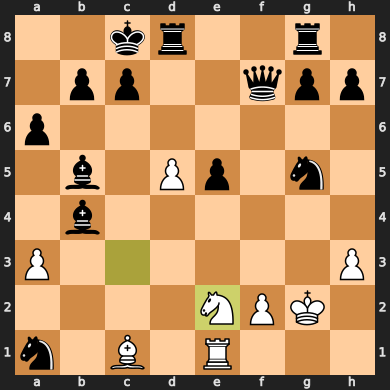

In [235]:
board.push_san(movestoplay[1])
board

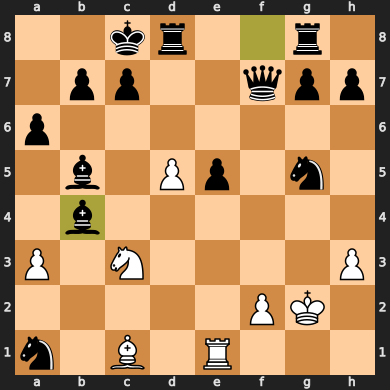

In [233]:
board.push_san('Bb4')
board